# Preparations

In [1]:
import os
os.chdir("..")
print("Current directory: {}".format(os.getcwd()))

Current directory: /Users/claudius/work-claudius/general/paper-projects/repos/trust-bust


In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
%matplotlib inline

plt.style.use('grayscale')
mpl.rcParams['lines.linewidth'] = 3
mpl.rcParams['lines.markeredgewidth'] = 2
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['figure.facecolor'] = 'white'

mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False

figure_directory = "output/figures/greyscale/"
figure_directory_color = "output/figures/color/"
# mpl.rcParams.keys()

In [3]:
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 505)

# Figures for the main paper

## Figure 5: baseline simulations

### Prepare the data

In [4]:
baseline_data = pd.read_feather("output/hawala_baseline/hawala_baseline_agg.feather")
baseline_data = baseline_data[baseline_data["t"]==750]
baseline_data.head()

,t,n_hawalas,n_places,int_pp,int_ph,p_gossip_rej,p_cheat_rej,lag_gossip,selec_perc,ranking_methods,selection_method,payoff_a,payoff_b,payoff_c,payoff_d,tshock,cshock,tshock_value,cshock_value,shock,trust_control,c_trust,d_trust,c_control_1,c_control_2,d_control_1,d_control_2,n_c_mean,n_c_sd,n_c_low,n_c_high,n_c_mid,n_d_mean,n_d_sd,n_d_low,n_d_high,n_d_mid,sh_d_mean,sh_d_sd,sh_d_low,sh_d_high,sh_d_mid,sh_c_mean,sh_c_sd,sh_c_low,sh_c_high,sh_c_mid,sh_c_top_mean,sh_c_top_sd,sh_c_top_low,sh_c_top_high,sh_c_top_mid,sh_c_low_mean,sh_c_low_sd,sh_c_low_low,sh_c_low_high,sh_c_low_mid,sh_d_top_mean,sh_d_top_sd,sh_d_top_low,sh_d_top_high,sh_d_top_mid,sh_d_low_mean,sh_d_low_sd,sh_d_low_low,sh_d_low_high,sh_d_low_mid,tr_fail_mean,tr_fail_sd,tr_fail_low,tr_fail_high,tr_fail_mid,tr_fail_sh_mean,tr_fail_sh_sd,tr_fail_sh_low,tr_fail_sh_high,tr_fail_sh_mid,tr_rejct_mean,tr_rejct_sd,tr_rejct_low,tr_rejct_high,tr_rejct_mid,tr_rlzd_mean,tr_rlzd_sd,tr_rlzd_low,tr_rlzd_high,tr_rlzd_mid,tr_rlzd_sh_mean,tr_rlzd_sh_sd,tr_rlzd_sh_low,tr_rlzd_sh_high,tr_rlzd_sh_mid,tr_coops_mean,tr_coops_sd,tr_coops_low,tr_coops_high,tr_coops_mid,tr_explts_mean,tr_explts_sd,tr_explts_low,tr_explts_high,tr_explts_mid,tr_defcts_mean,tr_defcts_sd,tr_defcts_low,tr_defcts_high,tr_defcts_mid,int_strgr_mean,int_strgr_sd,int_strgr_low,int_strgr_high,int_strgr_mid,int_prtnr_mean,int_prtnr_sd,int_prtnr_low,int_prtnr_high,int_prtnr_mid,int_coprts_mean,int_coprts_sd,int_coprts_low,int_coprts_high,int_coprts_mid,int_dfctrs_mean,int_dfctrs_sd,int_dfctrs_low,int_dfctrs_high,int_dfctrs_mid,pp_int_c_mean,pp_int_c_sd,pp_int_c_low,pp_int_c_high,pp_int_c_mid,pp_int_d_mean,pp_int_d_sd,pp_int_d_low,pp_int_d_high,pp_int_d_mid,eff_temp_mean,eff_temp_sd,eff_temp_low,eff_temp_high,eff_temp_mid,eff_ovrl_mean,eff_ovrl_sd,eff_ovrl_low,eff_ovrl_high,eff_ovrl_mid
750,750,100,25,100,10,1.0,1.0,-10,0.15,last_wealth_sum,replication_top_ten,4.0,8.0,0.0,-2.0,no,no,0,0,No shock,"Initial trust: 1.0, initial control: 1.0",0.0,1.0,0.0,0.0,1.0,1.0,80.0,44.72136,60.0,100.0,100,20.0,44.72136,0.0,40.0,0,0.2,0.447214,0.0,0.4,0.0,0.8,0.447214,0.6,1.0,1.0,0.8,0.447214,0.6,1.0,1.0,0.8,0.447214,0.6,1.0,1.0,0.2,0.447214,0.0,0.4,0.0,0.2,0.447214,0.0,0.4,0.0,100.0,0.000000,100.0,100.0,100.0,1.000,0.000000,1.000,1.000,1.00,80.0,178.885438,0.0,160.0,0,0.0,0.000000,0.0,0.0,0.0,0.000,0.000000,0.000,0.000,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000000,0.0,0.0,0,0.0,0.00000,0.0,0.0,0,0.000,0.000000,0.000,0.000,0.00,0.000,0.000000,0.000,0.00,0.00,0.000,0.000000,0.000,0.000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
1501,750,100,25,100,10,1.0,1.0,-10,0.15,last_wealth_sum,replication_top_ten,4.0,8.0,0.0,-2.0,no,no,0,0,No shock,"Initial trust: 1.0, initial control: 1.0",0.0,1.0,1.0,1.0,1.0,1.0,80.0,44.72136,60.0,100.0,100,20.0,44.72136,0.0,40.0,0,0.2,0.447214,0.0,0.4,0.0,0.8,0.447214,0.6,1.0,1.0,0.8,0.447214,0.6,1.0,1.0,0.8,0.447214,0.6,1.0,1.0,0.2,0.447214,0.0,0.4,0.0,0.2,0.447214,0.0,0.4,0.0,100.0,0.000000,100.0,100.0,100.0,1.000,0.000000,1.000,1.000,1.00,80.0,178.885438,0.0,160.0,0,0.0,0.000000,0.0,0.0,0.0,0.000,0.000000,0.000,0.000,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000000,0.0,0.0,0,0.0,0.00000,0.0,0.0,0,0.000,0.000000,0.000,0.000,0.00,0.000,0.000000,0.000,0.00,0.00,0.000,0.000000,0.000,0.000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
2252,750,100,25,100,10,1.0,1.0,-10,0.15,last_wealth_sum,replication_top_ten,4.0,8.0,0.0,-2.0,no,no,0,0,No shock,"Initial trust: 1.0, initial control: 1.0",1.0,1.0,1.0,1.0,1.0,1.0,100.0,0.00000,100.0,100.0,100,0.0,0.00000,0.0,0.0,0,0.0,0.000000,0.0,0.0,0.0,1.0,0.000000,1.0,1.0,1.0,1.0,0.000000,1.0,1.0,1.0,1.0,0.000000,1.0,1.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,4.4,4.505552,1.6,7.8,2.0,0.044,0.045056,0.016,0.078,0.02,17.0,17.972201,6.4,29.4,8,95.6,4.505552,92.2,98.4,98.0,0.956,0.045056,0.922,0.984,0.98,1.0,0.0,1.0,1.0,1.0,

In [5]:
realized_interactions  = [
    baseline_data[(baseline_data["c_trust"]==0.0) & (baseline_data["c_control_1"]==0.0)]["tr_rlzd_sh_mean"][750],
    baseline_data[(baseline_data["c_trust"]==0.0) & (baseline_data["c_control_1"]==1.0)]["tr_rlzd_sh_mean"][1501],
    baseline_data[(baseline_data["c_trust"]==1.0) & (baseline_data["c_control_1"]==0.0)]["tr_rlzd_sh_mean"][3003],
    baseline_data[(baseline_data["c_trust"]==1.0) & (baseline_data["c_control_1"]==1.0)]["tr_rlzd_sh_mean"][2252]
]
realized_interactions_low = [
    baseline_data[(baseline_data["c_trust"]==0.0) & (baseline_data["c_control_1"]==0.0)]["tr_rlzd_sh_low"][750],
    baseline_data[(baseline_data["c_trust"]==0.0) & (baseline_data["c_control_1"]==1.0)]["tr_rlzd_sh_low"][1501],
    baseline_data[(baseline_data["c_trust"]==1.0) & (baseline_data["c_control_1"]==0.0)]["tr_rlzd_sh_low"][3003],
    baseline_data[(baseline_data["c_trust"]==1.0) & (baseline_data["c_control_1"]==1.0)]["tr_rlzd_sh_low"][2252]
]
realized_interactions_high = [
    baseline_data[(baseline_data["c_trust"]==0.0) & (baseline_data["c_control_1"]==0.0)]["tr_rlzd_sh_high"][750],
    baseline_data[(baseline_data["c_trust"]==0.0) & (baseline_data["c_control_1"]==1.0)]["tr_rlzd_sh_high"][1501],
    baseline_data[(baseline_data["c_trust"]==1.0) & (baseline_data["c_control_1"]==0.0)]["tr_rlzd_sh_high"][3003],
    baseline_data[(baseline_data["c_trust"]==1.0) & (baseline_data["c_control_1"]==1.0)]["tr_rlzd_sh_high"][2252]
]

In [6]:
realized_interactions_lower = [realized_interactions[i]-realized_interactions_low[i] for i in range(len(realized_interactions))] 
realized_interactions_upper = [realized_interactions_high[i]-realized_interactions[i] for i in range(len(realized_interactions))] 

In [7]:
efficiencies = [
    baseline_data[(baseline_data["c_trust"]==0.0) & (baseline_data["c_control_1"]==0.0)]["eff_ovrl_mean"][750],
    baseline_data[(baseline_data["c_trust"]==0.0) & (baseline_data["c_control_1"]==1.0)]["eff_ovrl_mean"][1501],
    baseline_data[(baseline_data["c_trust"]==1.0) & (baseline_data["c_control_1"]==0.0)]["eff_ovrl_mean"][3003],
    baseline_data[(baseline_data["c_trust"]==1.0) & (baseline_data["c_control_1"]==1.0)]["eff_ovrl_mean"][2252]
]
efficiencies_low = [
    baseline_data[(baseline_data["c_trust"]==0.0) & (baseline_data["c_control_1"]==0.0)]["eff_ovrl_low"][750],
    baseline_data[(baseline_data["c_trust"]==0.0) & (baseline_data["c_control_1"]==1.0)]["eff_ovrl_low"][1501],
    baseline_data[(baseline_data["c_trust"]==1.0) & (baseline_data["c_control_1"]==0.0)]["eff_ovrl_low"][3003],
    baseline_data[(baseline_data["c_trust"]==1.0) & (baseline_data["c_control_1"]==1.0)]["eff_ovrl_low"][2252]
]
efficiencies_high = [
    baseline_data[(baseline_data["c_trust"]==0.0) & (baseline_data["c_control_1"]==0.0)]["eff_ovrl_high"][750],
    baseline_data[(baseline_data["c_trust"]==0.0) & (baseline_data["c_control_1"]==1.0)]["eff_ovrl_high"][1501],
    baseline_data[(baseline_data["c_trust"]==1.0) & (baseline_data["c_control_1"]==0.0)]["eff_ovrl_high"][3003],
    baseline_data[(baseline_data["c_trust"]==1.0) & (baseline_data["c_control_1"]==1.0)]["eff_ovrl_high"][2252]
]

In [8]:
efficiencies_lower = [efficiencies[i]-efficiencies_low[i] for i in range(len(efficiencies))] 
efficiencies_upper = [efficiencies_high[i]-efficiencies[i] for i in range(len(efficiencies))] 

In [9]:
type_interactions = [
    baseline_data[(baseline_data["c_trust"]==0.0) & (baseline_data["c_control_1"]==0.0)]["tr_coops_mean"][750],
    baseline_data[(baseline_data["c_trust"]==0.0) & (baseline_data["c_control_1"]==1.0)]["tr_coops_mean"][1501],
    baseline_data[(baseline_data["c_trust"]==1.0) & (baseline_data["c_control_1"]==0.0)]["tr_coops_mean"][3003],
    baseline_data[(baseline_data["c_trust"]==1.0) & (baseline_data["c_control_1"]==1.0)]["tr_coops_mean"][2252]
]
type_interactions_low = [
    baseline_data[(baseline_data["c_trust"]==0.0) & (baseline_data["c_control_1"]==0.0)]["tr_coops_low"][750],
    baseline_data[(baseline_data["c_trust"]==0.0) & (baseline_data["c_control_1"]==1.0)]["tr_coops_low"][1501],
    baseline_data[(baseline_data["c_trust"]==1.0) & (baseline_data["c_control_1"]==0.0)]["tr_coops_low"][3003],
    baseline_data[(baseline_data["c_trust"]==1.0) & (baseline_data["c_control_1"]==1.0)]["tr_coops_low"][2252]
]
type_interactions_high = [
    baseline_data[(baseline_data["c_trust"]==0.0) & (baseline_data["c_control_1"]==0.0)]["tr_coops_high"][750],
    baseline_data[(baseline_data["c_trust"]==0.0) & (baseline_data["c_control_1"]==1.0)]["tr_coops_high"][1501],
    baseline_data[(baseline_data["c_trust"]==1.0) & (baseline_data["c_control_1"]==0.0)]["tr_coops_high"][3003],
    baseline_data[(baseline_data["c_trust"]==1.0) & (baseline_data["c_control_1"]==1.0)]["tr_coops_high"][2252]
]

In [10]:
type_interactions_lower = [type_interactions[i]-type_interactions_low[i] for i in range(len(type_interactions))] 
type_interactions_upper = [type_interactions_high[i]-type_interactions[i] for i in range(len(type_interactions))] 

In [11]:
shares_coop = [
    baseline_data[(baseline_data["c_trust"]==0.0) & (baseline_data["c_control_1"]==0.0)]["sh_c_mean"][750],
    baseline_data[(baseline_data["c_trust"]==0.0) & (baseline_data["c_control_1"]==1.0)]["sh_c_mean"][1501],
    baseline_data[(baseline_data["c_trust"]==1.0) & (baseline_data["c_control_1"]==0.0)]["sh_c_mean"][3003],
    baseline_data[(baseline_data["c_trust"]==1.0) & (baseline_data["c_control_1"]==1.0)]["sh_c_mean"][2252]
]
shares_coop_low = [
    baseline_data[(baseline_data["c_trust"]==0.0) & (baseline_data["c_control_1"]==0.0)]["sh_c_low"][750],
    baseline_data[(baseline_data["c_trust"]==0.0) & (baseline_data["c_control_1"]==1.0)]["sh_c_low"][1501],
    baseline_data[(baseline_data["c_trust"]==1.0) & (baseline_data["c_control_1"]==0.0)]["sh_c_low"][3003],
    baseline_data[(baseline_data["c_trust"]==1.0) & (baseline_data["c_control_1"]==1.0)]["sh_c_low"][2252]
]
shares_coop_high = [
    baseline_data[(baseline_data["c_trust"]==0.0) & (baseline_data["c_control_1"]==0.0)]["sh_c_high"][750],
    baseline_data[(baseline_data["c_trust"]==0.0) & (baseline_data["c_control_1"]==1.0)]["sh_c_high"][1501],
    baseline_data[(baseline_data["c_trust"]==1.0) & (baseline_data["c_control_1"]==0.0)]["sh_c_high"][3003],
    baseline_data[(baseline_data["c_trust"]==1.0) & (baseline_data["c_control_1"]==1.0)]["sh_c_high"][2252]
]

In [12]:
shares_coop_lower = [shares_coop[i]-shares_coop_low[i] for i in range(len(shares_coop))] 
shares_coop_upper = [shares_coop_high[i]-shares_coop[i] for i in range(len(shares_coop))] 

### Plot the histogram

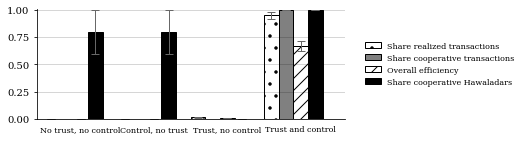

In [13]:
fig_width = 6.688 
fig_height = fig_width / (1.618*2)
width = 0.2
indices = ["No trust, no control", "Control, no trust", "Trust, no control", "Trust and control"]
index = np.arange(len(indices))

fig, ax = plt.subplots(figsize=(fig_width, fig_height))

ax.bar(index-1*width, realized_interactions, width, 
       label="Share realized transactions", 
       alpha=1.0, color="white", hatch=".", edgecolor="black",
       yerr=[realized_interactions_lower, realized_interactions_upper],
       ecolor='#686868', error_kw=dict(lw=1, capsize=4, capthick=1))

ax.bar(index+0*width, type_interactions, width, 
       label="Share cooperative transactions", 
       alpha=1.0, color="gray", edgecolor="black",
       yerr=[type_interactions_lower, type_interactions_upper],
       ecolor='#686868', error_kw=dict(lw=1, capsize=4, capthick=1))

ax.bar(index+1*width, efficiencies, width, 
       label="Overall efficiency", 
       alpha=1.0, color="white", hatch="//", edgecolor="black",
       yerr=[efficiencies_lower, efficiencies_upper],
       ecolor='#686868', error_kw=dict(lw=1, capsize=4, capthick=1))

ax.bar(index+2*width, shares_coop, width, 
       label="Share cooperative Hawaladars", 
       alpha=1.0, color="black", edgecolor="black",
       yerr=[shares_coop_lower, shares_coop_upper], 
       ecolor='#686868', error_kw=dict(lw=1, capsize=4, capthick=1))

ax.set_xlim(-0.4, 3.8)
ax.set_xticks(index + width)
ax.set_xticklabels(indices, fontsize=8)
ax.xaxis.set_ticks_position('none') 

ax.set_ylim(-0.00, 1.01)
ax.get_yaxis().tick_left()  
ax.legend(loc="right", ncol=1, frameon=False, fontsize=8,
         bbox_to_anchor=(1.575, 0.5))

plt.tight_layout()
plt.subplots_adjust(top=0.92)
ax.yaxis.grid(True, alpha=0.2)
plt.tight_layout()

path = figure_directory + "fig_05_trust-vs-control-baseline.pdf"
plt.savefig(path, bbox_inches='tight')

### Color version

In [14]:
viridis = cm.get_cmap('viridis', 4)

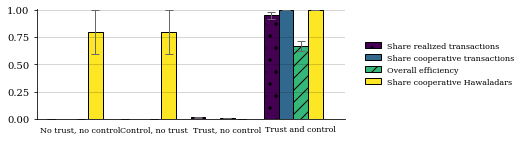

In [15]:
fig_width = 6.688 
fig_height = fig_width / (1.618*2)
width = 0.2
indices = ["No trust, no control", "Control, no trust", "Trust, no control", "Trust and control"]
index = np.arange(len(indices))

fig, ax = plt.subplots(figsize=(fig_width, fig_height))

ax.bar(index-1*width, realized_interactions, width, 
       label="Share realized transactions", 
       alpha=1.0, color=viridis.colors[0], hatch=".", edgecolor="black",
       yerr=[realized_interactions_lower, realized_interactions_upper],
       ecolor='#686868', error_kw=dict(lw=1, capsize=4, capthick=1))

ax.bar(index+0*width, type_interactions, width, 
       label="Share cooperative transactions", 
       alpha=1.0, color=viridis.colors[1], edgecolor="black",
       yerr=[type_interactions_lower, type_interactions_upper],
       ecolor='#686868', error_kw=dict(lw=1, capsize=4, capthick=1))

ax.bar(index+1*width, efficiencies, width, 
       label="Overall efficiency", 
       alpha=1.0, color=viridis.colors[2], hatch="//", edgecolor="black",
       yerr=[efficiencies_lower, efficiencies_upper],
       ecolor='#686868', error_kw=dict(lw=1, capsize=4, capthick=1))

ax.bar(index+2*width, shares_coop, width, 
       label="Share cooperative Hawaladars", 
       alpha=1.0, color=viridis.colors[3], edgecolor="black",
       yerr=[shares_coop_lower, shares_coop_upper], 
       ecolor='#686868', error_kw=dict(lw=1, capsize=4, capthick=1))

ax.set_xlim(-0.4, 3.8)
ax.set_xticks(index + width)
ax.set_xticklabels(indices, fontsize=8)
ax.xaxis.set_ticks_position('none') 

ax.set_ylim(-0.00, 1.01)
ax.get_yaxis().tick_left()  
ax.legend(loc="right", ncol=1, frameon=False, fontsize=8,
         bbox_to_anchor=(1.575, 0.5))

plt.tight_layout()
plt.subplots_adjust(top=0.92)
ax.yaxis.grid(True, alpha=0.2)
plt.tight_layout()

path = figure_directory_color + "fig_05_trust-vs-control-baseline.pdf"
plt.savefig(path, bbox_inches='tight')

## Figure 6: Trust and control shocks

### Prepare the data

In [16]:
shock_data = pd.read_feather("output/hawala_shocks_/hawala_shocks__agg.feather")

In [17]:
max_t = max(shock_data["t"])
shock_data = shock_data[shock_data["t"]==max_t]

In [18]:
no_shock_data = dict()
no_shock_data["cooperators"] = [shock_data[shock_data["shock"]=="No shock"]["sh_c_mean"][1001]]
no_shock_data["cooperators_low"] = [shock_data[shock_data["shock"]=="No shock"]["sh_c_low"][1001]]
no_shock_data["cooperators_high"] = [shock_data[shock_data["shock"]=="No shock"]["sh_c_high"][1001]]
no_shock_data["cooperators_upper"] = [np.array(no_shock_data["cooperators_high"]) - np.array(no_shock_data["cooperators"])]
no_shock_data["cooperators_lower"] = [np.array(no_shock_data["cooperators"]) - np.array(no_shock_data["cooperators_low"])]


no_shock_data["cooperations"] = [shock_data[shock_data["shock"]=="No shock"]["tr_coops_mean"][1001]]
no_shock_data["cooperations_low"] = [shock_data[shock_data["shock"]=="No shock"]["tr_coops_low"][1001]]
no_shock_data["cooperations_high"] = [shock_data[shock_data["shock"]=="No shock"]["tr_coops_high"][1001]]
no_shock_data["cooperations_upper"] = [np.array(no_shock_data["cooperations_high"]) - np.array(no_shock_data["cooperations"])]
no_shock_data["cooperations_lower"] = [np.array(no_shock_data["cooperations"]) - np.array(no_shock_data["cooperations_low"])]


no_shock_data["realized"] = [shock_data[shock_data["shock"]=="No shock"]["tr_rlzd_sh_mean"][1001]]
no_shock_data["realized_low"] = [shock_data[shock_data["shock"]=="No shock"]["tr_rlzd_sh_low"][1001]]
no_shock_data["realized_high"] = [shock_data[shock_data["shock"]=="No shock"]["tr_rlzd_sh_high"][1001]]
no_shock_data["realized_upper"] = [np.array(no_shock_data["realized_high"]) - np.array(no_shock_data["realized"])]
no_shock_data["realized_lower"] = [np.array(no_shock_data["realized"]) - np.array(no_shock_data["realized_low"])]


no_shock_data["efficiency"] = [shock_data[shock_data["shock"]=="No shock"]["eff_ovrl_mean"][1001]]
no_shock_data["efficiency_low"] = [shock_data[shock_data["shock"]=="No shock"]["eff_ovrl_low"][1001]]
no_shock_data["efficiency_high"] = [shock_data[shock_data["shock"]=="No shock"]["eff_ovrl_high"][1001]]
no_shock_data["efficiency_upper"] = [np.array(no_shock_data["efficiency_high"]) - np.array(no_shock_data["efficiency"])]
no_shock_data["efficiency_lower"] = [np.array(no_shock_data["efficiency"]) - np.array(no_shock_data["efficiency_low"])]

In [19]:
t0_t = shock_data[shock_data["shock"]=="Trust: in t=0 to 0.0 Control: in t=no to 0.0"]
t0_c = shock_data[shock_data["shock"]=="Trust: in t=no to 0.0 Control: in t=0 to 0.0"]
t0_ct = shock_data[shock_data["shock"]=="Trust: in t=0 to 0.0 Control: in t=0 to 0.0"]

t1_t = shock_data[shock_data["shock"]=="Trust: in t=1 to 0.0 Control: in t=no to 0.0"]
t1_c = shock_data[shock_data["shock"]=="Trust: in t=no to 0.0 Control: in t=1 to 0.0"]
t1_ct = shock_data[shock_data["shock"]=="Trust: in t=1 to 0.0 Control: in t=1 to 0.0"]

t5_t = shock_data[shock_data["shock"]=="Trust: in t=5 to 0.0 Control: in t=no to 0.0"]
t5_c = shock_data[shock_data["shock"]=="Trust: in t=no to 0.0 Control: in t=5 to 0.0"]
t5_ct = shock_data[shock_data["shock"]=="Trust: in t=5 to 0.0 Control: in t=5 to 0.0"]

t25_t = shock_data[shock_data["shock"]=="Trust: in t=25 to 0.0 Control: in t=no to 0.0"]
t25_c = shock_data[shock_data["shock"]=="Trust: in t=no to 0.0 Control: in t=25 to 0.0"]
t25_ct = shock_data[shock_data["shock"]=="Trust: in t=25 to 0.0 Control: in t=25 to 0.0"]

t50_t = shock_data[shock_data["shock"]=="Trust: in t=50 to 0.0 Control: in t=no to 0.0"]
t50_c = shock_data[shock_data["shock"]=="Trust: in t=no to 0.0 Control: in t=50 to 0.0"]
t50_ct = shock_data[shock_data["shock"]=="Trust: in t=50 to 0.0 Control: in t=50 to 0.0"]

t300_t = shock_data[shock_data["shock"]=="Trust: in t=300 to 0.0 Control: in t=no to 0.0"]
t300_c = shock_data[shock_data["shock"]=="Trust: in t=no to 0.0 Control: in t=300 to 0.0"]
t300_ct = shock_data[shock_data["shock"]=="Trust: in t=300 to 0.0 Control: in t=300 to 0.0"]

In [20]:
t0_data = dict()
t0_data["cooperators"] = [float(t0_t["sh_c_mean"]), float(t0_c["sh_c_mean"]), float(t0_ct["sh_c_mean"])]
t0_data["cooperators_low"] = [float(t0_t["sh_c_low"]), float(t0_c["sh_c_low"]), float(t0_ct["sh_c_low"])]
t0_data["cooperators_high"] = [float(t0_t["sh_c_high"]), float(t0_c["sh_c_high"]), float(t0_ct["sh_c_high"])]
t0_data["cooperators_upper"] = list(np.array(t0_data["cooperators_high"]) - np.array(t0_data["cooperators"]))
t0_data["cooperators_lower"] = list(np.array(t0_data["cooperators"]) - np.array(t0_data["cooperators_low"]))

t0_data["cooperations"] = [float(t0_t["tr_coops_mean"]), float(t0_c["tr_coops_mean"]), float(t0_ct["tr_coops_mean"])]
t0_data["cooperations_low"] = [float(t0_t["tr_coops_low"]), float(t0_c["tr_coops_low"]), float(t0_ct["tr_coops_low"])]
t0_data["cooperations_high"] = [float(t0_t["tr_coops_high"]), float(t0_c["tr_coops_high"]), float(t0_ct["tr_coops_high"])]
t0_data["cooperations_upper"] = list(np.array(t0_data["cooperations_high"]) - np.array(t0_data["cooperations"]))
t0_data["cooperations_lower"] = list(np.array(t0_data["cooperations"]) - np.array(t0_data["cooperations_low"]))

t0_data["realized"] = [float(t0_t["tr_rlzd_sh_mean"]), float(t0_c["tr_rlzd_sh_mean"]), float(t0_ct["tr_rlzd_sh_mean"])]
t0_data["realized_low"] = [float(t0_t["tr_rlzd_sh_low"]), float(t0_c["tr_rlzd_sh_low"]), float(t0_ct["tr_rlzd_sh_low"])]
t0_data["realized_high"] = [float(t0_t["tr_rlzd_sh_high"]), float(t0_c["tr_rlzd_sh_high"]), float(t0_ct["tr_rlzd_sh_high"])]
t0_data["realized_upper"] = list(np.array(t0_data["realized_high"]) - np.array(t0_data["realized"]))
t0_data["realized_lower"] = list(np.array(t0_data["realized"]) - np.array(t0_data["realized_low"]))

t0_data["efficiency"] = [float(t0_t["eff_ovrl_mean"]), float(t0_c["eff_ovrl_mean"]), float(t0_ct["eff_ovrl_mean"])]
t0_data["efficiency_low"] = [float(t0_t["eff_ovrl_low"]), float(t0_c["eff_ovrl_low"]), float(t0_ct["eff_ovrl_low"])]
t0_data["efficiency_high"] = [float(t0_t["eff_ovrl_high"]), float(t0_c["eff_ovrl_high"]), float(t0_ct["eff_ovrl_high"])]
t0_data["efficiency_upper"] = list(np.array(t0_data["efficiency_high"]) - np.array(t0_data["efficiency"]))
t0_data["efficiency_lower"] = list(np.array(t0_data["efficiency"]) - np.array(t0_data["efficiency_low"]))


In [21]:
t1_data = dict()
t1_data["cooperators"] = [float(t1_t["sh_c_mean"]), float(t1_c["sh_c_mean"]), float(t1_ct["sh_c_mean"])]
t1_data["cooperators_low"] = [float(t1_t["sh_c_low"]), float(t1_c["sh_c_low"]), float(t1_ct["sh_c_low"])]
t1_data["cooperators_high"] = [float(t1_t["sh_c_high"]), float(t1_c["sh_c_high"]), float(t1_ct["sh_c_high"])]
t1_data["cooperators_upper"] = list(np.array(t1_data["cooperators_high"]) - np.array(t1_data["cooperators"]))
t1_data["cooperators_lower"] = list(np.array(t1_data["cooperators"]) - np.array(t1_data["cooperators_low"]))

t1_data["cooperations"] = [float(t1_t["tr_coops_mean"]), float(t1_c["tr_coops_mean"]), float(t1_ct["tr_coops_mean"])]
t1_data["cooperations_low"] = [float(t1_t["tr_coops_low"]), float(t1_c["tr_coops_low"]), float(t1_ct["tr_coops_low"])]
t1_data["cooperations_high"] = [float(t1_t["tr_coops_high"]), float(t1_c["tr_coops_high"]), float(t1_ct["tr_coops_high"])]
t1_data["cooperations_upper"] = list(np.array(t1_data["cooperations_high"]) - np.array(t1_data["cooperations"]))
t1_data["cooperations_lower"] = list(np.array(t1_data["cooperations"]) - np.array(t1_data["cooperations_low"]))

t1_data["realized"] = [float(t1_t["tr_rlzd_sh_mean"]), float(t1_c["tr_rlzd_sh_mean"]), float(t1_ct["tr_rlzd_sh_mean"])]
t1_data["realized_low"] = [float(t1_t["tr_rlzd_sh_low"]), float(t1_c["tr_rlzd_sh_low"]), float(t1_ct["tr_rlzd_sh_low"])]
t1_data["realized_high"] = [float(t1_t["tr_rlzd_sh_high"]), float(t1_c["tr_rlzd_sh_high"]), float(t1_ct["tr_rlzd_sh_high"])]
t1_data["realized_upper"] = list(np.array(t1_data["realized_high"]) - np.array(t1_data["realized"]))
t1_data["realized_lower"] = list(np.array(t1_data["realized"]) - np.array(t1_data["realized_low"]))

t1_data["efficiency"] = [float(t1_t["eff_ovrl_mean"]), float(t1_c["eff_ovrl_mean"]), float(t1_ct["eff_ovrl_mean"])]
t1_data["efficiency_low"] = [float(t1_t["eff_ovrl_low"]), float(t1_c["eff_ovrl_low"]), float(t1_ct["eff_ovrl_low"])]
t1_data["efficiency_high"] = [float(t1_t["eff_ovrl_high"]), float(t1_c["eff_ovrl_high"]), float(t1_ct["eff_ovrl_high"])]
t1_data["efficiency_upper"] = list(np.array(t1_data["efficiency_high"]) - np.array(t1_data["efficiency"]))
t1_data["efficiency_lower"] = list(np.array(t1_data["efficiency"]) - np.array(t1_data["efficiency_low"]))

In [22]:
t5_data = dict()
t5_data["cooperators"] = [float(t5_t["sh_c_mean"]), float(t5_c["sh_c_mean"]), float(t5_ct["sh_c_mean"])]
t5_data["cooperators_low"] = [float(t5_t["sh_c_low"]), float(t5_c["sh_c_low"]), float(t5_ct["sh_c_low"])]
t5_data["cooperators_high"] = [float(t5_t["sh_c_high"]), float(t5_c["sh_c_high"]), float(t5_ct["sh_c_high"])]
t5_data["cooperators_upper"] = list(np.array(t5_data["cooperators_high"]) - np.array(t5_data["cooperators"]))
t5_data["cooperators_lower"] = list(np.array(t5_data["cooperators"]) - np.array(t5_data["cooperators_low"]))

t5_data["cooperations"] = [float(t5_t["tr_coops_mean"]), float(t5_c["tr_coops_mean"]), float(t5_ct["tr_coops_mean"])]
t5_data["cooperations_low"] = [float(t5_t["tr_coops_low"]), float(t5_c["tr_coops_low"]), float(t5_ct["tr_coops_low"])]
t5_data["cooperations_high"] = [float(t5_t["tr_coops_high"]), float(t5_c["tr_coops_high"]), float(t5_ct["tr_coops_high"])]
t5_data["cooperations_upper"] = list(np.array(t5_data["cooperations_high"]) - np.array(t5_data["cooperations"]))
t5_data["cooperations_lower"] = list(np.array(t5_data["cooperations"]) - np.array(t5_data["cooperations_low"]))

t5_data["realized"] = [float(t5_t["tr_rlzd_sh_mean"]), float(t5_c["tr_rlzd_sh_mean"]), float(t5_ct["tr_rlzd_sh_mean"])]
t5_data["realized_low"] = [float(t5_t["tr_rlzd_sh_low"]), float(t5_c["tr_rlzd_sh_low"]), float(t5_ct["tr_rlzd_sh_low"])]
t5_data["realized_high"] = [float(t5_t["tr_rlzd_sh_high"]), float(t5_c["tr_rlzd_sh_high"]), float(t5_ct["tr_rlzd_sh_high"])]
t5_data["realized_upper"] = list(np.array(t5_data["realized_high"]) - np.array(t5_data["realized"]))
t5_data["realized_lower"] = list(np.array(t5_data["realized"]) - np.array(t5_data["realized_low"]))

t5_data["efficiency"] = [float(t5_t["eff_ovrl_mean"]), float(t5_c["eff_ovrl_mean"]), float(t5_ct["eff_ovrl_mean"])]
t5_data["efficiency_low"] = [float(t5_t["eff_ovrl_low"]), float(t5_c["eff_ovrl_low"]), float(t5_ct["eff_ovrl_low"])]
t5_data["efficiency_high"] = [float(t5_t["eff_ovrl_high"]), float(t5_c["eff_ovrl_high"]), float(t5_ct["eff_ovrl_high"])]
t5_data["efficiency_upper"] = list(np.array(t5_data["efficiency_high"]) - np.array(t5_data["efficiency"]))
t5_data["efficiency_lower"] = list(np.array(t5_data["efficiency"]) - np.array(t5_data["efficiency_low"]))

In [23]:
t25_data = dict()
t25_data["cooperators"] = [float(t25_t["sh_c_mean"]), float(t25_c["sh_c_mean"]), float(t25_ct["sh_c_mean"])]
t25_data["cooperators_low"] = [float(t25_t["sh_c_low"]), float(t25_c["sh_c_low"]), float(t25_ct["sh_c_low"])]
t25_data["cooperators_high"] = [float(t25_t["sh_c_high"]), float(t25_c["sh_c_high"]), float(t25_ct["sh_c_high"])]
t25_data["cooperators_upper"] = list(np.array(t25_data["cooperators_high"]) - np.array(t25_data["cooperators"]))
t25_data["cooperators_lower"] = list(np.array(t25_data["cooperators"]) - np.array(t25_data["cooperators_low"]))

t25_data["cooperations"] = [float(t25_t["tr_coops_mean"]), float(t25_c["tr_coops_mean"]), float(t25_ct["tr_coops_mean"])]
t25_data["cooperations_low"] = [float(t25_t["tr_coops_low"]), float(t25_c["tr_coops_low"]), float(t25_ct["tr_coops_low"])]
t25_data["cooperations_high"] = [float(t25_t["tr_coops_high"]), float(t25_c["tr_coops_high"]), float(t25_ct["tr_coops_high"])]
t25_data["cooperations_upper"] = list(np.array(t25_data["cooperations_high"]) - np.array(t25_data["cooperations"]))
t25_data["cooperations_lower"] = list(np.array(t25_data["cooperations"]) - np.array(t25_data["cooperations_low"]))

t25_data["realized"] = [float(t25_t["tr_rlzd_sh_mean"]), float(t25_c["tr_rlzd_sh_mean"]), float(t25_ct["tr_rlzd_sh_mean"])]
t25_data["realized_low"] = [float(t25_t["tr_rlzd_sh_low"]), float(t25_c["tr_rlzd_sh_low"]), float(t25_ct["tr_rlzd_sh_low"])]
t25_data["realized_high"] = [float(t25_t["tr_rlzd_sh_high"]), float(t25_c["tr_rlzd_sh_high"]), float(t25_ct["tr_rlzd_sh_high"])]
t25_data["realized_upper"] = list(np.array(t25_data["realized_high"]) - np.array(t25_data["realized"]))
t25_data["realized_lower"] = list(np.array(t25_data["realized"]) - np.array(t25_data["realized_low"]))

t25_data["efficiency"] = [float(t25_t["eff_ovrl_mean"]), float(t25_c["eff_ovrl_mean"]), float(t25_ct["eff_ovrl_mean"])]
t25_data["efficiency_low"] = [float(t25_t["eff_ovrl_low"]), float(t25_c["eff_ovrl_low"]), float(t25_ct["eff_ovrl_low"])]
t25_data["efficiency_high"] = [float(t25_t["eff_ovrl_high"]), float(t25_c["eff_ovrl_high"]), float(t25_ct["eff_ovrl_high"])]
t25_data["efficiency_upper"] = list(np.array(t25_data["efficiency_high"]) - np.array(t25_data["efficiency"]))
t25_data["efficiency_lower"] = list(np.array(t25_data["efficiency"]) - np.array(t25_data["efficiency_low"]))

In [24]:
t50_data = dict()
t50_data["cooperators"] = [float(t50_t["sh_c_mean"]), float(t50_c["sh_c_mean"]), float(t50_ct["sh_c_mean"])]
t50_data["cooperators_low"] = [float(t50_t["sh_c_low"]), float(t50_c["sh_c_low"]), float(t50_ct["sh_c_low"])]
t50_data["cooperators_high"] = [float(t50_t["sh_c_high"]), float(t50_c["sh_c_high"]), float(t50_ct["sh_c_high"])]
t50_data["cooperators_upper"] = list(np.array(t50_data["cooperators_high"]) - np.array(t50_data["cooperators"]))
t50_data["cooperators_lower"] = list(np.array(t50_data["cooperators"]) - np.array(t50_data["cooperators_low"]))

t50_data["cooperations"] = [float(t50_t["tr_coops_mean"]), float(t50_c["tr_coops_mean"]), float(t50_ct["tr_coops_mean"])]
t50_data["cooperations_low"] = [float(t50_t["tr_coops_low"]), float(t50_c["tr_coops_low"]), float(t50_ct["tr_coops_low"])]
t50_data["cooperations_high"] = [float(t50_t["tr_coops_high"]), float(t50_c["tr_coops_high"]), float(t50_ct["tr_coops_high"])]
t50_data["cooperations_upper"] = list(np.array(t50_data["cooperations_high"]) - np.array(t50_data["cooperations"]))
t50_data["cooperations_lower"] = list(np.array(t50_data["cooperations"]) - np.array(t50_data["cooperations_low"]))

t50_data["realized"] = [float(t50_t["tr_rlzd_sh_mean"]), float(t50_c["tr_rlzd_sh_mean"]), float(t50_ct["tr_rlzd_sh_mean"])]
t50_data["realized_low"] = [float(t50_t["tr_rlzd_sh_low"]), float(t50_c["tr_rlzd_sh_low"]), float(t50_ct["tr_rlzd_sh_low"])]
t50_data["realized_high"] = [float(t50_t["tr_rlzd_sh_high"]), float(t50_c["tr_rlzd_sh_high"]), float(t50_ct["tr_rlzd_sh_high"])]
t50_data["realized_upper"] = list(np.array(t50_data["realized_high"]) - np.array(t50_data["realized"]))
t50_data["realized_lower"] = list(np.array(t50_data["realized"]) - np.array(t50_data["realized_low"]))

t50_data["efficiency"] = [float(t50_t["eff_ovrl_mean"]), float(t50_c["eff_ovrl_mean"]), float(t50_ct["eff_ovrl_mean"])]
t50_data["efficiency_low"] = [float(t50_t["eff_ovrl_low"]), float(t50_c["eff_ovrl_low"]), float(t50_ct["eff_ovrl_low"])]
t50_data["efficiency_high"] = [float(t50_t["eff_ovrl_high"]), float(t50_c["eff_ovrl_high"]), float(t50_ct["eff_ovrl_high"])]
t50_data["efficiency_upper"] = list(np.array(t50_data["efficiency_high"]) - np.array(t50_data["efficiency"]))
t50_data["efficiency_lower"] = list(np.array(t50_data["efficiency"]) - np.array(t50_data["efficiency_low"]))

In [25]:
t300_data = dict()
t300_data["cooperators"] = [float(t300_t["sh_c_mean"]), float(t300_c["sh_c_mean"]), float(t300_ct["sh_c_mean"])]
t300_data["cooperators_low"] = [float(t300_t["sh_c_low"]), float(t300_c["sh_c_low"]), float(t300_ct["sh_c_low"])]
t300_data["cooperators_high"] = [float(t300_t["sh_c_high"]), float(t300_c["sh_c_high"]), float(t300_ct["sh_c_high"])]
t300_data["cooperators_upper"] = list(np.array(t300_data["cooperators_high"]) - np.array(t300_data["cooperators"]))
t300_data["cooperators_lower"] = list(np.array(t300_data["cooperators"]) - np.array(t300_data["cooperators_low"]))

t300_data["cooperations"] = [float(t300_t["tr_coops_mean"]), float(t300_c["tr_coops_mean"]), float(t300_ct["tr_coops_mean"])]
t300_data["cooperations_low"] = [float(t300_t["tr_coops_low"]), float(t300_c["tr_coops_low"]), float(t300_ct["tr_coops_low"])]
t300_data["cooperations_high"] = [float(t300_t["tr_coops_high"]), float(t300_c["tr_coops_high"]), float(t300_ct["tr_coops_high"])]
t300_data["cooperations_upper"] = list(np.array(t300_data["cooperations_high"]) - np.array(t300_data["cooperations"]))
t300_data["cooperations_lower"] = list(np.array(t300_data["cooperations"]) - np.array(t300_data["cooperations_low"]))

t300_data["realized"] = [float(t300_t["tr_rlzd_sh_mean"]), float(t300_c["tr_rlzd_sh_mean"]), float(t300_ct["tr_rlzd_sh_mean"])]
t300_data["realized_low"] = [float(t300_t["tr_rlzd_sh_low"]), float(t300_c["tr_rlzd_sh_low"]), float(t300_ct["tr_rlzd_sh_low"])]
t300_data["realized_high"] = [float(t300_t["tr_rlzd_sh_high"]), float(t300_c["tr_rlzd_sh_high"]), float(t300_ct["tr_rlzd_sh_high"])]
t300_data["realized_upper"] = list(np.array(t300_data["realized_high"]) - np.array(t300_data["realized"]))
t300_data["realized_lower"] = list(np.array(t300_data["realized"]) - np.array(t300_data["realized_low"]))

t300_data["efficiency"] = [float(t300_t["eff_ovrl_mean"]), float(t300_c["eff_ovrl_mean"]), float(t300_ct["eff_ovrl_mean"])]
t300_data["efficiency_low"] = [float(t300_t["eff_ovrl_low"]), float(t300_c["eff_ovrl_low"]), float(t300_ct["eff_ovrl_low"])]
t300_data["efficiency_high"] = [float(t300_t["eff_ovrl_high"]), float(t300_c["eff_ovrl_high"]), float(t300_ct["eff_ovrl_high"])]
t300_data["efficiency_upper"] = list(np.array(t300_data["efficiency_high"]) - np.array(t300_data["efficiency"]))
t300_data["efficiency_lower"] = list(np.array(t300_data["efficiency"]) - np.array(t300_data["efficiency_low"]))

In [26]:
for k in no_shock_data.keys():
    no_shock_data[k].extend((0.0, 0.0, 0.0))
for k in t0_data.keys():
    t0_data[k].insert(0, 0.0)
for k in t1_data.keys():
    t1_data[k].insert(0, 0.0)
for k in t5_data.keys():
    t5_data[k].insert(0, 0.0)
for k in t25_data.keys():
    t25_data[k].insert(0, 0.0)
for k in t50_data.keys():
    t50_data[k].insert(0, 0.0)
for k in t300_data.keys():
    t300_data[k].insert(0, 0.0)

### Make the histograms

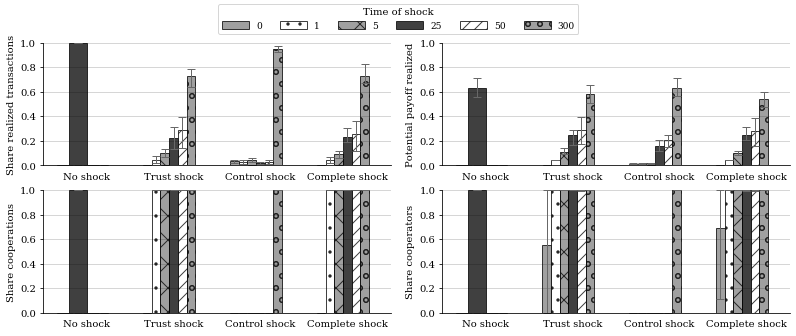

In [27]:
indices = ["No shock", "Trust shock", "Control shock", "Complete shock"]# 
index = np.arange(len(indices))
width = 0.1

fig_width = 1.68 * 6.688 
fig_height = 4.688 

fig, axes = plt.subplots(2,2, figsize=(fig_width, fig_height), facecolor="white")

#axes[0,0].set_title("Resulting share of realized transactions", fontsize=12)
axes[0,0].set_ylabel("Share realized transactions")

axes[0,0].bar(index+0*width, t0_data["realized"], width, 
              color="grey", label="0", alpha=0.75, 
              yerr=[t0_data["realized_lower"], t0_data["realized_upper"]], 
              edgecolor="black", ecolor='#686868', error_kw=dict(lw=1, capsize=4, capthick=1))
axes[0,0].bar(index+1*width, t1_data["realized"], width,               
              color="white", hatch=".", label="1", alpha=0.75, 
              yerr=[t1_data["realized_lower"], t1_data["realized_upper"]], 
              edgecolor="black", ecolor='#686868', error_kw=dict(lw=1, capsize=4, capthick=1))
axes[0,0].bar(index+2*width, t5_data["realized"], width, 
              color="grey", hatch="x", label="5", alpha=0.75, 
              yerr=[t5_data["realized_lower"], t5_data["realized_upper"]], 
              edgecolor="black", ecolor='#686868', error_kw=dict(lw=1, capsize=4, capthick=1))
axes[0,0].bar(index+3*width, t25_data["realized"], width, 
              color="black", hatch=None, label="25", alpha=0.75, 
              yerr=[t25_data["realized_lower"], t25_data["realized_upper"]], 
              edgecolor="black", ecolor='#686868', error_kw=dict(lw=1, capsize=4, capthick=1))
axes[0,0].bar(index+4*width, t50_data["realized"], width, 
              color="white", hatch="//", label="50", alpha=0.75, 
              yerr=[t50_data["realized_lower"], t50_data["realized_upper"]], 
              edgecolor="black", ecolor='#686868', error_kw=dict(lw=1, capsize=4, capthick=1))
axes[0,0].bar(index+5*width, t300_data["realized"], width, 
              color="grey", hatch="o", label="300", alpha=0.75, 
              yerr=[t300_data["realized_lower"], t300_data["realized_upper"]], 
              edgecolor="black", ecolor='#686868', error_kw=dict(lw=1, capsize=4, capthick=1))

axes[0,0].bar(index+2*width, no_shock_data["cooperations"], 2*width, 
              color="black", alpha=0.75, 
              yerr=[no_shock_data["cooperations_lower"], no_shock_data["cooperations_upper"]], 
              edgecolor="black", ecolor='#686868', error_kw=dict(lw=1, capsize=4, capthick=1))

axes[1,0].set_ylabel("Share cooperations")

axes[1,0].bar(index+0*width, t0_data["cooperations"], width, 
              color="grey", label="0", alpha=0.75, 
              yerr=[t0_data["cooperations_lower"], t0_data["cooperations_upper"]], 
              edgecolor="black", ecolor='#686868', error_kw=dict(lw=1, capsize=4, capthick=1))
axes[1,0].bar(index+1*width, t1_data["cooperations"], width,               
              color="white", hatch=".", label="1", alpha=0.75, 
              yerr=[t1_data["cooperations_lower"], t1_data["cooperations_upper"]], 
              edgecolor="black", ecolor='#686868', error_kw=dict(lw=1, capsize=4, capthick=1))
axes[1,0].bar(index+2*width, t5_data["cooperations"], width, 
              color="grey", hatch="x", label="5", alpha=0.75, 
              yerr=[t5_data["cooperations_lower"], t5_data["cooperations_upper"]], 
              edgecolor="black", ecolor='#686868', error_kw=dict(lw=1, capsize=4, capthick=1))
axes[1,0].bar(index+3*width, t25_data["cooperations"], width, 
              color="black", hatch=None, label="25", alpha=0.75, 
              yerr=[t25_data["cooperations_lower"], t25_data["cooperations_upper"]], 
              edgecolor="black", ecolor='#686868', error_kw=dict(lw=1, capsize=4, capthick=1))
axes[1,0].bar(index+4*width, t50_data["cooperations"], width, 
              color="white", hatch="//", label="50", alpha=0.75, 
              yerr=[t50_data["cooperations_lower"], t50_data["cooperations_upper"]], 
              edgecolor="black", ecolor='#686868', error_kw=dict(lw=1, capsize=4, capthick=1))
axes[1,0].bar(index+5*width, t300_data["cooperations"], width, 
              color="grey", hatch="o", label="300", alpha=0.75, 
              yerr=[t300_data["cooperations_lower"], t300_data["cooperations_upper"]], 
              edgecolor="black", ecolor='#686868', error_kw=dict(lw=1, capsize=4, capthick=1))

axes[1,0].bar(index+2*width, no_shock_data["cooperations"], 2*width, 
              color="black", alpha=0.75, 
              yerr=[no_shock_data["cooperations_lower"], no_shock_data["cooperations_upper"]], 
              edgecolor="black", ecolor='#686868', error_kw=dict(lw=1, capsize=4, capthick=1))

axes[0,1].set_ylabel("Potential payoff realized")

axes[0,1].bar(index+0*width, t0_data["efficiency"], width, 
              color="grey", label="0", alpha=0.75, 
              yerr=[t0_data["efficiency_lower"], t0_data["efficiency_upper"]], 
              edgecolor="black", ecolor='#686868', error_kw=dict(lw=1, capsize=4, capthick=1))
axes[0,1].bar(index+1*width, t1_data["efficiency"], width,               
              color="white", hatch=".", label="1", alpha=0.75, 
              yerr=[t1_data["efficiency_lower"], t1_data["efficiency_upper"]], 
              edgecolor="black", ecolor='#686868', error_kw=dict(lw=1, capsize=4, capthick=1))
axes[0,1].bar(index+2*width, t5_data["efficiency"], width, 
              color="grey", hatch="x", label="5", alpha=0.75, 
              yerr=[t5_data["efficiency_lower"], t5_data["efficiency_upper"]], 
              edgecolor="black", ecolor='#686868', error_kw=dict(lw=1, capsize=4, capthick=1))
axes[0,1].bar(index+3*width, t25_data["efficiency"], width, 
              color="black", hatch=None, label="25", alpha=0.75, 
              yerr=[t25_data["efficiency_lower"], t25_data["efficiency_upper"]], 
              edgecolor="black", ecolor='#686868', error_kw=dict(lw=1, capsize=4, capthick=1))
axes[0,1].bar(index+4*width, t50_data["efficiency"], width, 
              color="white", hatch="//", label="50", alpha=0.75, 
              yerr=[t50_data["efficiency_lower"], t50_data["efficiency_upper"]], 
              edgecolor="black", ecolor='#686868', error_kw=dict(lw=1, capsize=4, capthick=1))
axes[0,1].bar(index+5*width, t300_data["efficiency"], width, 
              color="grey", hatch="o", label="300", alpha=0.75, 
              yerr=[t300_data["efficiency_lower"], t300_data["efficiency_upper"]], 
              edgecolor="black", ecolor='#686868', error_kw=dict(lw=1, capsize=4, capthick=1))

axes[0,1].bar(index+2*width, no_shock_data["efficiency"], 2*width, 
              color="black", alpha=0.75, 
              yerr=[no_shock_data["efficiency_lower"], no_shock_data["efficiency_upper"]], 
              edgecolor="black", ecolor='#686868', error_kw=dict(lw=1, capsize=4, capthick=1))


axes[1,1].set_ylabel("Share cooperators")

axes[1,1].bar(index+0*width, t0_data["cooperators"], width, 
              color="grey", label="0", alpha=0.75, 
              yerr=[t0_data["cooperators_lower"], t0_data["cooperators_upper"]], 
              edgecolor="black", ecolor='#686868', error_kw=dict(lw=1, capsize=4, capthick=1))
axes[1,1].bar(index+1*width, t1_data["cooperators"], width,               
              color="white", hatch=".", label="1", alpha=0.75, 
              yerr=[t1_data["cooperators_lower"], t1_data["cooperators_upper"]], 
              edgecolor="black", ecolor='#686868', error_kw=dict(lw=1, capsize=4, capthick=1))


axes[1,1].bar(index+2*width, t5_data["cooperators"], width, 
              color="grey", hatch="x", label="5", alpha=0.75, 
              yerr=[t5_data["cooperators_lower"], t5_data["cooperators_upper"]], 
              edgecolor="black", ecolor='#686868', error_kw=dict(lw=1, capsize=4, capthick=1))
axes[1,1].bar(index+3*width, t25_data["cooperators"], width, 
              color="black", hatch=None, label="25", alpha=0.75, 
              yerr=[t25_data["cooperators_lower"], t25_data["cooperators_upper"]], 
              edgecolor="black", ecolor='#686868', error_kw=dict(lw=1, capsize=4, capthick=1))
axes[1,1].bar(index+4*width, t50_data["cooperators"], width, 
              color="white", hatch="//", label="50", alpha=0.75, 
              yerr=[t50_data["cooperators_lower"], t50_data["cooperators_upper"]], 
              edgecolor="black", ecolor='#686868', error_kw=dict(lw=1, capsize=4, capthick=1))
axes[1,1].bar(index+5*width, t300_data["cooperators"], width, 
              color="grey", hatch="o", label="300", alpha=0.75, 
              yerr=[t300_data["cooperators_lower"], t300_data["cooperators_upper"]], 
              edgecolor="black", ecolor='#686868', error_kw=dict(lw=1, capsize=4, capthick=1))

axes[1,1].bar(index+2*width, no_shock_data["cooperators"], 2*width, 
              color="black", alpha=0.75, 
              yerr=[no_shock_data["cooperators_lower"], no_shock_data["cooperators_upper"]], 
              edgecolor="black", ecolor='#686868', error_kw=dict(lw=1, capsize=4, capthick=1))


for x in range(2):
    for y in range(2):
        axes[x,y].set_ylim(-0.0, 1.0)
        axes[x,y].set_xlim(-0.2, 38*width)
        axes[x,y].spines["top"].set_visible(False) 
        axes[x,y].set_xticks(index + 3.0*width)
        axes[x,y].set_xticklabels(indices, fontsize=10)
        axes[x,y].spines["right"].set_visible(False)       
        axes[x,y].get_yaxis().tick_left()   
        axes[x,y].xaxis.set_ticks_position('none') 
        axes[x,y].grid(False)
        axes[x,y].yaxis.grid(True, alpha=0.2)

handles, labels = axes[1,1].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=6, frameon=True,
          handlelength=3.0, handleheight=1.0, title="Time of shock", fontsize=9)

plt.tight_layout()
plt.subplots_adjust(hspace = 0.2)
plt.subplots_adjust(top=0.88)

path = figure_directory + "fig_06_shocks_hist.pdf"
plt.savefig(path)

### Color version

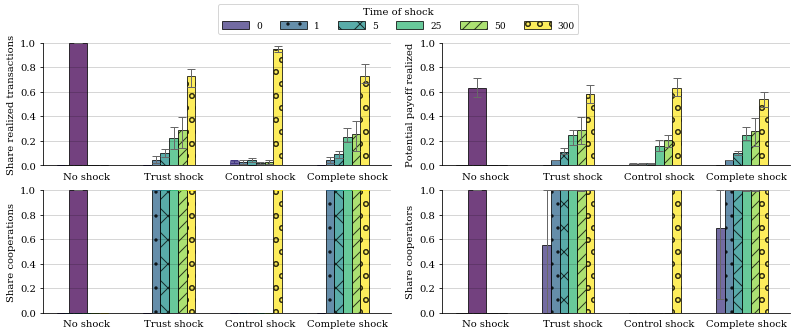

In [28]:
viridis = cm.get_cmap('viridis', 7)
indices = ["No shock", "Trust shock", "Control shock", "Complete shock"]# 
index = np.arange(len(indices))
width = 0.1

fig_width = 1.68 * 6.688 
fig_height = 4.688 

fig, axes = plt.subplots(2,2, figsize=(fig_width, fig_height), facecolor="white")

#axes[0,0].set_title("Resulting share of realized transactions", fontsize=12)
axes[0,0].set_ylabel("Share realized transactions")

axes[0,0].bar(index+0*width, t0_data["realized"], width, 
              color=viridis.colors[1], label="0", alpha=0.75, 
              yerr=[t0_data["realized_lower"], t0_data["realized_upper"]], 
              edgecolor=viridis.colors[1], ecolor=viridis.colors[1], error_kw=dict(lw=1, capsize=4, capthick=1))
axes[0,0].bar(index+1*width, t1_data["realized"], width,               
              color=viridis.colors[2], hatch=".", label="1", alpha=0.75, 
              yerr=[t1_data["realized_lower"], t1_data["realized_upper"]], 
              edgecolor="black", ecolor='#686868', error_kw=dict(lw=1, capsize=4, capthick=1))
axes[0,0].bar(index+2*width, t5_data["realized"], width, 
              color=viridis.colors[3], hatch="x", label="5", alpha=0.75, 
              yerr=[t5_data["realized_lower"], t5_data["realized_upper"]], 
              edgecolor="black", ecolor='#686868', error_kw=dict(lw=1, capsize=4, capthick=1))
axes[0,0].bar(index+3*width, t25_data["realized"], width, 
              color=viridis.colors[4], hatch=None, label="25", alpha=0.75, 
              yerr=[t25_data["realized_lower"], t25_data["realized_upper"]], 
              edgecolor="black", ecolor='#686868', error_kw=dict(lw=1, capsize=4, capthick=1))
axes[0,0].bar(index+4*width, t50_data["realized"], width, 
              color=viridis.colors[5], hatch="//", label="50", alpha=0.75, 
              yerr=[t50_data["realized_lower"], t50_data["realized_upper"]], 
              edgecolor="black", ecolor='#686868', error_kw=dict(lw=1, capsize=4, capthick=1))
axes[0,0].bar(index+5*width, t300_data["realized"], width, 
              color=viridis.colors[6], hatch="o", label="300", alpha=0.75, 
              yerr=[t300_data["realized_lower"], t300_data["realized_upper"]], 
              edgecolor="black", ecolor='#686868', error_kw=dict(lw=1, capsize=4, capthick=1))

axes[0,0].bar(index+2*width, no_shock_data["cooperations"], 2*width, 
              color=viridis.colors[0], alpha=0.75, 
              yerr=[no_shock_data["cooperations_lower"], no_shock_data["cooperations_upper"]], 
              edgecolor="black", ecolor='#686868', error_kw=dict(lw=1, capsize=4, capthick=1))

axes[1,0].set_ylabel("Share cooperations")

axes[1,0].bar(index+0*width, t0_data["cooperations"], width, 
              color=viridis.colors[1], label="0", alpha=0.75, 
              yerr=[t0_data["cooperations_lower"], t0_data["cooperations_upper"]], 
              edgecolor="black", ecolor=viridis.colors[1], error_kw=dict(lw=1, capsize=4, capthick=1))
axes[1,0].bar(index+1*width, t1_data["cooperations"], width,               
              color=viridis.colors[2], hatch=".", label="1", alpha=0.75, 
              yerr=[t1_data["cooperations_lower"], t1_data["cooperations_upper"]], 
              edgecolor="black", ecolor=viridis.colors[2], error_kw=dict(lw=1, capsize=4, capthick=1))
axes[1,0].bar(index+2*width, t5_data["cooperations"], width, 
              color=viridis.colors[3], hatch="x", label="5", alpha=0.75, 
              yerr=[t5_data["cooperations_lower"], t5_data["cooperations_upper"]], 
              edgecolor="black", ecolor=viridis.colors[3], error_kw=dict(lw=1, capsize=4, capthick=1))
axes[1,0].bar(index+3*width, t25_data["cooperations"], width, 
              color=viridis.colors[4], hatch=None, label="25", alpha=0.75, 
              yerr=[t25_data["cooperations_lower"], t25_data["cooperations_upper"]], 
              edgecolor="black", ecolor=viridis.colors[4], error_kw=dict(lw=1, capsize=4, capthick=1))
axes[1,0].bar(index+4*width, t50_data["cooperations"], width, 
              color=viridis.colors[5], hatch="//", label="50", alpha=0.75, 
              yerr=[t50_data["cooperations_lower"], t50_data["cooperations_upper"]], 
              edgecolor="black", ecolor=viridis.colors[5], error_kw=dict(lw=1, capsize=4, capthick=1))
axes[1,0].bar(index+5*width, t300_data["cooperations"], width, 
              color=viridis.colors[6], hatch="o", label="300", alpha=0.75, 
              yerr=[t300_data["cooperations_lower"], t300_data["cooperations_upper"]], 
              edgecolor="black", ecolor=viridis.colors[6], error_kw=dict(lw=1, capsize=4, capthick=1))

axes[1,0].bar(index+2*width, no_shock_data["cooperations"], 2*width, 
              color=viridis.colors[0], alpha=0.75, 
              yerr=[no_shock_data["cooperations_lower"], no_shock_data["cooperations_upper"]], 
              edgecolor="black", ecolor='#686868', error_kw=dict(lw=1, capsize=4, capthick=1))

axes[0,1].set_ylabel("Potential payoff realized")

axes[0,1].bar(index+0*width, t0_data["efficiency"], width, 
              color=viridis.colors[1], label="0", alpha=0.75, 
              yerr=[t0_data["efficiency_lower"], t0_data["efficiency_upper"]], 
              edgecolor="black", ecolor='#686868', error_kw=dict(lw=1, capsize=4, capthick=1))
axes[0,1].bar(index+1*width, t1_data["efficiency"], width,               
              color=viridis.colors[2], hatch=".", label="1", alpha=0.75, 
              yerr=[t1_data["efficiency_lower"], t1_data["efficiency_upper"]], 
              edgecolor="black", ecolor='#686868', error_kw=dict(lw=1, capsize=4, capthick=1))
axes[0,1].bar(index+2*width, t5_data["efficiency"], width, 
              color=viridis.colors[3], hatch="x", label="5", alpha=0.75, 
              yerr=[t5_data["efficiency_lower"], t5_data["efficiency_upper"]], 
              edgecolor="black", ecolor='#686868', error_kw=dict(lw=1, capsize=4, capthick=1))
axes[0,1].bar(index+3*width, t25_data["efficiency"], width, 
              color=viridis.colors[4], hatch=None, label="25", alpha=0.75, 
              yerr=[t25_data["efficiency_lower"], t25_data["efficiency_upper"]], 
              edgecolor="black", ecolor='#686868', error_kw=dict(lw=1, capsize=4, capthick=1))
axes[0,1].bar(index+4*width, t50_data["efficiency"], width, 
              color=viridis.colors[5], hatch="//", label="50", alpha=0.75, 
              yerr=[t50_data["efficiency_lower"], t50_data["efficiency_upper"]], 
              edgecolor="black", ecolor='#686868', error_kw=dict(lw=1, capsize=4, capthick=1))
axes[0,1].bar(index+5*width, t300_data["efficiency"], width, 
              color=viridis.colors[6], hatch="o", label="300", alpha=0.75, 
              yerr=[t300_data["efficiency_lower"], t300_data["efficiency_upper"]], 
              edgecolor="black", ecolor='#686868', error_kw=dict(lw=1, capsize=4, capthick=1))

axes[0,1].bar(index+2*width, no_shock_data["efficiency"], 2*width, 
              color=viridis.colors[0], alpha=0.75, 
              yerr=[no_shock_data["efficiency_lower"], no_shock_data["efficiency_upper"]], 
              edgecolor="black", ecolor='#686868', error_kw=dict(lw=1, capsize=4, capthick=1))


axes[1,1].set_ylabel("Share cooperators")

axes[1,1].bar(index+0*width, t0_data["cooperators"], width, 
              color=viridis.colors[1], label="0", alpha=0.75, 
              yerr=[t0_data["cooperators_lower"], t0_data["cooperators_upper"]], 
              edgecolor="black", ecolor='#686868', error_kw=dict(lw=1, capsize=4, capthick=1))
axes[1,1].bar(index+1*width, t1_data["cooperators"], width,               
              color=viridis.colors[2], hatch=".", label="1", alpha=0.75, 
              yerr=[t1_data["cooperators_lower"], t1_data["cooperators_upper"]], 
              edgecolor="black", ecolor='#686868', error_kw=dict(lw=1, capsize=4, capthick=1))


axes[1,1].bar(index+2*width, t5_data["cooperators"], width, 
              color=viridis.colors[3], hatch="x", label="5", alpha=0.75, 
              yerr=[t5_data["cooperators_lower"], t5_data["cooperators_upper"]], 
              edgecolor="black", ecolor='#686868', error_kw=dict(lw=1, capsize=4, capthick=1))
axes[1,1].bar(index+3*width, t25_data["cooperators"], width, 
              color=viridis.colors[4], hatch=None, label="25", alpha=0.75, 
              yerr=[t25_data["cooperators_lower"], t25_data["cooperators_upper"]], 
              edgecolor="black", ecolor='#686868', error_kw=dict(lw=1, capsize=4, capthick=1))
axes[1,1].bar(index+4*width, t50_data["cooperators"], width, 
              color=viridis.colors[5], hatch="//", label="50", alpha=0.75, 
              yerr=[t50_data["cooperators_lower"], t50_data["cooperators_upper"]], 
              edgecolor="black", ecolor='#686868', error_kw=dict(lw=1, capsize=4, capthick=1))
axes[1,1].bar(index+5*width, t300_data["cooperators"], width, 
              color=viridis.colors[6], hatch="o", label="300", alpha=0.75, 
              yerr=[t300_data["cooperators_lower"], t300_data["cooperators_upper"]], 
              edgecolor="black", ecolor='#686868', error_kw=dict(lw=1, capsize=4, capthick=1))

axes[1,1].bar(index+2*width, no_shock_data["cooperators"], 2*width, 
              color=viridis.colors[0], alpha=0.75, 
              yerr=[no_shock_data["cooperators_lower"], no_shock_data["cooperators_upper"]], 
              edgecolor="black", ecolor='#686868', error_kw=dict(lw=1, capsize=4, capthick=1))


for x in range(2):
    for y in range(2):
        axes[x,y].set_ylim(-0.0, 1.0)
        axes[x,y].set_xlim(-0.2, 38*width)
        axes[x,y].spines["top"].set_visible(False) 
        axes[x,y].set_xticks(index + 3.0*width)
        axes[x,y].set_xticklabels(indices, fontsize=10)
        axes[x,y].spines["right"].set_visible(False)       
        axes[x,y].get_yaxis().tick_left()   
        axes[x,y].xaxis.set_ticks_position('none') 
        axes[x,y].grid(False)
        axes[x,y].yaxis.grid(True, alpha=0.2)

handles, labels = axes[1,1].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=6, frameon=True,
          handlelength=3.0, handleheight=1.0, title="Time of shock", fontsize=9)

plt.tight_layout()
plt.subplots_adjust(hspace = 0.2)
plt.subplots_adjust(top=0.88)

path = figure_directory_color + "fig_06_shocks_hist.pdf"
plt.savefig(path)

## Figure 7: Dynamics of trust and control shocks

In [29]:
mpl.rcParams['lines.linewidth'] = 1
mpl.rcParams['lines.markeredgewidth'] = 1

### Prepare data

In [30]:
shock_dynamics_data = pd.read_feather("output/hawala_shocks_/hawala_shocks__agg.feather")
shock_dynamics_data.head(2)

,t,n_hawalas,n_places,int_pp,int_ph,p_gossip_rej,p_cheat_rej,lag_gossip,selec_perc,ranking_methods,selection_method,payoff_a,payoff_b,payoff_c,payoff_d,tshock,cshock,tshock_value,cshock_value,shock,trust_control,c_trust,d_trust,c_control_1,c_control_2,d_control_1,d_control_2,n_c_mean,n_c_sd,n_c_low,n_c_high,n_c_mid,n_d_mean,n_d_sd,n_d_low,n_d_high,n_d_mid,sh_d_mean,sh_d_sd,sh_d_low,sh_d_high,sh_d_mid,sh_c_mean,sh_c_sd,sh_c_low,sh_c_high,sh_c_mid,sh_c_top_mean,sh_c_top_sd,sh_c_top_low,sh_c_top_high,sh_c_top_mid,sh_c_low_mean,sh_c_low_sd,sh_c_low_low,sh_c_low_high,sh_c_low_mid,sh_d_top_mean,sh_d_top_sd,sh_d_top_low,sh_d_top_high,sh_d_top_mid,sh_d_low_mean,sh_d_low_sd,sh_d_low_low,sh_d_low_high,sh_d_low_mid,tr_fail_mean,tr_fail_sd,tr_fail_low,tr_fail_high,tr_fail_mid,tr_fail_sh_mean,tr_fail_sh_sd,tr_fail_sh_low,tr_fail_sh_high,tr_fail_sh_mid,tr_rejct_mean,tr_rejct_sd,tr_rejct_low,tr_rejct_high,tr_rejct_mid,tr_rlzd_mean,tr_rlzd_sd,tr_rlzd_low,tr_rlzd_high,tr_rlzd_mid,tr_rlzd_sh_mean,tr_rlzd_sh_sd,tr_rlzd_sh_low,tr_rlzd_sh_high,tr_rlzd_sh_mid,tr_coops_mean,tr_coops_sd,tr_coops_low,tr_coops_high,tr_coops_mid,tr_explts_mean,tr_explts_sd,tr_explts_low,tr_explts_high,tr_explts_mid,tr_defcts_mean,tr_defcts_sd,tr_defcts_low,tr_defcts_high,tr_defcts_mid,int_strgr_mean,int_strgr_sd,int_strgr_low,int_strgr_high,int_strgr_mid,int_prtnr_mean,int_prtnr_sd,int_prtnr_low,int_prtnr_high,int_prtnr_mid,int_coprts_mean,int_coprts_sd,int_coprts_low,int_coprts_high,int_coprts_mid,int_dfctrs_mean,int_dfctrs_sd,int_dfctrs_low,int_dfctrs_high,int_dfctrs_mid,pp_int_c_mean,pp_int_c_sd,pp_int_c_low,pp_int_c_high,pp_int_c_mid,pp_int_d_mean,pp_int_d_sd,pp_int_d_low,pp_int_d_high,pp_int_d_mid,eff_temp_mean,eff_temp_sd,eff_temp_low,eff_temp_high,eff_temp_mid,eff_ovrl_mean,eff_ovrl_sd,eff_ovrl_low,eff_ovrl_high,eff_ovrl_mid
0,0,100,25,100,10,1.0,1.0,-10,0.15,last_wealth_sum,replication_top_ten,4.0,8.0,0.0,-2.0,25,no,0.0,0.0,Trust: in t=25 to 0.0 Control: in t=no to 0.0,"Initial trust: 1.0, initial control: 1.0",1.0,1.0,1.0,1.0,1.0,1.0,75.0,0.000000,75.00,75.00,75.0,25.0,0.000000,25.00,25.00,25.0,0.250,0.000000,0.2500,0.2500,0.250,0.750,0.000000,0.7500,0.7500,0.750,0.75,0.000000,0.750000,0.750000,0.750000,0.750000,0.000000,0.750000,0.750000,0.75,0.25,0.000000,0.250000,0.250000,0.250000,0.250000,0.000000,0.250000,0.250000,0.25,0.0,0.000000,0.0,0.00,0.0,0.000,0.000000,0.0,0.0000,0.00,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,0.000,0.000000,0.0000,0.0,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00,0.00,0.0,0.0,0.000000,0.00,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000
1,1,100,25,100,10,1.0,1.0,-10,0.15,last_wealth_sum,replication_top_ten,4.0,8.0,0.0,-2.0,25,no,0.0,0.0,Trust: in t=25 to 0.0 Control: in t=no to 0.0,"Initial trust: 1.0, initial control: 1.0",1.0,1.0,1.0,1.0,1.0,1.0,67.6,3.977716,64.35,71.95,66.5,32.4,3.977716,28.05,35.65,33.5,0.324,0.039777,0.2805,0.3565,0.335,0.676,0.039777,0.6435,0.7195,0.665,0.30,0.090267,0.266667,0.376667,0.266667,0.806667,0.073367,0.733333,0.866667,0.80,0.70,0.090267,0.623333,0.733333,0.733333,0.193333,0.073367,0.133333,0.266667,0.20,0.9,0.994429,0.0,1.65,1.0,0.009,0.009944,0.0,0.0165,0.01,4.3,2.110819,2.0,6.0,5.0,99.1,0.994429,98.35,100.0,99.0,0.991,0.009944,0.9835,1.0,0.99,0.584332,0.024353,0.562776,0.609091,0.59,0.362209,0.028692,0.334702,0.389061,0.361818,0.05346,0.027195,0.023631,0.077,0.060303,0.980806,0.007486,0.973087,0.989965,0.979899,0.019194,0.007486,0.010035,0.026913,0.020101,151.7,4.164666,147.75,154.95,152.5,46.5,4.403282,43.35,49.65,45.5,2.250663,0.139897,2.159677,2.396719,2.180461,1.449842,0.178105,1.2525,1.642255,1.498316,0.84825,0.023454,0.824375,0.872375,0.84875,0.84825,0.023454

In [31]:
no_shock_dynamics_data = shock_dynamics_data[shock_dynamics_data["shock"]=="No shock"]
t1_shock_dynamics_data = shock_dynamics_data[shock_dynamics_data["shock"]=="Trust: in t=1 to 0.0 Control: in t=no to 0.0"]
t50_shock_dynamics_data = shock_dynamics_data[shock_dynamics_data["shock"]=="Trust: in t=50 to 0.0 Control: in t=no to 0.0"]
t300_shock_dynamics_data = shock_dynamics_data[shock_dynamics_data["shock"]=="Trust: in t=300 to 0.0 Control: in t=no to 0.0"]
c1_shock_dynamics_data = shock_dynamics_data[shock_dynamics_data["shock"]=="Trust: in t=no to 0.0 Control: in t=1 to 0.0"]
c50_shock_dynamics_data = shock_dynamics_data[shock_dynamics_data["shock"]=="Trust: in t=no to 0.0 Control: in t=50 to 0.0"]
c300_shock_dynamics_data = shock_dynamics_data[shock_dynamics_data["shock"]=="Trust: in t=no to 0.0 Control: in t=300 to 0.0"]

In [32]:
cases_indices = ["None", "1", "50", "300"]
cases_color = ["red", "blue", "green", "black"]
cases_color = ["black", "#595959", "#b3b3b3", "#8c8c8c"]
cases_type = ["--","-","--","-"]
cases_marker = ["+", "x", "o", "*"]
cases_marker = ["x", "x", "x", "x"]

First, set up data for the trust shocks:

In [33]:
frames = {
    "no": no_shock_dynamics_data[0:501],
    "t1": t1_shock_dynamics_data,
    "t50": t50_shock_dynamics_data,
    "t300": t300_shock_dynamics_data,
    "c1": c1_shock_dynamics_data,
    "c50": c50_shock_dynamics_data,
    "c300": c300_shock_dynamics_data
}

cases_lower_whiskers = {
    "no": frames["no"]["tr_rlzd_sh_mean"][:500][::50] - frames["no"]["tr_rlzd_sh_low"][:500][::50],
    "t1": frames["t1"]["tr_rlzd_sh_mean"][:500][::50] - frames["t1"]["tr_rlzd_sh_low"][:500][::50],
    "t50": frames["t50"]["tr_rlzd_sh_mean"][:500][::50] - frames["t50"]["tr_rlzd_sh_low"][:500][::50],
    "t300": frames["t300"]["tr_rlzd_sh_mean"][:500][::50] - frames["t300"]["tr_rlzd_sh_low"][:500][::50],
    "c1": frames["c1"]["tr_rlzd_sh_mean"][:500][::50] - frames["c1"]["tr_rlzd_sh_low"][:500][::50],
    "c50": frames["c50"]["tr_rlzd_sh_mean"][:500][::50] - frames["c50"]["tr_rlzd_sh_low"][:500][::50],
    "c300": frames["c300"]["tr_rlzd_sh_mean"][:500][::50] - frames["c300"]["tr_rlzd_sh_low"][:500][::50]
}

cases_upper_whiskers = {
    "no": frames["no"]["tr_rlzd_sh_high"][:500][::50] - frames["no"]["tr_rlzd_sh_mean"][:500][::50],
    "t1": frames["t1"]["tr_rlzd_sh_high"][:500][::50] - frames["t1"]["tr_rlzd_sh_mean"][:500][::50],
    "t50": frames["t50"]["tr_rlzd_sh_high"][:500][::50] - frames["t50"]["tr_rlzd_sh_mean"][:500][::50],
    "t300": frames["t300"]["tr_rlzd_sh_high"][:500][::50] - frames["t300"]["tr_rlzd_sh_mean"][:500][::50],
    "c1": frames["c1"]["tr_rlzd_sh_high"][:500][::50] - frames["c1"]["tr_rlzd_sh_mean"][:500][::50],
    "c50": frames["c50"]["tr_rlzd_sh_high"][:500][::50] - frames["c50"]["tr_rlzd_sh_mean"][:500][::50],
    "c300": frames["c300"]["tr_rlzd_sh_high"][:500][::50] - frames["c300"]["tr_rlzd_sh_mean"][:500][::50]
}

### Create the figure

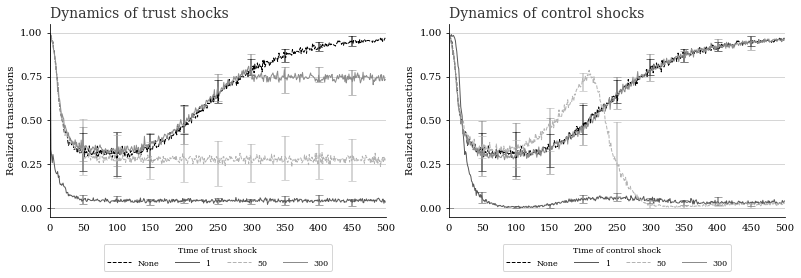

In [34]:
cases_t = ["no", "t1", "t50", "t300"]
cases_c = ["no", "c1", "c50", "c300"]

fig_width = 6.688 * 1.68

fig_height = 4.0 

fig, axes = plt.subplots(1,2, figsize=(fig_width, fig_height))

axes[0].set_title('Dynamics of trust shocks', fontsize=14, alpha=0.8, ha='left', loc='left')
axes[1].set_title('Dynamics of control shocks', fontsize=14, alpha=0.8, ha='left', loc='left')

for x in range(len(cases_t)):
    axes[0].errorbar(range(500)[::50], 
                     frames[cases_t[x]]["tr_rlzd_sh_mean"][:500][::50], 
                     yerr=[cases_lower_whiskers[cases_t[x]], cases_upper_whiskers[cases_t[x]]], 
                     color=cases_color[x], label=None, linestyle="None", marker="None", 
                     linewidth=2, alpha=0.55, capsize=4)
    axes[0].plot(range(500), 
                 frames[cases_t[x]]["tr_rlzd_sh_mean"][:500], 
                 label=cases_indices[x], linestyle=cases_type[x], color=cases_color[x], 
                 marker="None", linewidth=1, alpha=1.0)
    axes[1].errorbar(range(500)[::50], 
                     frames[cases_c[x]]["tr_rlzd_sh_mean"][:500][::50], 
                     yerr=[cases_lower_whiskers[cases_c[x]], cases_upper_whiskers[cases_c[x]]], 
                     color=cases_color[x], label=None, linestyle="None", marker="None", 
                     linewidth=2, alpha=0.55, capsize=4)
    axes[1].plot(range(500), 
                 frames[cases_c[x]]["tr_rlzd_sh_mean"][:500], 
                 label=cases_indices[x], linestyle=cases_type[x], color=cases_color[x], 
                 marker="None", markevery=50, linewidth=1, alpha=1.0)


legendtitles = ["Time of trust shock", "Time of control shock"]

for x in range(2):
    axes[x].set_ylim(-0.05, 1.05)
    axes[x].set_yticks(np.arange(0, 1.1, 0.25))
    axes[x].set_ylabel('Realized transactions')
    
    axes[x].set_xlim(10, 500)
    axes[x].set_xticks(np.arange(0, 550, 50))
    #axes[x].set_xlabel('Time')

    axes[x].grid(False)
    axes[x].yaxis.grid(True, alpha=0.2)
    axes[x].legend(loc='lower center',  ncol=4, frameon=True, 
                   handlelength=3.0, handleheight=1.0, 
                   title=legendtitles[x], fontsize=8,
                   bbox_to_anchor=(0.5, -0.3)
                  )
    axes[x].get_legend().get_title().set_fontsize('8')    
    axes[x].get_yaxis().tick_left()   
    axes[x].xaxis.set_ticks_position('none') 

plt.tight_layout()
plt.subplots_adjust(top=0.92)


path = figure_directory + "fig_07_Dynamics_realized_trust_shocks.pdf"
plt.savefig(path)
mpl.rcParams['lines.linewidth'] = 3
mpl.rcParams['lines.markeredgewidth'] = 2

### Color Version

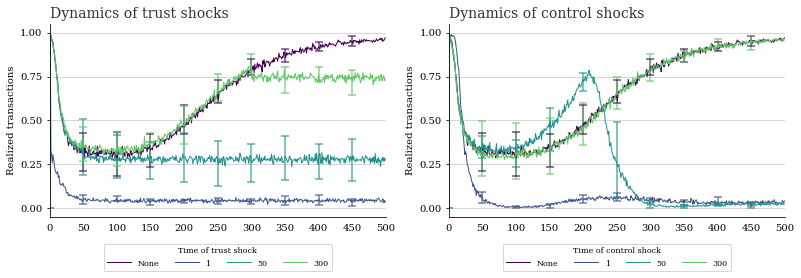

In [35]:
viridis = cm.get_cmap('viridis', 5)

cases_color = viridis.colors[0:4]
cases_type = ["-","-","-","-"]
cases_t = ["no", "t1", "t50", "t300"]
cases_c = ["no", "c1", "c50", "c300"]

fig_width = 6.688 * 1.68

fig_height = 4.0 

fig, axes = plt.subplots(1,2, figsize=(fig_width, fig_height))

axes[0].set_title('Dynamics of trust shocks', fontsize=14, alpha=0.8, ha='left', loc='left')
axes[1].set_title('Dynamics of control shocks', fontsize=14, alpha=0.8, ha='left', loc='left')

for x in range(len(cases_t)):
    axes[0].errorbar(range(500)[::50], 
                     frames[cases_t[x]]["tr_rlzd_sh_mean"][:500][::50], 
                     yerr=[cases_lower_whiskers[cases_t[x]], cases_upper_whiskers[cases_t[x]]], 
                     color=cases_color[x], label=None, linestyle="None", marker="None", 
                     linewidth=2, alpha=0.55, capsize=4)
    axes[0].plot(range(500), 
                 frames[cases_t[x]]["tr_rlzd_sh_mean"][:500], 
                 label=cases_indices[x], linestyle=cases_type[x], color=cases_color[x], 
                 marker="None", linewidth=1, alpha=1.0)
    axes[1].errorbar(range(500)[::50], 
                     frames[cases_c[x]]["tr_rlzd_sh_mean"][:500][::50], 
                     yerr=[cases_lower_whiskers[cases_c[x]], cases_upper_whiskers[cases_c[x]]], 
                     color=cases_color[x], label=None, linestyle="None", marker="None", 
                     linewidth=2, alpha=0.55, capsize=4)
    axes[1].plot(range(500), 
                 frames[cases_c[x]]["tr_rlzd_sh_mean"][:500], 
                 label=cases_indices[x], linestyle=cases_type[x], color=cases_color[x], 
                 marker="None", markevery=50, linewidth=1, alpha=1.0)


legendtitles = ["Time of trust shock", "Time of control shock"]

for x in range(2):
    axes[x].set_ylim(-0.05, 1.05)
    axes[x].set_yticks(np.arange(0, 1.1, 0.25))
    axes[x].set_ylabel('Realized transactions')
    
    axes[x].set_xlim(10, 500)
    axes[x].set_xticks(np.arange(0, 550, 50))
    #axes[x].set_xlabel('Time')

    axes[x].grid(False)
    axes[x].yaxis.grid(True, alpha=0.2)
    axes[x].legend(loc='lower center',  ncol=4, frameon=True, 
                   handlelength=3.0, handleheight=1.0, 
                   title=legendtitles[x], fontsize=8,
                   bbox_to_anchor=(0.5, -0.3)
                  )
    axes[x].get_legend().get_title().set_fontsize('8')    
    axes[x].get_yaxis().tick_left()   
    axes[x].xaxis.set_ticks_position('none') 

plt.tight_layout()
plt.subplots_adjust(top=0.92)


path = figure_directory_color + "fig_07_Dynamics_realized_trust_shocks.pdf"
plt.savefig(path)
mpl.rcParams['lines.linewidth'] = 3
mpl.rcParams['lines.markeredgewidth'] = 2

## Figure 8: Number of hawaladars and interaction density

### Data on number of hawaladars

In [36]:
n_hawaladars_data = pd.read_feather("output/hawala_framework_nbhawaladars/hawala_framework_nbhawaladars_agg.feather")
max_t = max(n_hawaladars_data["t"])
n_hawaladars_data = n_hawaladars_data[n_hawaladars_data["t"]==max_t]
n_hawaladars_data[["n_hawalas", "eff_ovrl_mean", "eff_ovrl_low", "eff_ovrl_high", "tr_rlzd_sh_mean"]]

,n_hawalas,eff_ovrl_mean,eff_ovrl_low,eff_ovrl_high,tr_rlzd_sh_mean
750,500,0.039644,0.030957,0.057485,0.141
1501,750,0.045842,0.040901,0.048973,0.612
2252,350,0.115365,0.044791,0.187521,0.183
3003,300,0.117776,0.049992,0.208706,0.230
3754,50,0.872729,0.856952,0.884628,0.967
4505,25,0.886937,0.867552,0.906665,0.950
5256,150,0.604693,0.556480,0.683898,0.951
6007,250,0.162337,0.078833,0.206114,0.413


In [37]:
n_values = n_hawaladars_data["n_hawalas"].unique()
n_values.sort()
n_values

array([ 25,  50, 150, 250, 300, 350, 500, 750])

In [38]:
eff_means = [float(n_hawaladars_data[n_hawaladars_data["n_hawalas"]==n]["eff_ovrl_mean"]) for n in n_values]
eff_low = [float(n_hawaladars_data[n_hawaladars_data["n_hawalas"]==n]["eff_ovrl_low"]) for n in n_values]
eff_high = [float(n_hawaladars_data[n_hawaladars_data["n_hawalas"]==n]["eff_ovrl_high"]) for n in n_values]
eff_lower = [eff_means[i]-eff_low[i] for i in range(len(eff_means))]
eff_upper = [eff_high[i]-eff_means[i] for i in range(len(eff_means))]

In [39]:
coops_means = [float(n_hawaladars_data[n_hawaladars_data["n_hawalas"]==n]["tr_coops_mean"]) for n in n_values]
coops_low = [float(n_hawaladars_data[n_hawaladars_data["n_hawalas"]==n]["tr_coops_low"]) for n in n_values]
coops_high = [float(n_hawaladars_data[n_hawaladars_data["n_hawalas"]==n]["tr_coops_high"]) for n in n_values]
coops_lower = [coops_means[i]-coops_low[i] for i in range(len(coops_means))]
coops_upper = [coops_high[i]-coops_means[i] for i in range(len(coops_means))]

### Data on interaction density

In [40]:
hawaladars = [100, 250, 500, 750]
int_vars = [10, 50, 100, 250, 500, 750]

ratio_hawaladars_run = [x/500 for x in hawaladars]

ratios_sweep = [x*100.0 for x in ratio_hawaladars_run]
ratios_sweep_250 = [x*250.0 for x in ratio_hawaladars_run]
ratios_sweep_500 = [x*500.0 for x in ratio_hawaladars_run]

In [41]:
ratios_sweep

[20.0, 50.0, 100.0, 150.0]

In [42]:
interaction_density = pd.read_feather("output/hawala_framework_intdensity/hawala_framework_intdensity_agg.feather")
max_t = max(interaction_density["t"])
interaction_density = interaction_density[interaction_density["t"]==max_t]
interaction_density[interaction_density["n_hawalas"]==100][["n_hawalas", "int_pp", "eff_ovrl_mean", "eff_ovrl_low", "eff_ovrl_high", "tr_rlzd_sh_mean"]]

,n_hawalas,int_pp,eff_ovrl_mean,eff_ovrl_low,eff_ovrl_high,tr_rlzd_sh_mean
1501,100,150,0.864759,0.847771,0.885241,0.994
6007,100,100,0.767095,0.702949,0.819458,0.987
8260,100,50,0.423662,0.343709,0.501654,0.868
9011,100,20,0.193373,0.130162,0.235541,0.165


Data for 100 hawaladars

In [43]:
interaction_density100 = interaction_density[interaction_density["n_hawalas"]==100]
realized_means100 = [float(interaction_density100[interaction_density100["int_pp"]==n]["tr_rlzd_sh_mean"]) for n in ratios_sweep]
realized_low100 = [float(interaction_density100[interaction_density100["int_pp"]==n]["tr_rlzd_sh_low"]) for n in ratios_sweep]
realized_high100 = [float(interaction_density100[interaction_density100["int_pp"]==n]["tr_rlzd_sh_high"]) for n in ratios_sweep]
realized_lower100 = [realized_means100[i]-realized_low100[i] for i in range(len(realized_means100))]
realized_upper100 = [realized_high100[i]-realized_means100[i] for i in range(len(realized_means100))]

In [44]:
interaction_density100 = interaction_density[interaction_density["n_hawalas"]==100]
realized_means100 = [float(interaction_density100[interaction_density100["int_pp"]==n]["tr_rlzd_sh_mean"]) for n in ratios_sweep]
realized_low100 = [float(interaction_density100[interaction_density100["int_pp"]==n]["tr_rlzd_sh_low"]) for n in ratios_sweep]
realized_high100 = [float(interaction_density100[interaction_density100["int_pp"]==n]["tr_rlzd_sh_high"]) for n in ratios_sweep]
realized_lower100 = [realized_means100[i]-realized_low100[i] for i in range(len(realized_means100))]
realized_upper100 = [realized_high100[i]-realized_means100[i] for i in range(len(realized_means100))]

Data for 250 hawaladars

In [45]:
interaction_density250 = interaction_density[interaction_density["n_hawalas"]==250]
realized_means250 = [float(interaction_density250[interaction_density250["int_pp"]==n]["tr_rlzd_sh_mean"]) for n in ratios_sweep_250]
realized_low250 = [float(interaction_density250[interaction_density250["int_pp"]==n]["tr_rlzd_sh_low"]) for n in ratios_sweep_250]
realized_high250 = [float(interaction_density250[interaction_density250["int_pp"]==n]["tr_rlzd_sh_high"]) for n in ratios_sweep_250]
realized_lower250 = [realized_means250[i]-realized_low250[i] for i in range(len(realized_means250))]
realized_upper250 = [realized_high250[i]-realized_means250[i] for i in range(len(realized_means250))]

Data for 500 hawaladars

In [46]:
interaction_density500 = interaction_density[interaction_density["n_hawalas"]==500]
realized_means500 = [float(interaction_density500[interaction_density500["int_pp"]==n]["tr_rlzd_sh_mean"]) for n in [100.0, 250.0, 500.0, 750.0]]
realized_low500 = [float(interaction_density500[interaction_density500["int_pp"]==n]["tr_rlzd_sh_low"]) for n in ratios_sweep_500]
realized_high500 = [float(interaction_density500[interaction_density500["int_pp"]==n]["tr_rlzd_sh_high"]) for n in ratios_sweep_500]
realized_lower500 = [realized_means500[i]-realized_low500[i] for i in range(len(realized_means500))]
realized_upper500 = [realized_high500[i]-realized_means500[i] for i in range(len(realized_means500))]

### Final plot

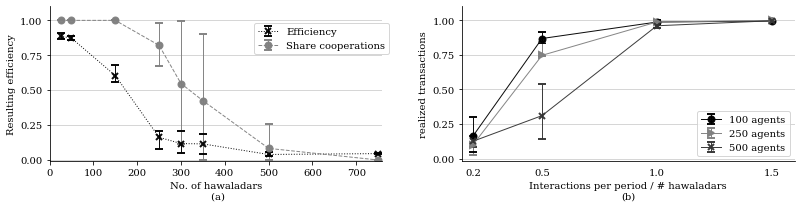

In [47]:
fig_width = 6.688 * 1.68
fig_height = 3.0
fig, axes = plt.subplots(1,2, figsize=(fig_width, fig_height))

axes[0].set_yticks(np.arange(0, 1.1, 0.25))
axes[0].set_ylim(-0.01, 1.1)
axes[0].get_yaxis().tick_left() 
axes[0].get_xaxis().tick_bottom() 
axes[0].set_xlim(0, 760)
axes[0].set_xticks(np.arange(0, 760, 100))
axes[0].set_ylabel("Resulting efficiency", fontsize=10)
axes[0].set_xlabel('No. of hawaladars\n (a)', fontsize=10)

axes[0].errorbar(n_values, eff_means, 
            yerr=[eff_lower, eff_upper], 
            marker="x", color="black", alpha=0.95, markersize=6, capsize=4, 
            linewidth=1, linestyle=":", label="Efficiency")


axes[0].errorbar(n_values, coops_means, 
            yerr=[coops_lower, coops_upper], 
            marker="o", color="grey", alpha=0.95, markersize=6, capsize=4,
            linewidth=1, linestyle="--", label="Share cooperations")

axes[0].legend(loc=2, fontsize=10,
              bbox_to_anchor=(0.6, 0.925))


axes[1].set_ylabel('realized transactions', fontsize=10)
axes[1].set_xticks(ratio_hawaladars_run)
axes[1].errorbar(ratio_hawaladars_run, realized_means100, 
                 yerr=[realized_lower100, realized_upper100], 
                 marker="o", label="100 agents", color="black", alpha=0.95, markersize=6, linewidth=1, capsize=4)
axes[1].errorbar(ratio_hawaladars_run, realized_means250, 
                 yerr=[realized_lower250, realized_upper250], 
                 marker=">", label="250 agents", color="grey", alpha=0.95, markersize=6, linewidth=1, capsize=4)
axes[1].errorbar(ratio_hawaladars_run, realized_means500, 
                 yerr=[realized_lower500, realized_upper500], 
                 marker="x", label="500 agents", color="#333333", alpha=0.95, markersize=6, linewidth=1, capsize=4)



axes[1].grid(True, alpha=0.25)
axes[1].legend(loc="best", fontsize=10, ncol=1)
axes[1].set_yticks(np.arange(0, 1.1, 0.25))
axes[1].set_ylim(-0.02, 1.1)

axes[1].get_yaxis().tick_left()   
axes[1].xaxis.set_ticks_position('none') 
axes[1].set_xlim(0.15, 1.6)
axes[1].yaxis.grid(True, alpha=0.2)

axes[1].set_xlabel('Interactions per period / # hawaladars\n(b)', fontsize=10)

axes[0].grid(False)
axes[0].yaxis.grid(True, alpha=0.2)
axes[1].grid(False)
axes[1].yaxis.grid(True, alpha=0.2)

plt.tight_layout()
# plt.grid(False)
path = figure_directory + "fig_08_nb_hawaladars.pdf"
plt.savefig(path)

### Color version

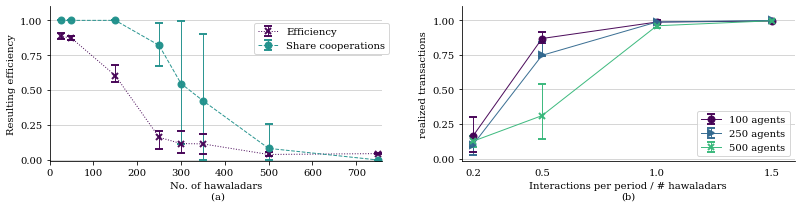

In [48]:
viridis2 = cm.get_cmap('viridis', 3)
viridis3 = cm.get_cmap('viridis', 4)

fig_width = 6.688 * 1.68
fig_height = 3.0
fig, axes = plt.subplots(1,2, figsize=(fig_width, fig_height))

axes[0].set_yticks(np.arange(0, 1.1, 0.25))
axes[0].set_ylim(-0.01, 1.1)
axes[0].get_yaxis().tick_left() 
axes[0].get_xaxis().tick_bottom() 
axes[0].set_xlim(0, 760)
axes[0].set_xticks(np.arange(0, 760, 100))
axes[0].set_ylabel("Resulting efficiency", fontsize=10)
axes[0].set_xlabel('No. of hawaladars\n (a)', fontsize=10)

axes[0].errorbar(n_values, eff_means, 
            yerr=[eff_lower, eff_upper], 
            marker="x", color=viridis2.colors[0], alpha=0.95, markersize=6, capsize=4, 
            linewidth=1, linestyle=":", label="Efficiency")


axes[0].errorbar(n_values, coops_means, 
            yerr=[coops_lower, coops_upper], 
            marker="o", color=viridis2.colors[1], alpha=0.95, markersize=6, capsize=4,
            linewidth=1, linestyle="--", label="Share cooperations")

axes[0].legend(loc=2, fontsize=10,
              bbox_to_anchor=(0.6, 0.925))


axes[1].set_ylabel('realized transactions', fontsize=10)
axes[1].set_xticks(ratio_hawaladars_run)
axes[1].errorbar(ratio_hawaladars_run, realized_means100, 
                 yerr=[realized_lower100, realized_upper100], 
                 marker="o", label="100 agents", color=viridis3.colors[0], alpha=0.95, markersize=6, linewidth=1, capsize=4)
axes[1].errorbar(ratio_hawaladars_run, realized_means250, 
                 yerr=[realized_lower250, realized_upper250], 
                 marker=">", label="250 agents", color=viridis3.colors[1], alpha=0.95, markersize=6, linewidth=1, capsize=4)
axes[1].errorbar(ratio_hawaladars_run, realized_means500, 
                 yerr=[realized_lower500, realized_upper500], 
                 marker="x", label="500 agents", color=viridis3.colors[2], alpha=0.95, markersize=6, linewidth=1, capsize=4)



axes[1].grid(True, alpha=0.25)
axes[1].legend(loc="best", fontsize=10, ncol=1)
axes[1].set_yticks(np.arange(0, 1.1, 0.25))
axes[1].set_ylim(-0.02, 1.1)

axes[1].get_yaxis().tick_left()   
axes[1].xaxis.set_ticks_position('none') 
axes[1].set_xlim(0.15, 1.6)
axes[1].yaxis.grid(True, alpha=0.2)

axes[1].set_xlabel('Interactions per period / # hawaladars\n(b)', fontsize=10)

axes[0].grid(False)
axes[0].yaxis.grid(True, alpha=0.2)
axes[1].grid(False)
axes[1].yaxis.grid(True, alpha=0.2)

plt.tight_layout()
# plt.grid(False)
path = figure_directory_color + "fig_08_nb_hawaladars.pdf"
plt.savefig(path)

## Figure 9: Forgiveness

In [49]:
gossip_vals = [1, 5, 10, 20, 30, 40, 50, 100]
gossip_vals = [-1*i for i in gossip_vals]

### Prepare data

In [50]:
forgiveness_data = pd.read_feather("output/hawala_framework_forgiveness/hawala_framework_forgiveness_agg.feather")
max_t = max(interaction_density["t"])
forgiveness_data = forgiveness_data[forgiveness_data["t"]==max_t]

In [51]:
forgiveness_data100 = forgiveness_data[forgiveness_data["n_hawalas"]==100]

forgiveness_efficiency_means100 = [float(forgiveness_data100[forgiveness_data100["lag_gossip"]==n]["eff_ovrl_mean"]) for n in gossip_vals]
forgiveness_efficiency_low100 = [float(forgiveness_data100[forgiveness_data100["lag_gossip"]==n]["eff_ovrl_low"]) for n in gossip_vals]
forgiveness_efficiency_high100 = [float(forgiveness_data100[forgiveness_data100["lag_gossip"]==n]["eff_ovrl_high"]) for n in gossip_vals]
forgiveness_efficiency_lower100 = [forgiveness_efficiency_means100[i]-forgiveness_efficiency_low100[i] for i in range(len(forgiveness_efficiency_means100))]
forgiveness_efficiency_upper100 = [forgiveness_efficiency_high100[i]-forgiveness_efficiency_means100[i] for i in range(len(forgiveness_efficiency_means100))]

forgiveness_cooperators_means100 = [float(forgiveness_data100[forgiveness_data100["lag_gossip"]==n]["sh_c_mean"]) for n in gossip_vals]
forgiveness_cooperators_low100 = [float(forgiveness_data100[forgiveness_data100["lag_gossip"]==n]["sh_c_low"]) for n in gossip_vals]
forgiveness_cooperators_high100 = [float(forgiveness_data100[forgiveness_data100["lag_gossip"]==n]["sh_c_high"]) for n in gossip_vals]
forgiveness_cooperators_lower100 = [forgiveness_cooperators_means100[i]-forgiveness_cooperators_low100[i] for i in range(len(forgiveness_cooperators_means100))]
forgiveness_cooperators_upper100 = [forgiveness_cooperators_high100[i]-forgiveness_cooperators_means100[i] for i in range(len(forgiveness_cooperators_means100))]


In [52]:
forgiveness_data250 = forgiveness_data[forgiveness_data["n_hawalas"]==250]

forgiveness_efficiency_means250 = [float(forgiveness_data250[forgiveness_data250["lag_gossip"]==n]["eff_ovrl_mean"]) for n in gossip_vals]
forgiveness_efficiency_low250 = [float(forgiveness_data250[forgiveness_data250["lag_gossip"]==n]["eff_ovrl_low"]) for n in gossip_vals]
forgiveness_efficiency_high250 = [float(forgiveness_data250[forgiveness_data250["lag_gossip"]==n]["eff_ovrl_high"]) for n in gossip_vals]
forgiveness_efficiency_lower250 = [forgiveness_efficiency_means250[i]-forgiveness_efficiency_low250[i] for i in range(len(forgiveness_efficiency_means250))]
forgiveness_efficiency_upper250 = [forgiveness_efficiency_high250[i]-forgiveness_efficiency_means250[i] for i in range(len(forgiveness_efficiency_means250))]

forgiveness_cooperators_means250 = [float(forgiveness_data250[forgiveness_data250["lag_gossip"]==n]["sh_c_mean"]) for n in gossip_vals]
forgiveness_cooperators_low250 = [float(forgiveness_data250[forgiveness_data250["lag_gossip"]==n]["sh_c_low"]) for n in gossip_vals]
forgiveness_cooperators_high250 = [float(forgiveness_data250[forgiveness_data250["lag_gossip"]==n]["sh_c_high"]) for n in gossip_vals]
forgiveness_cooperators_lower250 = [forgiveness_cooperators_means250[i]-forgiveness_cooperators_low250[i] for i in range(len(forgiveness_cooperators_means250))]
forgiveness_cooperators_upper250 = [forgiveness_cooperators_high250[i]-forgiveness_cooperators_means250[i] for i in range(len(forgiveness_cooperators_means250))]


In [53]:
forgiveness_data500 = forgiveness_data[forgiveness_data["n_hawalas"]==500]

forgiveness_efficiency_means500 = [float(forgiveness_data500[forgiveness_data500["lag_gossip"]==n]["eff_ovrl_mean"]) for n in gossip_vals]
forgiveness_efficiency_low500 = [float(forgiveness_data500[forgiveness_data500["lag_gossip"]==n]["eff_ovrl_low"]) for n in gossip_vals]
forgiveness_efficiency_high500 = [float(forgiveness_data500[forgiveness_data500["lag_gossip"]==n]["eff_ovrl_high"]) for n in gossip_vals]
forgiveness_efficiency_lower500 = [forgiveness_efficiency_means500[i]-forgiveness_efficiency_low500[i] for i in range(len(forgiveness_efficiency_means500))]
forgiveness_efficiency_upper500 = [forgiveness_efficiency_high500[i]-forgiveness_efficiency_means500[i] for i in range(len(forgiveness_efficiency_means500))]

forgiveness_cooperators_means500 = [float(forgiveness_data500[forgiveness_data500["lag_gossip"]==n]["sh_c_mean"]) for n in gossip_vals]
forgiveness_cooperators_low500 = [float(forgiveness_data500[forgiveness_data500["lag_gossip"]==n]["sh_c_low"]) for n in gossip_vals]
forgiveness_cooperators_high500 = [float(forgiveness_data500[forgiveness_data500["lag_gossip"]==n]["sh_c_high"]) for n in gossip_vals]
forgiveness_cooperators_lower500 = [forgiveness_cooperators_means500[i]-forgiveness_cooperators_low500[i] for i in range(len(forgiveness_cooperators_means500))]
forgiveness_cooperators_upper500 = [forgiveness_cooperators_high500[i]-forgiveness_cooperators_means500[i] for i in range(len(forgiveness_cooperators_means500))]


### Create figure

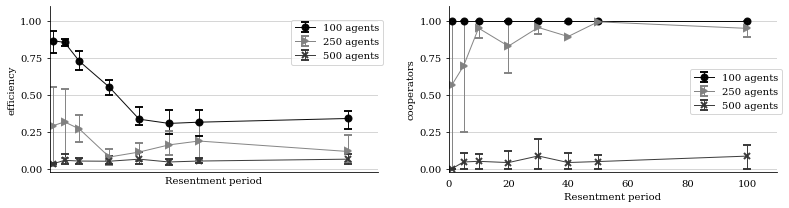

In [54]:
gossip_vals_plot = [-1*i for i in gossip_vals]

fig_width = 6.688 * 1.68
fig_height = 3.0
fig, axes = plt.subplots(1,2, figsize=(fig_width, fig_height))

axes[0].set_ylabel('efficiency', fontsize=10)
axes[0].set_ylim(-0.05, 1.22)
axes[0].set_yticks(np.arange(0, 1.1, 0.1))
axes[0].set_xlim(0, 110)
axes[0].set_xticks(gossip_vals)

axes[0].errorbar(gossip_vals_plot, forgiveness_efficiency_means100, 
                 yerr=[forgiveness_efficiency_lower100, forgiveness_efficiency_upper100], 
                 marker="o", label="100 agents", color="black", alpha=0.95, markersize=6, linewidth=1, capsize=4)
axes[0].errorbar(gossip_vals_plot, forgiveness_efficiency_means250, 
                 yerr=[forgiveness_efficiency_lower250, forgiveness_efficiency_upper250], 
                 marker=">", label="250 agents", color="grey", alpha=0.95, markersize=6, linewidth=1, capsize=4)
axes[0].errorbar(gossip_vals_plot, forgiveness_efficiency_means500, 
                 yerr=[forgiveness_efficiency_lower500, forgiveness_efficiency_upper500], 
                 marker="x", label="500 agents", color="#333333", alpha=0.95, markersize=6, linewidth=1, capsize=4) 

axes[0].legend(loc=2, fontsize=10, ncol=1, bbox_to_anchor=(0.72, 0.95))

axes[1].errorbar(gossip_vals_plot, forgiveness_cooperators_means100, 
                 yerr=[forgiveness_cooperators_lower100, forgiveness_cooperators_upper100], 
                 marker="o", label="100 agents", color="black", alpha=0.95, markersize=6, linewidth=1, capsize=4)
axes[1].errorbar(gossip_vals_plot, forgiveness_cooperators_means250, 
                 yerr=[forgiveness_cooperators_lower250, forgiveness_cooperators_upper250], 
                 marker=">", label="250 agents", color="grey", alpha=0.95, markersize=6, linewidth=1, capsize=4)
axes[1].errorbar(gossip_vals_plot, forgiveness_cooperators_means500, 
                 yerr=[forgiveness_cooperators_lower500, forgiveness_cooperators_upper500], 
                 marker="x", label="500 agents", color="#333333", alpha=0.95, markersize=6, linewidth=1, capsize=4)

axes[1].set_ylabel('cooperators', fontsize=10)
axes[1].legend(loc=2, fontsize=10, ncol=1, bbox_to_anchor=(0.72, 0.65))

for x in range(2):
    axes[x].grid(True, alpha=0.25)
    axes[x].set_yticks(np.arange(0, 1.1, 0.25))
    axes[x].set_ylim(-0.02, 1.1)
    axes[x].get_yaxis().tick_left() 
    
    axes[x].xaxis.set_ticks_position('none') 
    axes[x].set_xlim(0, 110)
    axes[x].xaxis.grid(False)
    axes[x].yaxis.grid(True, alpha=0.2)
    axes[x].set_xlabel('Resentment period', fontsize=10)
    
plt.tight_layout()
path = figure_directory + "fig_09_forgiveness-eff.pdf"
plt.savefig(path)

### Color version

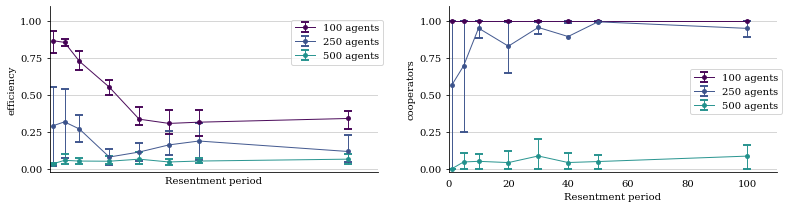

In [55]:
viridis = cm.get_cmap('viridis', 5)

gossip_vals_plot = [-1*i for i in gossip_vals]

fig_width = 6.688 * 1.68
fig_height = 3.0
fig, axes = plt.subplots(1,2, figsize=(fig_width, fig_height))

axes[0].set_ylabel('efficiency', fontsize=10)
axes[0].set_ylim(-0.05, 1.22)
axes[0].set_yticks(np.arange(0, 1.1, 0.1))
axes[0].set_xlim(0, 110)
axes[0].set_xticks(gossip_vals)

axes[0].errorbar(gossip_vals_plot, forgiveness_efficiency_means100, 
                 yerr=[forgiveness_efficiency_lower100, forgiveness_efficiency_upper100], 
                 marker=".", label="100 agents", color=viridis.colors[0], alpha=0.95, markersize=6, linewidth=1, capsize=4)
axes[0].errorbar(gossip_vals_plot, forgiveness_efficiency_means250, 
                 yerr=[forgiveness_efficiency_lower250, forgiveness_efficiency_upper250], 
                 marker=".", label="250 agents", color=viridis.colors[1], alpha=0.95, markersize=6, linewidth=1, capsize=4)
axes[0].errorbar(gossip_vals_plot, forgiveness_efficiency_means500, 
                 yerr=[forgiveness_efficiency_lower500, forgiveness_efficiency_upper500], 
                 marker=".", label="500 agents", color=viridis.colors[2], alpha=0.95, markersize=6, linewidth=1, capsize=4) 

axes[0].legend(loc=2, fontsize=10, ncol=1, bbox_to_anchor=(0.72, 0.95))

axes[1].errorbar(gossip_vals_plot, forgiveness_cooperators_means100, 
                 yerr=[forgiveness_cooperators_lower100, forgiveness_cooperators_upper100], 
                 marker=".", label="100 agents", color=viridis.colors[0], alpha=0.95, markersize=6, linewidth=1, capsize=4)
axes[1].errorbar(gossip_vals_plot, forgiveness_cooperators_means250, 
                 yerr=[forgiveness_cooperators_lower250, forgiveness_cooperators_upper250], 
                 marker=".", label="250 agents", color=viridis.colors[1], alpha=0.95, markersize=6, linewidth=1, capsize=4)
axes[1].errorbar(gossip_vals_plot, forgiveness_cooperators_means500, 
                 yerr=[forgiveness_cooperators_lower500, forgiveness_cooperators_upper500], 
                 marker=".", label="500 agents", color=viridis.colors[2], alpha=0.95, markersize=6, linewidth=1, capsize=4)

axes[1].set_ylabel('cooperators', fontsize=10)
axes[1].legend(loc=2, fontsize=10, ncol=1, bbox_to_anchor=(0.72, 0.65))

for x in range(2):
    axes[x].grid(True, alpha=0.25)
    axes[x].set_yticks(np.arange(0, 1.1, 0.25))
    axes[x].set_ylim(-0.02, 1.1)
    axes[x].get_yaxis().tick_left() 
    
    axes[x].xaxis.set_ticks_position('none') 
    axes[x].set_xlim(0, 110)
    axes[x].xaxis.grid(False)
    axes[x].yaxis.grid(True, alpha=0.2)
    axes[x].set_xlabel('Resentment period', fontsize=10)
    
plt.tight_layout()
path = figure_directory_color + "fig_09_forgiveness-eff.pdf"
plt.savefig(path)

## Figure 10: Population growth

In [56]:
pop_growth_data = pd.read_feather("output/hawala_framework_pop_growth/hawala_framework_pop_growth_agg.feather")
max_t = max(pop_growth_data["t"])
pop_growth_data = pop_growth_data[pop_growth_data["t"]==max_t]

### Prepare data

In [57]:
pop_growth_data.head()

,t,n_hawalas,n_places,int_pp,int_ph,p_gossip_rej,p_cheat_rej,lag_gossip,selec_perc,ranking_methods,selection_method,payoff_a,payoff_b,payoff_c,payoff_d,tshock,cshock,tshock_value,cshock_value,shock,trust_control,c_trust,d_trust,c_control_1,c_control_2,d_control_1,d_control_2,pop_growth,pop_growth_kind,pop_growth_type,mistake_prob,n_c_mean,n_c_sd,n_c_low,n_c_high,n_c_mid,n_d_mean,n_d_sd,n_d_low,n_d_high,n_d_mid,sh_d_mean,sh_d_sd,sh_d_low,sh_d_high,sh_d_mid,sh_c_mean,sh_c_sd,sh_c_low,sh_c_high,sh_c_mid,sh_c_top_mean,sh_c_top_sd,sh_c_top_low,sh_c_top_high,sh_c_top_mid,sh_c_low_mean,sh_c_low_sd,sh_c_low_low,sh_c_low_high,sh_c_low_mid,sh_d_top_mean,sh_d_top_sd,sh_d_top_low,sh_d_top_high,sh_d_top_mid,sh_d_low_mean,sh_d_low_sd,sh_d_low_low,sh_d_low_high,sh_d_low_mid,tr_fail_mean,tr_fail_sd,tr_fail_low,tr_fail_high,...,tr_fail_sh_mean,tr_fail_sh_sd,tr_fail_sh_low,tr_fail_sh_high,tr_fail_sh_mid,tr_rejct_mean,tr_rejct_sd,tr_rejct_low,tr_rejct_high,tr_rejct_mid,tr_rlzd_mean,tr_rlzd_sd,tr_rlzd_low,tr_rlzd_high,tr_rlzd_mid,tr_rlzd_sh_mean,tr_rlzd_sh_sd,tr_rlzd_sh_low,tr_rlzd_sh_high,tr_rlzd_sh_mid,tr_coops_mean,tr_coops_sd,tr_coops_low,tr_coops_high,tr_coops_mid,tr_explts_mean,tr_explts_sd,tr_explts_low,tr_explts_high,tr_explts_mid,tr_defcts_mean,tr_defcts_sd,tr_defcts_low,tr_defcts_high,tr_defcts_mid,int_strgr_mean,int_strgr_sd,int_strgr_low,int_strgr_high,int_strgr_mid,int_prtnr_mean,int_prtnr_sd,int_prtnr_low,int_prtnr_high,int_prtnr_mid,int_coprts_mean,int_coprts_sd,int_coprts_low,int_coprts_high,int_coprts_mid,int_dfctrs_mean,int_dfctrs_sd,int_dfctrs_low,int_dfctrs_high,int_dfctrs_mid,pp_int_c_mean,pp_int_c_sd,pp_int_c_low,pp_int_c_high,pp_int_c_mid,pp_int_d_mean,pp_int_d_sd,pp_int_d_low,pp_int_d_high,pp_int_d_mid,eff_temp_mean,eff_temp_sd,eff_temp_low,eff_temp_high,eff_temp_mid,eff_ovrl_mean,eff_ovrl_sd,eff_ovrl_low,eff_ovrl_high,eff_ovrl_mid
750,750,100,25,100,10,1.0,1.0,-10,0.15,last_wealth_sum,replication_top_ten,4.0,8.0,0.0,-2.0,no,no,0.0,0.0,No shock,"Initial trust: 1.0, initial control: 1.0",1.0,1.0,1.0,1.0,1.0,1.0,0.0,constant_number,standard_growth,0.0,100.0,0.000000,100.0,100.00,100.0,0.0,0.000000,0.00,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0,1.247219,1.00,3.65,...,0.020,0.012472,0.0100,0.0365,0.015,6.5,4.089281,4.0,11.6,4.5,98.0,1.247219,96.35,99.00,98.5,0.980,0.012472,0.9635,0.9900,0.985,1.000000,0.00000,1.0,1.0,1.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,196.0,2.494438,192.7,198.0,197.0,0.0,0.000000,0.0,0.0,0.0,1.960000,0.024944,1.927000,1.980000,1.970000,0.000000,0.000000,0.0,0.0,0.0,0.9800,0.012472,0.96350,0.9900,0.985,0.735165,0.029809,0.703257,0.759855,0.746847
1501,750,100,25,100,10,1.0,1.0,-10,0.15,last_wealth_sum,replication_top_ten,4.0,8.0,0.0,-2.0,no,no,0.0,0.0,No shock,"Initial trust: 1.0, initial control: 1.0",1.0,1.0,1.0,1.0,1.0,1.0,0.0,constant_number,neutral_growth,0.0,100.0,0.000000,100.0,100.00,100.0,0.0,0.000000,0.00,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.5,1.433721,0.00,3.00,...,0.015,0.014337,0.0000,0.0300,0.015,4.5,4.972145,0.0,10.6,3.5,98.5,1.433721,97.00,100.00,98.5,0.985,0.014337,0.9700,1.0000,0.985,1.000000,0.00000,1.0,1.0,1.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,197.0,2.867442,194.0,200.0,197.0,0.0,0.000000,0.0,0.0,0.0,1.970000,0.028674,1.940000,2.000000,1.970000,0.000000,0.000000,0.0,0.0,0.0,0.9850,0.014337,0.97000,1.0000,0.985,0.760010,0.068848,0.700708,0.818371,0.729508
2252,750,100,25,100,10,1.0,1.0,-10,0.15,last_wealth_s

In [58]:
realized_growth_no_mean = pop_growth_data[(pop_growth_data["pop_growth"]==0.0) & (pop_growth_data["pop_growth_type"]=="standard_growth")]["tr_rlzd_sh_mean"]
realized_growth_no_low = pop_growth_data[(pop_growth_data["pop_growth"]==0.0) & (pop_growth_data["pop_growth_type"]=="standard_growth")]["tr_rlzd_sh_low"]
realized_growth_no_high = pop_growth_data[(pop_growth_data["pop_growth"]==0.0) & (pop_growth_data["pop_growth_type"]=="standard_growth")]["tr_rlzd_sh_high"]
realized_growth_no_lower = realized_growth_no_mean - realized_growth_no_low
realized_growth_no_upper = realized_growth_no_high - realized_growth_no_mean


cooperations_growth_no_mean = pop_growth_data[(pop_growth_data["pop_growth"]==0.0) & (pop_growth_data["pop_growth_type"]=="standard_growth")]["tr_coops_mean"]
cooperations_growth_no_low = pop_growth_data[(pop_growth_data["pop_growth"]==0.0) & (pop_growth_data["pop_growth_type"]=="standard_growth")]["tr_coops_low"]
cooperations_growth_no_high = pop_growth_data[(pop_growth_data["pop_growth"]==0.0) & (pop_growth_data["pop_growth_type"]=="standard_growth")]["tr_coops_high"]
cooperations_growth_no_lower = cooperations_growth_no_mean - cooperations_growth_no_low
cooperations_growth_no_upper = cooperations_growth_no_high - cooperations_growth_no_mean


In [59]:
realized_growth_standard_mean = pop_growth_data[(pop_growth_data["pop_growth"]==0.1) & (pop_growth_data["pop_growth_type"]=="standard_growth")]["tr_rlzd_sh_mean"]
realized_growth_standard_low = pop_growth_data[(pop_growth_data["pop_growth"]==0.1) & (pop_growth_data["pop_growth_type"]=="standard_growth")]["tr_rlzd_sh_low"]
realized_growth_standard_high = pop_growth_data[(pop_growth_data["pop_growth"]==0.1) & (pop_growth_data["pop_growth_type"]=="standard_growth")]["tr_rlzd_sh_high"]
realized_growth_standard_lower = realized_growth_standard_mean - realized_growth_standard_low
realized_growth_standard_upper = realized_growth_standard_high - realized_growth_standard_mean


cooperations_growth_standard_mean = pop_growth_data[(pop_growth_data["pop_growth"]==0.1) & (pop_growth_data["pop_growth_type"]=="standard_growth")]["tr_coops_mean"]
cooperations_growth_standard_low = pop_growth_data[(pop_growth_data["pop_growth"]==0.1) & (pop_growth_data["pop_growth_type"]=="standard_growth")]["tr_coops_low"]
cooperations_growth_standard_high = pop_growth_data[(pop_growth_data["pop_growth"]==0.1) & (pop_growth_data["pop_growth_type"]=="standard_growth")]["tr_coops_high"]
cooperations_growth_standard_lower = cooperations_growth_standard_mean - cooperations_growth_standard_low
cooperations_growth_standard_upper = cooperations_growth_standard_high - cooperations_growth_standard_mean


In [60]:
realized_growth_neutral_mean = pop_growth_data[(pop_growth_data["pop_growth"]==0.1) & (pop_growth_data["pop_growth_type"]=="neutral_growth")]["tr_rlzd_sh_mean"]
realized_growth_neutral_low = pop_growth_data[(pop_growth_data["pop_growth"]==0.1) & (pop_growth_data["pop_growth_type"]=="neutral_growth")]["tr_rlzd_sh_low"]
realized_growth_neutral_high = pop_growth_data[(pop_growth_data["pop_growth"]==0.1) & (pop_growth_data["pop_growth_type"]=="neutral_growth")]["tr_rlzd_sh_high"]
realized_growth_neutral_lower = realized_growth_neutral_mean - realized_growth_neutral_low
realized_growth_neutral_upper = realized_growth_neutral_high - realized_growth_neutral_mean


cooperations_growth_neutral_mean = pop_growth_data[(pop_growth_data["pop_growth"]==0.1) & (pop_growth_data["pop_growth_type"]=="neutral_growth")]["tr_coops_mean"]
cooperations_growth_neutral_low = pop_growth_data[(pop_growth_data["pop_growth"]==0.1) & (pop_growth_data["pop_growth_type"]=="neutral_growth")]["tr_coops_low"]
cooperations_growth_neutral_high = pop_growth_data[(pop_growth_data["pop_growth"]==0.1) & (pop_growth_data["pop_growth_type"]=="neutral_growth")]["tr_coops_high"]
cooperations_growth_neutral_lower = cooperations_growth_neutral_mean - cooperations_growth_neutral_low
cooperations_growth_neutral_upper = cooperations_growth_neutral_high - cooperations_growth_neutral_mean


In [61]:
indices = ["No growth", "1% neutral\n growth", "1% growth"]

realized_interactions = [realized_growth_no_mean, realized_growth_neutral_mean, realized_growth_standard_mean]
realized_interactions_lower = [realized_growth_no_lower, realized_growth_neutral_lower, realized_growth_standard_lower]
realized_interactions_upper = [realized_growth_no_upper, realized_growth_neutral_upper, realized_growth_standard_upper]

type_interactions = [cooperations_growth_no_mean, cooperations_growth_neutral_mean, cooperations_growth_standard_mean]
type_interactions_lower = [cooperations_growth_no_lower, cooperations_growth_neutral_lower, cooperations_growth_standard_lower]
type_interactions_upper = [cooperations_growth_no_upper, cooperations_growth_neutral_upper, cooperations_growth_standard_upper]

In [62]:
type_interactions = [float(i) for i in type_interactions]
type_interactions_lower = [float(i) for i in type_interactions_lower]
type_interactions_upper = [float(i) for i in type_interactions_upper]

realized_interactions = [float(i) for i in realized_interactions]
realized_interactions_lower = [float(i) for i in realized_interactions_lower]
realized_interactions_upper = [float(i) for i in realized_interactions_upper]


### Make the figure

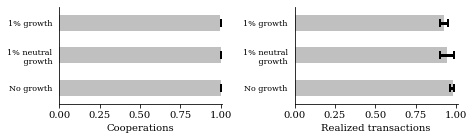

In [63]:
fig_width = 6.688 
fig_height = fig_width / (1.618*2)
indices = ["No growth", "1% neutral\n growth", "1% growth"]
width = 0.05
index = np.arange(len(indices))
index = np.arange(0, 1.5, 0.5)
index = np.array([0.2, 0.3, 0.4])
fig, axes = plt.subplots(1,2, figsize=(fig_width, fig_height))

axes[0].barh(index-0.00*width, type_interactions, width, 
       alpha=1.0, color="#C0C0C0",
       xerr=[type_interactions_lower, type_interactions_upper], capsize=4)

axes[0].set_ylim(0.15, 0.45)
axes[0].set_yticks(np.array([0.2, 0.3, 0.4]))
axes[0].set_yticklabels(indices, fontsize=8)#, rotation=330)
axes[0].yaxis.set_ticks_position('none') 

axes[0].set_xlim(-0.00, 1.01)
axes[0].set_xlabel('Cooperations', fontsize=10)
axes[0].get_xaxis().tick_bottom()  


axes[1].barh(index-0.00*width, realized_interactions, width, 
       alpha=1.0, color="#C0C0C0",
       xerr=[realized_interactions_lower, realized_interactions_upper], capsize=4)

axes[1].set_ylim(0.15, 0.45)
axes[1].set_yticks(np.array([0.2, 0.3, 0.4]))
axes[1].set_yticklabels(indices, fontsize=8)#, rotation=330)
axes[1].yaxis.set_ticks_position('none') 

axes[1].set_xlim(-0.00, 1.01)
axes[1].set_xlabel('Realized transactions', fontsize=10)
axes[1].get_xaxis().tick_bottom()  

plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.grid(False)

path = figure_directory + "fig_10_population-growth_type_both.pdf"
plt.savefig(path)

### Color version

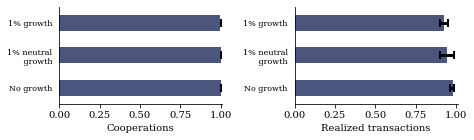

In [64]:
viridis = cm.get_cmap('viridis', 5)
col_used = "#0e1c53"

fig_width = 6.688 
fig_height = fig_width / (1.618*2)
indices = ["No growth", "1% neutral\n growth", "1% growth"]
width = 0.05
index = np.arange(len(indices))
index = np.arange(0, 1.5, 0.5)
index = np.array([0.2, 0.3, 0.4])
fig, axes = plt.subplots(1,2, figsize=(fig_width, fig_height))

axes[0].barh(index-0.00*width, type_interactions, width, 
       alpha=0.75, color=col_used,
       xerr=[type_interactions_lower, type_interactions_upper], capsize=4)

axes[0].set_ylim(0.15, 0.45)
axes[0].set_yticks(np.array([0.2, 0.3, 0.4]))
axes[0].set_yticklabels(indices, fontsize=8)#, rotation=330)
axes[0].yaxis.set_ticks_position('none') 

axes[0].set_xlim(-0.00, 1.01)
axes[0].set_xlabel('Cooperations', fontsize=10)
axes[0].get_xaxis().tick_bottom()  


axes[1].barh(index-0.00*width, realized_interactions, width, 
       alpha=0.75, color=col_used,
       xerr=[realized_interactions_lower, realized_interactions_upper], capsize=4)

axes[1].set_ylim(0.15, 0.45)
axes[1].set_yticks(np.array([0.2, 0.3, 0.4]))
axes[1].set_yticklabels(indices, fontsize=8)#, rotation=330)
axes[1].yaxis.set_ticks_position('none') 

axes[1].set_xlim(-0.00, 1.01)
axes[1].set_xlabel('Realized transactions', fontsize=10)
axes[1].get_xaxis().tick_bottom()  

plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.grid(False)

path = figure_directory_color + "fig_10_population-growth_type_both.pdf"
plt.savefig(path)

## Figure 11: Mistakes

In [65]:
error_vals = [0.0, 0.01, 0.025, 0.05, 0.075, 0.10, 0.125, 0.15, 0.175, 0.20]
error_vals_ax = [str(x) for x in error_vals]
error_vals_ax = [x[1:] for x in error_vals_ax]

### Prepare data

In [66]:
mistakes_data = pd.read_feather("output/hawala_framework_mistakes/hawala_framework_mistakes_agg.feather")
max_t = max(mistakes_data["t"])
mistakes_data = mistakes_data[mistakes_data["t"]==max_t]
mistakes_data.head()

,t,n_hawalas,n_places,int_pp,int_ph,p_gossip_rej,p_cheat_rej,lag_gossip,selec_perc,ranking_methods,selection_method,payoff_a,payoff_b,payoff_c,payoff_d,tshock,cshock,tshock_value,cshock_value,shock,trust_control,c_trust,d_trust,c_control_1,c_control_2,d_control_1,d_control_2,pop_growth,pop_growth_kind,pop_growth_type,mistake_prob,n_c_mean,n_c_sd,n_c_low,n_c_high,n_c_mid,n_d_mean,n_d_sd,n_d_low,n_d_high,n_d_mid,sh_d_mean,sh_d_sd,sh_d_low,sh_d_high,sh_d_mid,sh_c_mean,sh_c_sd,sh_c_low,sh_c_high,sh_c_mid,sh_c_top_mean,sh_c_top_sd,sh_c_top_low,sh_c_top_high,sh_c_top_mid,sh_c_low_mean,sh_c_low_sd,sh_c_low_low,sh_c_low_high,sh_c_low_mid,sh_d_top_mean,sh_d_top_sd,sh_d_top_low,sh_d_top_high,sh_d_top_mid,sh_d_low_mean,sh_d_low_sd,sh_d_low_low,sh_d_low_high,sh_d_low_mid,tr_fail_mean,tr_fail_sd,tr_fail_low,tr_fail_high,...,tr_fail_sh_mean,tr_fail_sh_sd,tr_fail_sh_low,tr_fail_sh_high,tr_fail_sh_mid,tr_rejct_mean,tr_rejct_sd,tr_rejct_low,tr_rejct_high,tr_rejct_mid,tr_rlzd_mean,tr_rlzd_sd,tr_rlzd_low,tr_rlzd_high,tr_rlzd_mid,tr_rlzd_sh_mean,tr_rlzd_sh_sd,tr_rlzd_sh_low,tr_rlzd_sh_high,tr_rlzd_sh_mid,tr_coops_mean,tr_coops_sd,tr_coops_low,tr_coops_high,tr_coops_mid,tr_explts_mean,tr_explts_sd,tr_explts_low,tr_explts_high,tr_explts_mid,tr_defcts_mean,tr_defcts_sd,tr_defcts_low,tr_defcts_high,tr_defcts_mid,int_strgr_mean,int_strgr_sd,int_strgr_low,int_strgr_high,int_strgr_mid,int_prtnr_mean,int_prtnr_sd,int_prtnr_low,int_prtnr_high,int_prtnr_mid,int_coprts_mean,int_coprts_sd,int_coprts_low,int_coprts_high,int_coprts_mid,int_dfctrs_mean,int_dfctrs_sd,int_dfctrs_low,int_dfctrs_high,int_dfctrs_mid,pp_int_c_mean,pp_int_c_sd,pp_int_c_low,pp_int_c_high,pp_int_c_mid,pp_int_d_mean,pp_int_d_sd,pp_int_d_low,pp_int_d_high,pp_int_d_mid,eff_temp_mean,eff_temp_sd,eff_temp_low,eff_temp_high,eff_temp_mid,eff_ovrl_mean,eff_ovrl_sd,eff_ovrl_low,eff_ovrl_high,eff_ovrl_mid
750,750,100,25,100,10,1.0,1.0,-10,0.15,last_wealth_sum,replication_top_ten,4.0,8.0,0.0,-2.0,no,no,0.0,0.0,No shock,"Initial trust: 1.0, initial control: 1.0",1.0,1.0,1.0,1.0,1.0,1.0,0.0,constant_number,neutral_growth,0.025,100.0,0.0,100.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65.5,6.737128,58.00,70.65,...,0.655,0.067371,0.5800,0.7065,0.665,167.9,23.839510,145.65,196.45,165.0,34.5,6.737128,29.35,42.00,33.5,0.345,0.067371,0.2935,0.4200,0.335,0.940847,0.043947,0.901667,0.988333,0.944940,0.059153,0.043947,0.011667,0.098333,0.055060,0.000000,0.000000,0.0,0.00000,0.0,0.022079,0.022206,0.000000,0.043021,0.023810,0.977921,0.022206,0.956979,1.000000,0.976190,69.0,13.474255,58.7,84.0,67.0,0.0,0.0,0.0,0.0,0.0,0.690,0.134743,0.587,0.840,0.67,0.0,0.0,0.0,0.0,0.0,0.34000,0.067020,0.284375,0.411625,0.3325,0.351841,0.021909,0.332473,0.373628,0.356460
1501,750,100,25,100,10,1.0,1.0,-10,0.15,last_wealth_sum,replication_top_ten,4.0,8.0,0.0,-2.0,no,no,0.0,0.0,No shock,"Initial trust: 1.0, initial control: 1.0",1.0,1.0,1.0,1.0,1.0,1.0,0.0,constant_number,neutral_growth,0.050,100.0,0.0,100.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,77.4,4.718757,72.75,81.90,...,0.774,0.047188,0.7275,0.8190,0.775,198.7,26.445121,177.40,222.20,194.0,22.6,4.718757,18.10,27.25,22.5,0.226,0.047188,0.1810,0.2725,0.225,0.920815,0.065125,0.862618,0.985417,0.933794,0.065852,0.049390,0.014583,0.123636,0.056061,0.013333,0.042164,0.0,0.00000,0.0,0.013439,0.021645,0.000000,0.044763,0.000000,0.986561,0.021645,0.955237,1.000000,1.000000,45.2,9.437514,36.2,54.5,45.0,0.0,0.0,0.0,0.0,0.0,0.452,0.094375,0.362,0.545,0.45,0.0,0.0,0.0,0.0,0.0,0.22000,0.048834,0.178375,0.265125,0.2225,0.225518,0.012129,0.210046,0.235453,0.229497
2252,750,100,25,100,10,1.0,1.0,-10,0.15,last_wealth_sum,replication_top_ten,4.0,8.0,0.0,-2.0,no,no,0.0,0.0,No shock,"Initial trust: 1.0, initial control: 1.0",1.0,1.0,1.0,1.0,1.0,1.0,0.0,constant_number,neutral

In [67]:
error_vals = [0.0, 0.01, 0.025, 0.05, 0.075, 0.10, 0.125, 0.15, 0.175, 0.20]

mistakes_efficiency_means = [float(mistakes_data[mistakes_data["mistake_prob"]==n]["eff_ovrl_mean"]) for n in error_vals]
mistakes_efficiency_low = [float(mistakes_data[mistakes_data["mistake_prob"]==n]["eff_ovrl_low"]) for n in error_vals]
mistakes_efficiency_high = [float(mistakes_data[mistakes_data["mistake_prob"]==n]["eff_ovrl_high"]) for n in error_vals]
mistakes_efficiency_lower = [mistakes_efficiency_means[i]-mistakes_efficiency_low[i] for i in range(len(mistakes_efficiency_means))]
mistakes_efficiency_upper = [mistakes_efficiency_high[i]-mistakes_efficiency_means[i] for i in range(len(mistakes_efficiency_means))]


### Make the figure

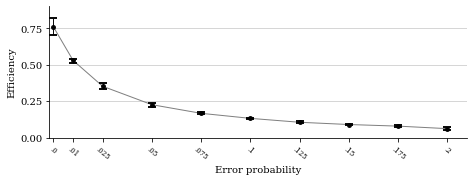

In [68]:
fig_width = 6.688 
fig_height = 2.5
fig, ax = plt.subplots(figsize=(fig_width, fig_height))

ax.grid(True, alpha=0.25)
# ax.legend(loc="best", fontsize=8, ncol=3)
ax.set_yticks(np.arange(0, 1.1, 0.25))
ax.set_ylim(-0.0, 0.9)
ax.get_yaxis().tick_left() 
ax.get_xaxis().tick_bottom() 
ax.set_xlim(-0.002, 0.21)
ax.set_xticks(error_vals)
ax.set_xticklabels(error_vals_ax, fontsize=7, rotation=320)

ax.set_ylabel("Efficiency", fontsize=10)
ax.set_xlabel('Error probability', fontsize=10)

ax.plot(error_vals, mistakes_efficiency_means, color="grey", linewidth=1)

ax.errorbar(error_vals, mistakes_efficiency_means,
            yerr=[mistakes_efficiency_lower, mistakes_efficiency_upper], 
            marker="o", color="black", alpha=0.95, markersize=3, 
            linewidth=1, linestyle="None", label="Efficiency", capsize=4)

ax.xaxis.grid(False)
ax.yaxis.grid(True, alpha=0.2)

plt.tight_layout()
plt.subplots_adjust(hspace = 0.0)
plt.subplots_adjust(top=0.99)
path = figure_directory + "fig_11_mistakes.pdf"
plt.savefig(path)

### Color version

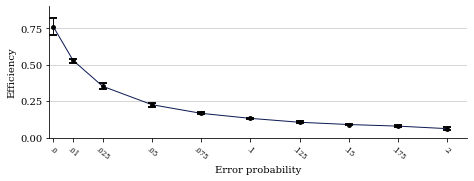

In [69]:
fig_width = 6.688 
fig_height = 2.5
fig, ax = plt.subplots(figsize=(fig_width, fig_height))

ax.grid(True, alpha=0.25)
# ax.legend(loc="best", fontsize=8, ncol=3)
ax.set_yticks(np.arange(0, 1.1, 0.25))
ax.set_ylim(-0.0, 0.9)
ax.get_yaxis().tick_left() 
ax.get_xaxis().tick_bottom() 
ax.set_xlim(-0.002, 0.21)
ax.set_xticks(error_vals)
ax.set_xticklabels(error_vals_ax, fontsize=7, rotation=320)

ax.set_ylabel("Efficiency", fontsize=10)
ax.set_xlabel('Error probability', fontsize=10)

ax.plot(error_vals, mistakes_efficiency_means, color="#0e1c53", linewidth=1)

ax.errorbar(error_vals, mistakes_efficiency_means,
            yerr=[mistakes_efficiency_lower, mistakes_efficiency_upper], 
            marker="o", color="black", alpha=0.95, markersize=3, 
            linewidth=1, linestyle="None", label="Efficiency", capsize=4)

ax.xaxis.grid(False)
ax.yaxis.grid(True, alpha=0.2)

plt.tight_layout()
plt.subplots_adjust(hspace = 0.0)
plt.subplots_adjust(top=0.99)
path = figure_directory_color + "fig_11_mistakes.pdf"
plt.savefig(path)

# Appendix
## A1 and A2: Baseline dynamics
### Prepare data

In [70]:
baseline_data = pd.read_feather("output/hawala_baseline/hawala_baseline_agg.feather")

In [71]:
baseline_data_t0_c0 = baseline_data[(baseline_data["c_trust"]==0.0) & (baseline_data["c_control_1"]==0.0)]
baseline_data_t1_c0 = baseline_data[(baseline_data["c_trust"]==1.0) & (baseline_data["c_control_1"]==0.0)]
baseline_data_t0_c1 = baseline_data[(baseline_data["c_trust"]==0.0) & (baseline_data["c_control_1"]==1.0)]
baseline_data_t1_c1 = baseline_data[(baseline_data["c_trust"]==1.0) & (baseline_data["c_control_1"]==1.0)]

In [72]:
baseline_data_t1_c1.head(2)

,t,n_hawalas,n_places,int_pp,int_ph,p_gossip_rej,p_cheat_rej,lag_gossip,selec_perc,ranking_methods,selection_method,payoff_a,payoff_b,payoff_c,payoff_d,tshock,cshock,tshock_value,cshock_value,shock,trust_control,c_trust,d_trust,c_control_1,c_control_2,d_control_1,d_control_2,n_c_mean,n_c_sd,n_c_low,n_c_high,n_c_mid,n_d_mean,n_d_sd,n_d_low,n_d_high,n_d_mid,sh_d_mean,sh_d_sd,sh_d_low,sh_d_high,sh_d_mid,sh_c_mean,sh_c_sd,sh_c_low,sh_c_high,sh_c_mid,sh_c_top_mean,sh_c_top_sd,sh_c_top_low,sh_c_top_high,sh_c_top_mid,sh_c_low_mean,sh_c_low_sd,sh_c_low_low,sh_c_low_high,sh_c_low_mid,sh_d_top_mean,sh_d_top_sd,sh_d_top_low,sh_d_top_high,sh_d_top_mid,sh_d_low_mean,sh_d_low_sd,sh_d_low_low,sh_d_low_high,sh_d_low_mid,tr_fail_mean,tr_fail_sd,tr_fail_low,tr_fail_high,tr_fail_mid,tr_fail_sh_mean,tr_fail_sh_sd,tr_fail_sh_low,tr_fail_sh_high,tr_fail_sh_mid,tr_rejct_mean,tr_rejct_sd,tr_rejct_low,tr_rejct_high,tr_rejct_mid,tr_rlzd_mean,tr_rlzd_sd,tr_rlzd_low,tr_rlzd_high,tr_rlzd_mid,tr_rlzd_sh_mean,tr_rlzd_sh_sd,tr_rlzd_sh_low,tr_rlzd_sh_high,tr_rlzd_sh_mid,tr_coops_mean,tr_coops_sd,tr_coops_low,tr_coops_high,tr_coops_mid,tr_explts_mean,tr_explts_sd,tr_explts_low,tr_explts_high,tr_explts_mid,tr_defcts_mean,tr_defcts_sd,tr_defcts_low,tr_defcts_high,tr_defcts_mid,int_strgr_mean,int_strgr_sd,int_strgr_low,int_strgr_high,int_strgr_mid,int_prtnr_mean,int_prtnr_sd,int_prtnr_low,int_prtnr_high,int_prtnr_mid,int_coprts_mean,int_coprts_sd,int_coprts_low,int_coprts_high,int_coprts_mid,int_dfctrs_mean,int_dfctrs_sd,int_dfctrs_low,int_dfctrs_high,int_dfctrs_mid,pp_int_c_mean,pp_int_c_sd,pp_int_c_low,pp_int_c_high,pp_int_c_mid,pp_int_d_mean,pp_int_d_sd,pp_int_d_low,pp_int_d_high,pp_int_d_mid,eff_temp_mean,eff_temp_sd,eff_temp_low,eff_temp_high,eff_temp_mid,eff_ovrl_mean,eff_ovrl_sd,eff_ovrl_low,eff_ovrl_high,eff_ovrl_mid
1502,0,100,25,100,10,1.0,1.0,-10,0.15,last_wealth_sum,replication_top_ten,4.0,8.0,0.0,-2.0,no,no,0,0,No shock,"Initial trust: 1.0, initial control: 1.0",1.0,1.0,1.0,1.0,1.0,1.0,75.0,0.000000,75.0,75.0,75,25.0,0.000000,25.0,25.0,25,0.250,0.000000,0.250,0.250,0.25,0.750,0.000000,0.750,0.750,0.75,0.750000,0.000000,0.75,0.750000,0.75,0.750000,0.000000,0.75,0.75,0.750000,0.250000,0.000000,0.250000,0.25,0.25,0.250000,0.000000,0.25,0.25,0.250000,0.0,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.000000,0.0,0.0,0,0.0,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.000000,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.00000,0.000000,0.000,0.00,0.000000,0.00000,0.000,0.000000,0.00,0.0,0.000000,0.0,0.0,0,0.0,0.000000,0.0,0.0,0,0.00000,0.000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000,0.0000,0.0000,0.0000,0.000000,0.000,0.0000,0.0000
1503,1,100,25,100,10,1.0,1.0,-10,0.15,last_wealth_sum,replication_top_ten,4.0,8.0,0.0,-2.0,no,no,0,0,No shock,"Initial trust: 1.0, initial control: 1.0",1.0,1.0,1.0,1.0,1.0,1.0,65.4,4.615192,61.2,69.8,65,34.6,4.615192,30.2,38.8,35,0.346,0.046152,0.302,0.388,0.35,0.654,0.046152,0.612,0.698,0.65,0.173333,0.111555,0.08,0.266667,0.20,0.853333,0.165999,0.72,1.00,0.866667,0.826667,0.111555,0.733333,0.92,0.80,0.146667,0.165999,0.00,0.28,0.133333,0.4,0.547723,0.0,1.0,0.0,0.004,0.005477,0.0,0.01,0.0,1.6,1.516575,0.0,3.0,2,99.6,0.547723,99.0,100.0,100.0,0.996,0.005477,0.99,1.0,1.0,0.534162,0.07103,0.49,0.579273,0.535354,0.411657,0.053434,0.376,0.444485,0.414141,0.054182,0.020645,0.036242,0.074,0.050505,0.979919,0.01594,0.965838,0.994,0.98,0.020081,0.01594,0.006,0.034162,0.02,147.4,8.905055,141.6,153.4,147,51.8,9.038805,45.4,58.4,51,2.25622,0.082,2.202174,2.31732,2.253521,1.494105,0.129732,1.391724,1.633065,1.421053,0.8395,0.031593,0.817,0.8625,0.8375,0.8395,0.031593,0.817,0.8625,0.8375


In [73]:
x_values = np.array(baseline_data_t0_c0["t"])

In [74]:
cooperators_means = {
    "t0c0": np.array(baseline_data_t0_c0["sh_c_mean"]),
    "t1c0": np.array(baseline_data_t1_c0["sh_c_mean"]),
    "t0c1": np.array(baseline_data_t0_c1["sh_c_mean"]),
    "t1c1": np.array(baseline_data_t1_c1["sh_c_mean"])
}

cooperators_lower = {
    "t0c0": np.array(baseline_data_t0_c0["sh_c_mean"])-np.array(baseline_data_t0_c0["sh_c_low"]),
    "t1c0": np.array(baseline_data_t1_c0["sh_c_mean"])-np.array(baseline_data_t1_c0["sh_c_low"]),
    "t0c1": np.array(baseline_data_t0_c1["sh_c_mean"])-np.array(baseline_data_t0_c1["sh_c_low"]),
    "t1c1": np.array(baseline_data_t1_c1["sh_c_mean"])-np.array(baseline_data_t1_c1["sh_c_low"])
}

cooperators_upper = {
    "t0c0": np.array(baseline_data_t0_c0["sh_c_high"])-np.array(baseline_data_t0_c0["sh_c_mean"]),
    "t1c0": np.array(baseline_data_t1_c0["sh_c_high"])-np.array(baseline_data_t1_c0["sh_c_mean"]),
    "t0c1": np.array(baseline_data_t0_c1["sh_c_high"])-np.array(baseline_data_t0_c1["sh_c_mean"]),
    "t1c1": np.array(baseline_data_t1_c1["sh_c_high"])-np.array(baseline_data_t1_c1["sh_c_mean"])
}


In [75]:
cooperations_means = {
    "t0c0": np.array(baseline_data_t0_c0["tr_coops_mean"]),
    "t1c0": np.array(baseline_data_t1_c0["tr_coops_mean"]),
    "t0c1": np.array(baseline_data_t0_c1["tr_coops_mean"]),
    "t1c1": np.array(baseline_data_t1_c1["tr_coops_mean"])
}

cooperations_lower = {
    "t0c0": np.array(baseline_data_t0_c0["tr_coops_mean"])-np.array(baseline_data_t0_c0["tr_coops_low"]),
    "t1c0": np.array(baseline_data_t1_c0["tr_coops_mean"])-np.array(baseline_data_t1_c0["tr_coops_low"]),
    "t0c1": np.array(baseline_data_t0_c1["tr_coops_mean"])-np.array(baseline_data_t0_c1["tr_coops_low"]),
    "t1c1": np.array(baseline_data_t1_c1["tr_coops_mean"])-np.array(baseline_data_t1_c1["tr_coops_low"])
}

cooperations_upper = {
    "t0c0": np.array(baseline_data_t0_c0["tr_coops_high"])-np.array(baseline_data_t0_c0["tr_coops_mean"]),
    "t1c0": np.array(baseline_data_t1_c0["tr_coops_high"])-np.array(baseline_data_t1_c0["tr_coops_mean"]),
    "t0c1": np.array(baseline_data_t0_c1["tr_coops_high"])-np.array(baseline_data_t0_c1["tr_coops_mean"]),
    "t1c1": np.array(baseline_data_t1_c1["tr_coops_high"])-np.array(baseline_data_t1_c1["tr_coops_mean"])
}


In [76]:
defections_means = {
    "t0c0": np.array(baseline_data_t0_c0["tr_defcts_mean"]),
    "t1c0": np.array(baseline_data_t1_c0["tr_defcts_mean"]),
    "t0c1": np.array(baseline_data_t0_c1["tr_defcts_mean"]),
    "t1c1": np.array(baseline_data_t1_c1["tr_defcts_mean"])
}

defections_lower = {
    "t0c0": np.array(baseline_data_t0_c0["tr_defcts_mean"])-np.array(baseline_data_t0_c0["tr_defcts_low"]),
    "t1c0": np.array(baseline_data_t1_c0["tr_defcts_mean"])-np.array(baseline_data_t1_c0["tr_defcts_low"]),
    "t0c1": np.array(baseline_data_t0_c1["tr_defcts_mean"])-np.array(baseline_data_t0_c1["tr_defcts_low"]),
    "t1c1": np.array(baseline_data_t1_c1["tr_defcts_mean"])-np.array(baseline_data_t1_c1["tr_defcts_low"])
}

defections_upper = {
    "t0c0": np.array(baseline_data_t0_c0["tr_defcts_high"])-np.array(baseline_data_t0_c0["tr_defcts_mean"]),
    "t1c0": np.array(baseline_data_t1_c0["tr_defcts_high"])-np.array(baseline_data_t1_c0["tr_defcts_mean"]),
    "t0c1": np.array(baseline_data_t0_c1["tr_defcts_high"])-np.array(baseline_data_t0_c1["tr_defcts_mean"]),
    "t1c1": np.array(baseline_data_t1_c1["tr_defcts_high"])-np.array(baseline_data_t1_c1["tr_defcts_mean"])
}

In [77]:
exploitations_means = {
    "t0c0": np.array(baseline_data_t0_c0["tr_explts_mean"]),
    "t1c0": np.array(baseline_data_t1_c0["tr_explts_mean"]),
    "t0c1": np.array(baseline_data_t0_c1["tr_explts_mean"]),
    "t1c1": np.array(baseline_data_t1_c1["tr_explts_mean"])
}

exploitations_lower = {
    "t0c0": np.array(baseline_data_t0_c0["tr_explts_mean"])-np.array(baseline_data_t0_c0["tr_explts_low"]),
    "t1c0": np.array(baseline_data_t1_c0["tr_explts_mean"])-np.array(baseline_data_t1_c0["tr_explts_low"]),
    "t0c1": np.array(baseline_data_t0_c1["tr_explts_mean"])-np.array(baseline_data_t0_c1["tr_explts_low"]),
    "t1c1": np.array(baseline_data_t1_c1["tr_explts_mean"])-np.array(baseline_data_t1_c1["tr_explts_low"])
}

exploitations_upper = {
    "t0c0": np.array(baseline_data_t0_c0["tr_explts_high"])-np.array(baseline_data_t0_c0["tr_explts_mean"]),
    "t1c0": np.array(baseline_data_t1_c0["tr_explts_high"])-np.array(baseline_data_t1_c0["tr_explts_mean"]),
    "t0c1": np.array(baseline_data_t0_c1["tr_explts_high"])-np.array(baseline_data_t0_c1["tr_explts_mean"]),
    "t1c1": np.array(baseline_data_t1_c1["tr_explts_high"])-np.array(baseline_data_t1_c1["tr_explts_mean"])
}

In [78]:
realized_means = {
    "t0c0": np.array(baseline_data_t0_c0["tr_rlzd_sh_mean"]),
    "t1c0": np.array(baseline_data_t1_c0["tr_rlzd_sh_mean"]),
    "t0c1": np.array(baseline_data_t0_c1["tr_rlzd_sh_mean"]),
    "t1c1": np.array(baseline_data_t1_c1["tr_rlzd_sh_mean"])
}

realized_lower = {
    "t0c0": np.array(baseline_data_t0_c0["tr_rlzd_sh_mean"])-np.array(baseline_data_t0_c0["tr_rlzd_sh_low"]),
    "t1c0": np.array(baseline_data_t1_c0["tr_rlzd_sh_mean"])-np.array(baseline_data_t1_c0["tr_rlzd_sh_low"]),
    "t0c1": np.array(baseline_data_t0_c1["tr_rlzd_sh_mean"])-np.array(baseline_data_t0_c1["tr_rlzd_sh_low"]),
    "t1c1": np.array(baseline_data_t1_c1["tr_rlzd_sh_mean"])-np.array(baseline_data_t1_c1["tr_rlzd_sh_low"])
}

realized_upper = {
    "t0c0": np.array(baseline_data_t0_c0["tr_rlzd_sh_high"])-np.array(baseline_data_t0_c0["tr_rlzd_sh_mean"]),
    "t1c0": np.array(baseline_data_t1_c0["tr_rlzd_sh_high"])-np.array(baseline_data_t1_c0["tr_rlzd_sh_mean"]),
    "t0c1": np.array(baseline_data_t0_c1["tr_rlzd_sh_high"])-np.array(baseline_data_t0_c1["tr_rlzd_sh_mean"]),
    "t1c1": np.array(baseline_data_t1_c1["tr_rlzd_sh_high"])-np.array(baseline_data_t1_c1["tr_rlzd_sh_mean"])
}


In [79]:
efficiency_means = {
    "t0c0": np.array(baseline_data_t0_c0["eff_ovrl_mean"]),
    "t1c0": np.array(baseline_data_t1_c0["eff_ovrl_mean"]),
    "t0c1": np.array(baseline_data_t0_c1["eff_ovrl_mean"]),
    "t1c1": np.array(baseline_data_t1_c1["eff_ovrl_mean"])
}

efficiency_lower = {
    "t0c0": np.array(baseline_data_t0_c0["eff_ovrl_mean"])-np.array(baseline_data_t0_c0["eff_ovrl_low"]),
    "t1c0": np.array(baseline_data_t1_c0["eff_ovrl_mean"])-np.array(baseline_data_t1_c0["eff_ovrl_low"]),
    "t0c1": np.array(baseline_data_t0_c1["eff_ovrl_mean"])-np.array(baseline_data_t0_c1["eff_ovrl_low"]),
    "t1c1": np.array(baseline_data_t1_c1["eff_ovrl_mean"])-np.array(baseline_data_t1_c1["eff_ovrl_low"])
}

efficiency_upper = {
    "t0c0": np.array(baseline_data_t0_c0["eff_ovrl_high"])-np.array(baseline_data_t0_c0["eff_ovrl_mean"]),
    "t1c0": np.array(baseline_data_t1_c0["eff_ovrl_high"])-np.array(baseline_data_t1_c0["eff_ovrl_mean"]),
    "t0c1": np.array(baseline_data_t0_c1["eff_ovrl_high"])-np.array(baseline_data_t0_c1["eff_ovrl_mean"]),
    "t1c1": np.array(baseline_data_t1_c1["eff_ovrl_high"])-np.array(baseline_data_t1_c1["eff_ovrl_mean"])
}


### Make figure A1

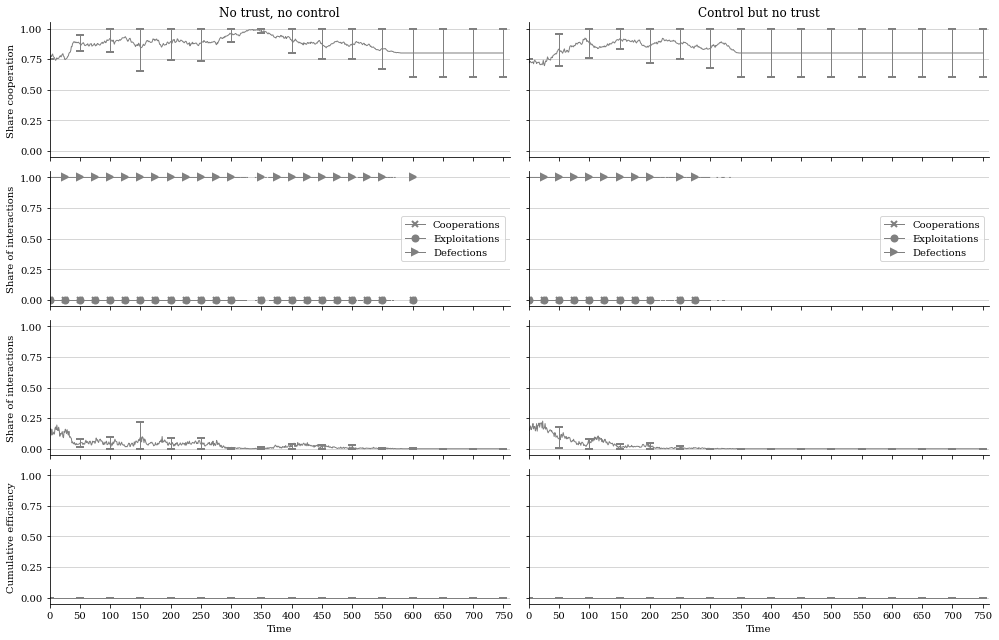

In [80]:
time_axis = range(0, 750)

fig, axes = plt.subplots(4, 2, figsize=(14, 9), sharex=True, sharey=True)

axes[0, 0].set_title("No trust, no control", fontsize=12)
axes[0, 1].set_title("Control but no trust", fontsize=12)

key_used = "t0c0"
col_used = 0
axes[0, col_used].plot(x_values, cooperators_means[key_used], color="grey", linewidth=1)
axes[0, col_used].errorbar(
    x_values[::50], cooperators_means[key_used][::50], color="grey", linewidth=1,
    yerr=[cooperators_lower[key_used][::50], cooperators_upper[key_used][::50]], 
    linestyle="None", capsize=4)

axes[1, col_used].plot(x_values, cooperations_means[key_used], 
                       color="grey", marker="x", markevery=25, linewidth=1, label="Cooperations")
axes[1, col_used].errorbar(x_values[::50], cooperations_means[key_used][::50], color="grey", linewidth=1,
                    yerr=[cooperations_lower[key_used][::50], cooperations_upper[key_used][::50]], 
                    linestyle="None", capsize=4)

axes[1, col_used].plot(x_values, exploitations_means[key_used], 
                       color="grey", marker="o", markevery=25, linewidth=1, label="Exploitations")
axes[1, col_used].errorbar(x_values[::50], exploitations_means[key_used][::50], color="grey", linewidth=1,
                    yerr=[exploitations_lower[key_used][::50], exploitations_upper[key_used][::50]], 
                    linestyle="None", capsize=4)

axes[1, col_used].plot(x_values, defections_means[key_used], 
                       color="grey", marker=">", markevery=25, linewidth=1, label="Defections")
axes[1, col_used].errorbar(x_values[::50], defections_means[key_used][::50], color="grey", linewidth=1,
                    yerr=[defections_lower[key_used][::50], defections_upper[key_used][::50]], 
                    linestyle="None", capsize=4)
axes[1, col_used].legend(loc=5)

axes[2, col_used].plot(x_values, realized_means[key_used], color="grey", linewidth=1)
axes[2, col_used].errorbar(
    x_values[::50], realized_means[key_used][::50], color="grey", linewidth=1,
    yerr=[realized_lower[key_used][::50], realized_upper[key_used][::50]], 
    linestyle="None", capsize=4)

axes[3, col_used].plot(x_values, efficiency_means[key_used], color="grey", linewidth=1)
axes[3, col_used].errorbar(
    x_values[::50], efficiency_means[key_used][::50], color="grey", linewidth=1,
    yerr=[efficiency_lower[key_used][::50], efficiency_upper[key_used][::50]], 
    linestyle="None", capsize=4)


key_used = "t0c1"
col_used = 1
axes[0, col_used].plot(x_values, cooperators_means[key_used], color="grey", linewidth=1)
axes[0, col_used].errorbar(
    x_values[::50], cooperators_means[key_used][::50], color="grey", linewidth=1,
    yerr=[cooperators_lower[key_used][::50], cooperators_upper[key_used][::50]], 
    linestyle="None", capsize=4)

axes[1, col_used].plot(x_values, cooperations_means[key_used], 
                       color="grey", marker="x", markevery=25, linewidth=1, label="Cooperations")
axes[1, col_used].errorbar(x_values[::50], cooperations_means[key_used][::50], color="grey", linewidth=1,
                    yerr=[cooperations_lower[key_used][::50], cooperations_upper[key_used][::50]], 
                    linestyle="None", capsize=4)

axes[1, col_used].plot(x_values, exploitations_means[key_used], 
                       color="grey", marker="o", markevery=25, linewidth=1, label="Exploitations")
axes[1, col_used].errorbar(x_values[::50], exploitations_means[key_used][::50], color="grey", linewidth=1,
                    yerr=[exploitations_lower[key_used][::50], exploitations_upper[key_used][::50]], 
                    linestyle="None", capsize=4)

axes[1, col_used].plot(x_values, defections_means[key_used], 
                       color="grey", marker=">", markevery=25, linewidth=1, label="Defections")
axes[1, col_used].errorbar(x_values[::50], defections_means[key_used][::50], color="grey", linewidth=1,
                    yerr=[defections_lower[key_used][::50], defections_upper[key_used][::50]], 
                    linestyle="None", capsize=4)
axes[1, col_used].legend(loc=5)

axes[2, col_used].plot(x_values, realized_means[key_used], color="grey", linewidth=1)
axes[2, col_used].errorbar(
    x_values[::50], realized_means[key_used][::50], color="grey", linewidth=1,
    yerr=[realized_lower[key_used][::50], realized_upper[key_used][::50]], 
    linestyle="None", capsize=4)

axes[3, col_used].plot(x_values, efficiency_means[key_used], color="grey", linewidth=1)
axes[3, col_used].errorbar(
    x_values[::50], efficiency_means[key_used][::50], color="grey", linewidth=1,
    yerr=[efficiency_lower[key_used][::50], efficiency_upper[key_used][::50]], 
    linestyle="None", capsize=4)


for i in range(2):
    axes[3, i].set_xlabel("Time")
axes[0, 0].set_ylabel("Share cooperation")
axes[1, 0].set_ylabel("Share of interactions")
axes[2, 0].set_ylabel("Share of interactions")
axes[3, 0].set_ylabel("Cumulative efficiency")

for j in range(2):
    for i in range(4):
        axes[i,j].set_xlim(0,760)
        axes[i,j].set_xticks(np.arange(0,800,50))
        axes[i,j].set_ylim(-0.05,1.05)
        axes[i,j].set_yticks(np.arange(0, 1.1, 0.25))
        axes[i,j].xaxis.grid(False)
        axes[i,j].yaxis.grid(True, alpha=0.2)

        
plt.subplots_adjust(top=0.92)
plt.tight_layout()
path = figure_directory + "fig_A1_dynamics-baseline_1.pdf"
plt.savefig(path)

### Color version

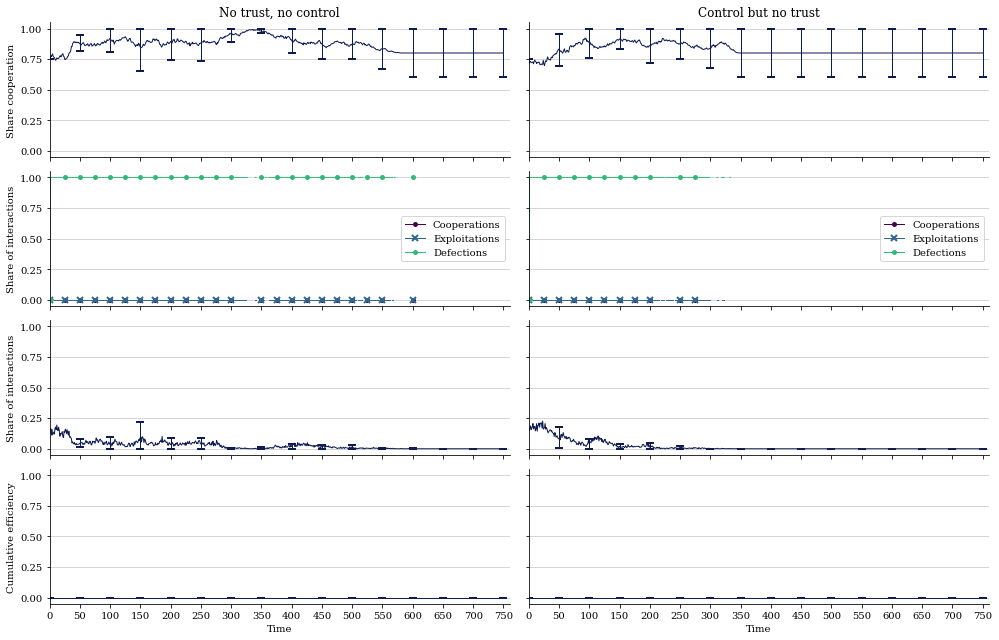

In [81]:
single_line_color = "#0e1c53"
viridis3 = cm.get_cmap('viridis', 4)

time_axis = range(0, 750)

fig, axes = plt.subplots(4, 2, figsize=(14, 9), sharex=True, sharey=True)

axes[0, 0].set_title("No trust, no control", fontsize=12)
axes[0, 1].set_title("Control but no trust", fontsize=12)

key_used = "t0c0"
col_used = 0
axes[0, col_used].plot(x_values, cooperators_means[key_used], color=single_line_color, linewidth=1)
axes[0, col_used].errorbar(
    x_values[::50], cooperators_means[key_used][::50], color=single_line_color, linewidth=1,
    yerr=[cooperators_lower[key_used][::50], cooperators_upper[key_used][::50]], 
    linestyle="None", capsize=4)

axes[1, col_used].plot(x_values, cooperations_means[key_used], 
                       color=viridis3.colors[0], marker=".", markevery=25, linewidth=1, label="Cooperations")
axes[1, col_used].errorbar(x_values[::50], cooperations_means[key_used][::50], color=viridis3.colors[0], linewidth=1,
                    yerr=[cooperations_lower[key_used][::50], cooperations_upper[key_used][::50]], 
                    linestyle="None", capsize=4)

axes[1, col_used].plot(x_values, exploitations_means[key_used], 
                       color=viridis3.colors[1], marker="x", markevery=25, linewidth=1, label="Exploitations")
axes[1, col_used].errorbar(x_values[::50], exploitations_means[key_used][::50], color=viridis3.colors[2], linewidth=1,
                    yerr=[exploitations_lower[key_used][::50], exploitations_upper[key_used][::50]], 
                    linestyle="None", capsize=4)

axes[1, col_used].plot(x_values, defections_means[key_used], 
                       color=viridis3.colors[2], marker=".", markevery=25, linewidth=1, label="Defections")
axes[1, col_used].errorbar(x_values[::50], defections_means[key_used][::50], color=viridis3.colors[2], linewidth=1,
                    yerr=[defections_lower[key_used][::50], defections_upper[key_used][::50]], 
                    linestyle="None", capsize=4)
axes[1, col_used].legend(loc=5)

axes[2, col_used].plot(x_values, realized_means[key_used], color=single_line_color, linewidth=1)
axes[2, col_used].errorbar(
    x_values[::50], realized_means[key_used][::50], color=single_line_color, linewidth=1,
    yerr=[realized_lower[key_used][::50], realized_upper[key_used][::50]], 
    linestyle="None", capsize=4)

axes[3, col_used].plot(x_values, efficiency_means[key_used], color=single_line_color, linewidth=1)
axes[3, col_used].errorbar(
    x_values[::50], efficiency_means[key_used][::50], color=single_line_color, linewidth=1,
    yerr=[efficiency_lower[key_used][::50], efficiency_upper[key_used][::50]], 
    linestyle="None", capsize=4)


key_used = "t0c1"
col_used = 1
axes[0, col_used].plot(x_values, cooperators_means[key_used], color=single_line_color, linewidth=1)
axes[0, col_used].errorbar(
    x_values[::50], cooperators_means[key_used][::50], color=single_line_color, linewidth=1,
    yerr=[cooperators_lower[key_used][::50], cooperators_upper[key_used][::50]], 
    linestyle="None", capsize=4)

axes[1, col_used].plot(x_values, cooperations_means[key_used], 
                       color=viridis3.colors[0], marker=".", markevery=25, linewidth=1, label="Cooperations")
axes[1, col_used].errorbar(x_values[::50], cooperations_means[key_used][::50], color=viridis3.colors[0], linewidth=1,
                    yerr=[cooperations_lower[key_used][::50], cooperations_upper[key_used][::50]], 
                    linestyle="None", capsize=4)

axes[1, col_used].plot(x_values, exploitations_means[key_used], 
                       color=viridis3.colors[1], marker="x", markevery=25, linewidth=1, label="Exploitations")
axes[1, col_used].errorbar(x_values[::50], exploitations_means[key_used][::50], color=viridis3.colors[2], linewidth=1,
                    yerr=[exploitations_lower[key_used][::50], exploitations_upper[key_used][::50]], 
                    linestyle="None", capsize=4)

axes[1, col_used].plot(x_values, defections_means[key_used], 
                       color=viridis3.colors[2], marker=".", markevery=25, linewidth=1, label="Defections")
axes[1, col_used].errorbar(x_values[::50], defections_means[key_used][::50], color=viridis3.colors[2], linewidth=1,
                    yerr=[defections_lower[key_used][::50], defections_upper[key_used][::50]], 
                    linestyle="None", capsize=4)
axes[1, col_used].legend(loc=5)

axes[2, col_used].plot(x_values, realized_means[key_used], color=single_line_color, linewidth=1)
axes[2, col_used].errorbar(
    x_values[::50], realized_means[key_used][::50], color=single_line_color, linewidth=1,
    yerr=[realized_lower[key_used][::50], realized_upper[key_used][::50]], 
    linestyle="None", capsize=4)

axes[3, col_used].plot(x_values, efficiency_means[key_used], color=single_line_color, linewidth=1)
axes[3, col_used].errorbar(
    x_values[::50], efficiency_means[key_used][::50], color=single_line_color, linewidth=1,
    yerr=[efficiency_lower[key_used][::50], efficiency_upper[key_used][::50]], 
    linestyle="None", capsize=4)


for i in range(2):
    axes[3, i].set_xlabel("Time")
axes[0, 0].set_ylabel("Share cooperation")
axes[1, 0].set_ylabel("Share of interactions")
axes[2, 0].set_ylabel("Share of interactions")
axes[3, 0].set_ylabel("Cumulative efficiency")

for j in range(2):
    for i in range(4):
        axes[i,j].set_xlim(0,760)
        axes[i,j].set_xticks(np.arange(0,800,50))
        axes[i,j].set_ylim(-0.05,1.05)
        axes[i,j].set_yticks(np.arange(0, 1.1, 0.25))
        axes[i,j].xaxis.grid(False)
        axes[i,j].yaxis.grid(True, alpha=0.2)

        
plt.subplots_adjust(top=0.92)
plt.tight_layout()
path = figure_directory_color + "fig_A1_dynamics-baseline_1.pdf"
plt.savefig(path)

### Make figure A2

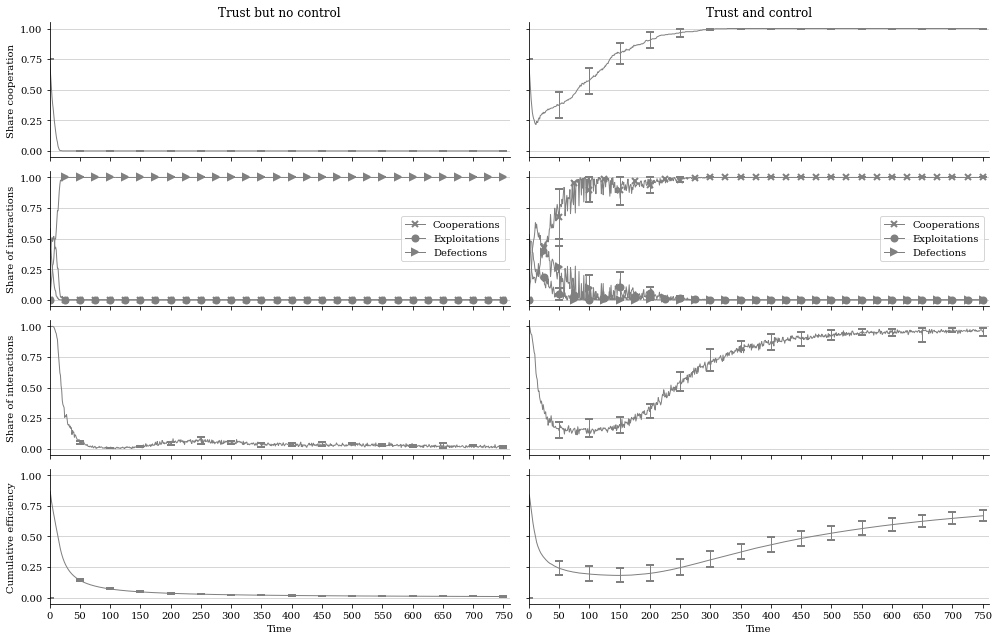

In [82]:
time_axis = range(0, 750)

fig, axes = plt.subplots(4, 2, figsize=(14, 9), sharex=True, sharey=True)

axes[0, 1].set_title("Trust and control", fontsize=12)
axes[0, 0].set_title("Trust but no control", fontsize=12)

key_used = "t1c0"
col_used = 0
axes[0, col_used].plot(x_values, cooperators_means[key_used], color="grey", linewidth=1)
axes[0, col_used].errorbar(
    x_values[::50], cooperators_means[key_used][::50], color="grey", linewidth=1,
    yerr=[cooperators_lower[key_used][::50], cooperators_upper[key_used][::50]], 
    linestyle="None", capsize=4)

axes[1, col_used].plot(x_values, cooperations_means[key_used], 
                       color="grey", marker="x", markevery=25, linewidth=1, label="Cooperations")
axes[1, col_used].errorbar(x_values[::50], cooperations_means[key_used][::50], color="grey", linewidth=1,
                    yerr=[cooperations_lower[key_used][::50], cooperations_upper[key_used][::50]], 
                    linestyle="None", capsize=4)

axes[1, col_used].plot(x_values, exploitations_means[key_used], 
                       color="grey", marker="o", markevery=25, linewidth=1, label="Exploitations")
axes[1, col_used].errorbar(x_values[::50], exploitations_means[key_used][::50], color="grey", linewidth=1,
                    yerr=[exploitations_lower[key_used][::50], exploitations_upper[key_used][::50]], 
                    linestyle="None", capsize=4)

axes[1, col_used].plot(x_values, defections_means[key_used], 
                       color="grey", marker=">", markevery=25, linewidth=1, label="Defections")
axes[1, col_used].errorbar(x_values[::50], defections_means[key_used][::50], color="grey", linewidth=1,
                    yerr=[defections_lower[key_used][::50], defections_upper[key_used][::50]], 
                    linestyle="None", capsize=4)
axes[1, col_used].legend(loc=5)

axes[2, col_used].plot(x_values, realized_means[key_used], color="grey", linewidth=1)
axes[2, col_used].errorbar(
    x_values[::50], realized_means[key_used][::50], color="grey", linewidth=1,
    yerr=[realized_lower[key_used][::50], realized_upper[key_used][::50]], 
    linestyle="None", capsize=4)

axes[3, col_used].plot(x_values, efficiency_means[key_used], color="grey", linewidth=1)
axes[3, col_used].errorbar(
    x_values[::50], efficiency_means[key_used][::50], color="grey", linewidth=1,
    yerr=[efficiency_lower[key_used][::50], efficiency_upper[key_used][::50]], 
    linestyle="None", capsize=4)


key_used = "t1c1"
col_used = 1
axes[0, col_used].plot(x_values, cooperators_means[key_used], color="grey", linewidth=1)
axes[0, col_used].errorbar(
    x_values[::50], cooperators_means[key_used][::50], color="grey", linewidth=1,
    yerr=[cooperators_lower[key_used][::50], cooperators_upper[key_used][::50]], 
    linestyle="None", capsize=4)

axes[1, col_used].plot(x_values, cooperations_means[key_used], 
                       color="grey", marker="x", markevery=25, linewidth=1, label="Cooperations")
axes[1, col_used].errorbar(x_values[::50], cooperations_means[key_used][::50], color="grey", linewidth=1,
                    yerr=[cooperations_lower[key_used][::50], cooperations_upper[key_used][::50]], 
                    linestyle="None", capsize=4)

axes[1, col_used].plot(x_values, exploitations_means[key_used], 
                       color="grey", marker="o", markevery=25, linewidth=1, label="Exploitations")
axes[1, col_used].errorbar(x_values[::50], exploitations_means[key_used][::50], color="grey", linewidth=1,
                    yerr=[exploitations_lower[key_used][::50], exploitations_upper[key_used][::50]], 
                    linestyle="None", capsize=4)

axes[1, col_used].plot(x_values, defections_means[key_used], 
                       color="grey", marker=">", markevery=25, linewidth=1, label="Defections")
axes[1, col_used].errorbar(x_values[::50], defections_means[key_used][::50], color="grey", linewidth=1,
                    yerr=[defections_lower[key_used][::50], defections_upper[key_used][::50]], 
                    linestyle="None", capsize=4)
axes[1, col_used].legend(loc=5)

axes[2, col_used].plot(x_values, realized_means[key_used], color="grey", linewidth=1)
axes[2, col_used].errorbar(
    x_values[::50], realized_means[key_used][::50], color="grey", linewidth=1,
    yerr=[realized_lower[key_used][::50], realized_upper[key_used][::50]], 
    linestyle="None", capsize=4)

axes[3, col_used].plot(x_values, efficiency_means[key_used], color="grey", linewidth=1)
axes[3, col_used].errorbar(
    x_values[::50], efficiency_means[key_used][::50], color="grey", linewidth=1,
    yerr=[efficiency_lower[key_used][::50], efficiency_upper[key_used][::50]], 
    linestyle="None", capsize=4)


for i in range(2):
    axes[3, i].set_xlabel("Time")
axes[0, 0].set_ylabel("Share cooperation")
axes[1, 0].set_ylabel("Share of interactions")
axes[2, 0].set_ylabel("Share of interactions")
axes[3, 0].set_ylabel("Cumulative efficiency")

for j in range(2):
    for i in range(4):
        axes[i,j].set_xlim(0,760)
        axes[i,j].set_xticks(np.arange(0,800,50))
        axes[i,j].set_ylim(-0.05,1.05)
        axes[i,j].set_yticks(np.arange(0, 1.1, 0.25))
        axes[i,j].xaxis.grid(False)
        axes[i,j].yaxis.grid(True, alpha=0.2)

        
plt.subplots_adjust(top=0.92)
plt.tight_layout()
path = figure_directory + "fig_A2_dynamics-baseline_2.pdf"
plt.savefig(path)

### Color version

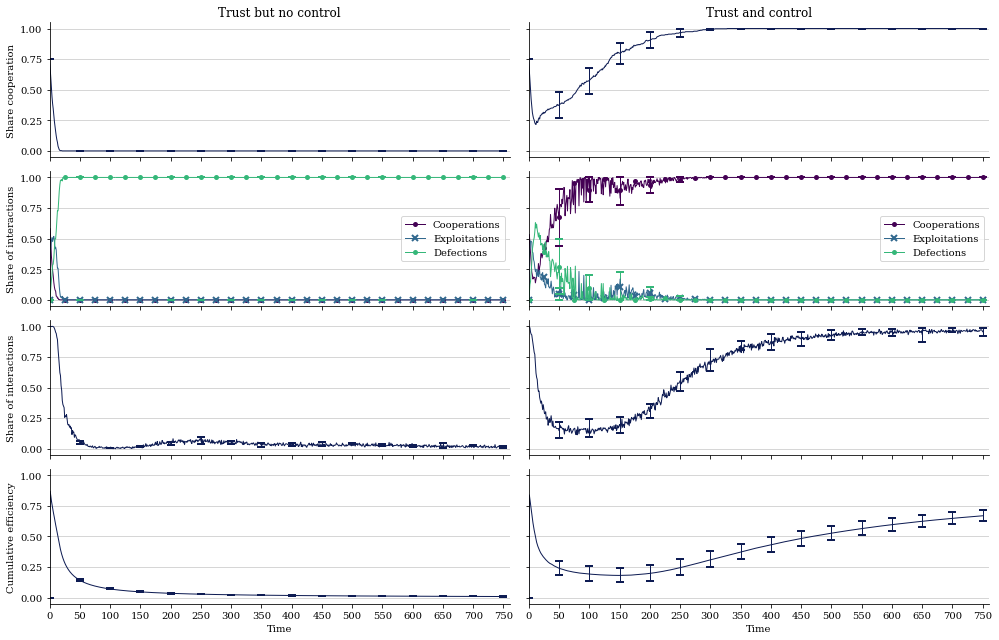

In [83]:
time_axis = range(0, 750)

fig, axes = plt.subplots(4, 2, figsize=(14, 9), sharex=True, sharey=True)

axes[0, 1].set_title("Trust and control", fontsize=12)
axes[0, 0].set_title("Trust but no control", fontsize=12)

key_used = "t1c0"
col_used = 0
axes[0, col_used].plot(x_values, cooperators_means[key_used], color=single_line_color, linewidth=1)
axes[0, col_used].errorbar(
    x_values[::50], cooperators_means[key_used][::50], color=single_line_color, linewidth=1,
    yerr=[cooperators_lower[key_used][::50], cooperators_upper[key_used][::50]], 
    linestyle="None", capsize=4)

axes[1, col_used].plot(x_values, cooperations_means[key_used], 
                       color=viridis3.colors[0], marker=".", markevery=25, linewidth=1, label="Cooperations")
axes[1, col_used].errorbar(x_values[::50], cooperations_means[key_used][::50], color=viridis3.colors[0], linewidth=1,
                    yerr=[cooperations_lower[key_used][::50], cooperations_upper[key_used][::50]], 
                    linestyle="None", capsize=4)

axes[1, col_used].plot(x_values, exploitations_means[key_used], 
                       color=viridis3.colors[1], marker="x", markevery=25, linewidth=1, label="Exploitations")
axes[1, col_used].errorbar(x_values[::50], exploitations_means[key_used][::50], color=viridis3.colors[2], linewidth=1,
                    yerr=[exploitations_lower[key_used][::50], exploitations_upper[key_used][::50]], 
                    linestyle="None", capsize=4)

axes[1, col_used].plot(x_values, defections_means[key_used], 
                       color=viridis3.colors[2], marker=".", markevery=25, linewidth=1, label="Defections")
axes[1, col_used].errorbar(x_values[::50], defections_means[key_used][::50], color=viridis3.colors[2], linewidth=1,
                    yerr=[defections_lower[key_used][::50], defections_upper[key_used][::50]], 
                    linestyle="None", capsize=4)
axes[1, col_used].legend(loc=5)

axes[2, col_used].plot(x_values, realized_means[key_used], color=single_line_color, linewidth=1)
axes[2, col_used].errorbar(
    x_values[::50], realized_means[key_used][::50], color=single_line_color, linewidth=1,
    yerr=[realized_lower[key_used][::50], realized_upper[key_used][::50]], 
    linestyle="None", capsize=4)

axes[3, col_used].plot(x_values, efficiency_means[key_used], color=single_line_color, linewidth=1)
axes[3, col_used].errorbar(
    x_values[::50], efficiency_means[key_used][::50], color=single_line_color, linewidth=1,
    yerr=[efficiency_lower[key_used][::50], efficiency_upper[key_used][::50]], 
    linestyle="None", capsize=4)


key_used = "t1c1"
col_used = 1
axes[0, col_used].plot(x_values, cooperators_means[key_used], color=single_line_color, linewidth=1)
axes[0, col_used].errorbar(
    x_values[::50], cooperators_means[key_used][::50], color=single_line_color, linewidth=1,
    yerr=[cooperators_lower[key_used][::50], cooperators_upper[key_used][::50]], 
    linestyle="None", capsize=4)

axes[1, col_used].plot(x_values, cooperations_means[key_used], 
                       color=viridis3.colors[0], marker=".", markevery=25, linewidth=1, label="Cooperations")
axes[1, col_used].errorbar(x_values[::50], cooperations_means[key_used][::50], color=viridis3.colors[0], linewidth=1,
                    yerr=[cooperations_lower[key_used][::50], cooperations_upper[key_used][::50]], 
                    linestyle="None", capsize=4)

axes[1, col_used].plot(x_values, exploitations_means[key_used], 
                       color=viridis3.colors[1], marker="x", markevery=25, linewidth=1, label="Exploitations")
axes[1, col_used].errorbar(x_values[::50], exploitations_means[key_used][::50], color=viridis3.colors[2], linewidth=1,
                    yerr=[exploitations_lower[key_used][::50], exploitations_upper[key_used][::50]], 
                    linestyle="None", capsize=4)

axes[1, col_used].plot(x_values, defections_means[key_used], 
                       color=viridis3.colors[2], marker=".", markevery=25, linewidth=1, label="Defections")
axes[1, col_used].errorbar(x_values[::50], defections_means[key_used][::50], color=viridis3.colors[2], linewidth=1,
                    yerr=[defections_lower[key_used][::50], defections_upper[key_used][::50]], 
                    linestyle="None", capsize=4)
axes[1, col_used].legend(loc=5)

axes[2, col_used].plot(x_values, realized_means[key_used], color=single_line_color, linewidth=1)
axes[2, col_used].errorbar(
    x_values[::50], realized_means[key_used][::50], color=single_line_color, linewidth=1,
    yerr=[realized_lower[key_used][::50], realized_upper[key_used][::50]], 
    linestyle="None", capsize=4)

axes[3, col_used].plot(x_values, efficiency_means[key_used], color=single_line_color, linewidth=1)
axes[3, col_used].errorbar(
    x_values[::50], efficiency_means[key_used][::50], color=single_line_color, linewidth=1,
    yerr=[efficiency_lower[key_used][::50], efficiency_upper[key_used][::50]], 
    linestyle="None", capsize=4)


for i in range(2):
    axes[3, i].set_xlabel("Time")
axes[0, 0].set_ylabel("Share cooperation")
axes[1, 0].set_ylabel("Share of interactions")
axes[2, 0].set_ylabel("Share of interactions")
axes[3, 0].set_ylabel("Cumulative efficiency")

for j in range(2):
    for i in range(4):
        axes[i,j].set_xlim(0,760)
        axes[i,j].set_xticks(np.arange(0,800,50))
        axes[i,j].set_ylim(-0.05,1.05)
        axes[i,j].set_yticks(np.arange(0, 1.1, 0.25))
        axes[i,j].xaxis.grid(False)
        axes[i,j].yaxis.grid(True, alpha=0.2)

        
plt.subplots_adjust(top=0.92)
plt.tight_layout()
path = figure_directory_color + "fig_A2_dynamics-baseline_2.pdf"
plt.savefig(path)

## A3: Shock dynamics

In [84]:
shock_dynamics_data = pd.read_feather("output/hawala_shocks_/hawala_shocks__agg.feather")
shock_dynamics_data.head(2)

,t,n_hawalas,n_places,int_pp,int_ph,p_gossip_rej,p_cheat_rej,lag_gossip,selec_perc,ranking_methods,selection_method,payoff_a,payoff_b,payoff_c,payoff_d,tshock,cshock,tshock_value,cshock_value,shock,trust_control,c_trust,d_trust,c_control_1,c_control_2,d_control_1,d_control_2,n_c_mean,n_c_sd,n_c_low,n_c_high,n_c_mid,n_d_mean,n_d_sd,n_d_low,n_d_high,n_d_mid,sh_d_mean,sh_d_sd,sh_d_low,sh_d_high,sh_d_mid,sh_c_mean,sh_c_sd,sh_c_low,sh_c_high,sh_c_mid,sh_c_top_mean,sh_c_top_sd,sh_c_top_low,sh_c_top_high,sh_c_top_mid,sh_c_low_mean,sh_c_low_sd,sh_c_low_low,sh_c_low_high,sh_c_low_mid,sh_d_top_mean,sh_d_top_sd,sh_d_top_low,sh_d_top_high,sh_d_top_mid,sh_d_low_mean,sh_d_low_sd,sh_d_low_low,sh_d_low_high,sh_d_low_mid,tr_fail_mean,tr_fail_sd,tr_fail_low,tr_fail_high,tr_fail_mid,tr_fail_sh_mean,tr_fail_sh_sd,tr_fail_sh_low,tr_fail_sh_high,tr_fail_sh_mid,tr_rejct_mean,tr_rejct_sd,tr_rejct_low,tr_rejct_high,tr_rejct_mid,tr_rlzd_mean,tr_rlzd_sd,tr_rlzd_low,tr_rlzd_high,tr_rlzd_mid,tr_rlzd_sh_mean,tr_rlzd_sh_sd,tr_rlzd_sh_low,tr_rlzd_sh_high,tr_rlzd_sh_mid,tr_coops_mean,tr_coops_sd,tr_coops_low,tr_coops_high,tr_coops_mid,tr_explts_mean,tr_explts_sd,tr_explts_low,tr_explts_high,tr_explts_mid,tr_defcts_mean,tr_defcts_sd,tr_defcts_low,tr_defcts_high,tr_defcts_mid,int_strgr_mean,int_strgr_sd,int_strgr_low,int_strgr_high,int_strgr_mid,int_prtnr_mean,int_prtnr_sd,int_prtnr_low,int_prtnr_high,int_prtnr_mid,int_coprts_mean,int_coprts_sd,int_coprts_low,int_coprts_high,int_coprts_mid,int_dfctrs_mean,int_dfctrs_sd,int_dfctrs_low,int_dfctrs_high,int_dfctrs_mid,pp_int_c_mean,pp_int_c_sd,pp_int_c_low,pp_int_c_high,pp_int_c_mid,pp_int_d_mean,pp_int_d_sd,pp_int_d_low,pp_int_d_high,pp_int_d_mid,eff_temp_mean,eff_temp_sd,eff_temp_low,eff_temp_high,eff_temp_mid,eff_ovrl_mean,eff_ovrl_sd,eff_ovrl_low,eff_ovrl_high,eff_ovrl_mid
0,0,100,25,100,10,1.0,1.0,-10,0.15,last_wealth_sum,replication_top_ten,4.0,8.0,0.0,-2.0,25,no,0.0,0.0,Trust: in t=25 to 0.0 Control: in t=no to 0.0,"Initial trust: 1.0, initial control: 1.0",1.0,1.0,1.0,1.0,1.0,1.0,75.0,0.000000,75.00,75.00,75.0,25.0,0.000000,25.00,25.00,25.0,0.250,0.000000,0.2500,0.2500,0.250,0.750,0.000000,0.7500,0.7500,0.750,0.75,0.000000,0.750000,0.750000,0.750000,0.750000,0.000000,0.750000,0.750000,0.75,0.25,0.000000,0.250000,0.250000,0.250000,0.250000,0.000000,0.250000,0.250000,0.25,0.0,0.000000,0.0,0.00,0.0,0.000,0.000000,0.0,0.0000,0.00,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,0.000,0.000000,0.0000,0.0,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00,0.00,0.0,0.0,0.000000,0.00,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000
1,1,100,25,100,10,1.0,1.0,-10,0.15,last_wealth_sum,replication_top_ten,4.0,8.0,0.0,-2.0,25,no,0.0,0.0,Trust: in t=25 to 0.0 Control: in t=no to 0.0,"Initial trust: 1.0, initial control: 1.0",1.0,1.0,1.0,1.0,1.0,1.0,67.6,3.977716,64.35,71.95,66.5,32.4,3.977716,28.05,35.65,33.5,0.324,0.039777,0.2805,0.3565,0.335,0.676,0.039777,0.6435,0.7195,0.665,0.30,0.090267,0.266667,0.376667,0.266667,0.806667,0.073367,0.733333,0.866667,0.80,0.70,0.090267,0.623333,0.733333,0.733333,0.193333,0.073367,0.133333,0.266667,0.20,0.9,0.994429,0.0,1.65,1.0,0.009,0.009944,0.0,0.0165,0.01,4.3,2.110819,2.0,6.0,5.0,99.1,0.994429,98.35,100.0,99.0,0.991,0.009944,0.9835,1.0,0.99,0.584332,0.024353,0.562776,0.609091,0.59,0.362209,0.028692,0.334702,0.389061,0.361818,0.05346,0.027195,0.023631,0.077,0.060303,0.980806,0.007486,0.973087,0.989965,0.979899,0.019194,0.007486,0.010035,0.026913,0.020101,151.7,4.164666,147.75,154.95,152.5,46.5,4.403282,43.35,49.65,45.5,2.250663,0.139897,2.159677,2.396719,2.180461,1.449842,0.178105,1.2525,1.642255,1.498316,0.84825,0.023454,0.824375,0.872375,0.84875,0.84825,0.023454

In [85]:
no_shock_dynamics_data = shock_dynamics_data[shock_dynamics_data["shock"]=="No shock"]
t1_shock_dynamics_data = shock_dynamics_data[shock_dynamics_data["shock"]=="Trust: in t=1 to 0.0 Control: in t=no to 0.0"]
t50_shock_dynamics_data = shock_dynamics_data[shock_dynamics_data["shock"]=="Trust: in t=50 to 0.0 Control: in t=no to 0.0"]
t300_shock_dynamics_data = shock_dynamics_data[shock_dynamics_data["shock"]=="Trust: in t=300 to 0.0 Control: in t=no to 0.0"]
c1_shock_dynamics_data = shock_dynamics_data[shock_dynamics_data["shock"]=="Trust: in t=no to 0.0 Control: in t=1 to 0.0"]
c50_shock_dynamics_data = shock_dynamics_data[shock_dynamics_data["shock"]=="Trust: in t=no to 0.0 Control: in t=50 to 0.0"]
c300_shock_dynamics_data = shock_dynamics_data[shock_dynamics_data["shock"]=="Trust: in t=no to 0.0 Control: in t=300 to 0.0"]
ct1_shock_dynamics_data = shock_dynamics_data[shock_dynamics_data["shock"]=="Trust: in t=1 to 0.0 Control: in t=1 to 0.0"]
ct50_shock_dynamics_data = shock_dynamics_data[shock_dynamics_data["shock"]=="Trust: in t=50 to 0.0 Control: in t=50 to 0.0"]
ct300_shock_dynamics_data = shock_dynamics_data[shock_dynamics_data["shock"]=="Trust: in t=300 to 0.0 Control: in t=300 to 0.0"]


In [86]:
cases_indices = ["None", "1", "50", "300"]
cases_color = ["red", "blue", "green", "black"]
cases_color = ["black", "#595959", "#b3b3b3", "#8c8c8c"]
cases_type = ["--","-","--","-"]
cases_marker = ["+", "x", "o", "*"]
cases_marker = ["x", "x", "x", "x"]

In [87]:
frames = {
    "no": no_shock_dynamics_data[0:501],
    "t1": t1_shock_dynamics_data,
    "t50": t50_shock_dynamics_data,
    "t300": t300_shock_dynamics_data,
    "c1": c1_shock_dynamics_data,
    "c50": c50_shock_dynamics_data,
    "c300": c300_shock_dynamics_data,
    "ct1": ct1_shock_dynamics_data,
    "ct50": ct50_shock_dynamics_data,
    "ct300": ct300_shock_dynamics_data
}

cases_lower_whiskers = {
    "no": frames["no"]["tr_rlzd_sh_mean"][:500][::50] - frames["no"]["tr_rlzd_sh_low"][:500][::50],
    "t1": frames["t1"]["tr_rlzd_sh_mean"][:500][::50] - frames["t1"]["tr_rlzd_sh_low"][:500][::50],
    "t50": frames["t50"]["tr_rlzd_sh_mean"][:500][::50] - frames["t50"]["tr_rlzd_sh_low"][:500][::50],
    "t300": frames["t300"]["tr_rlzd_sh_mean"][:500][::50] - frames["t300"]["tr_rlzd_sh_low"][:500][::50],
    "c1": frames["c1"]["tr_rlzd_sh_mean"][:500][::50] - frames["c1"]["tr_rlzd_sh_low"][:500][::50],
    "c50": frames["c50"]["tr_rlzd_sh_mean"][:500][::50] - frames["c50"]["tr_rlzd_sh_low"][:500][::50],
    "c300": frames["c300"]["tr_rlzd_sh_mean"][:500][::50] - frames["c300"]["tr_rlzd_sh_low"][:500][::50],
    "ct1": frames["ct1"]["tr_rlzd_sh_mean"][:500][::50] - frames["ct1"]["tr_rlzd_sh_low"][:500][::50],
    "ct50": frames["ct50"]["tr_rlzd_sh_mean"][:500][::50] - frames["ct50"]["tr_rlzd_sh_low"][:500][::50],
    "ct300": frames["ct300"]["tr_rlzd_sh_mean"][:500][::50] - frames["ct300"]["tr_rlzd_sh_low"][:500][::50]
}

cases_upper_whiskers = {
    "no": frames["no"]["tr_rlzd_sh_high"][:500][::50] - frames["no"]["tr_rlzd_sh_mean"][:500][::50],
    "t1": frames["t1"]["tr_rlzd_sh_high"][:500][::50] - frames["t1"]["tr_rlzd_sh_mean"][:500][::50],
    "t50": frames["t50"]["tr_rlzd_sh_high"][:500][::50] - frames["t50"]["tr_rlzd_sh_mean"][:500][::50],
    "t300": frames["t300"]["tr_rlzd_sh_high"][:500][::50] - frames["t300"]["tr_rlzd_sh_mean"][:500][::50],
    "c1": frames["c1"]["tr_rlzd_sh_high"][:500][::50] - frames["c1"]["tr_rlzd_sh_mean"][:500][::50],
    "c50": frames["c50"]["tr_rlzd_sh_high"][:500][::50] - frames["c50"]["tr_rlzd_sh_mean"][:500][::50],
    "c300": frames["c300"]["tr_rlzd_sh_high"][:500][::50] - frames["c300"]["tr_rlzd_sh_mean"][:500][::50],
    "ct1": frames["ct1"]["tr_rlzd_sh_high"][:500][::50] - frames["ct1"]["tr_rlzd_sh_mean"][:500][::50],
    "ct50": frames["ct50"]["tr_rlzd_sh_high"][:500][::50] - frames["ct50"]["tr_rlzd_sh_mean"][:500][::50],
    "ct300": frames["ct300"]["tr_rlzd_sh_high"][:500][::50] - frames["ct300"]["tr_rlzd_sh_mean"][:500][::50]
}

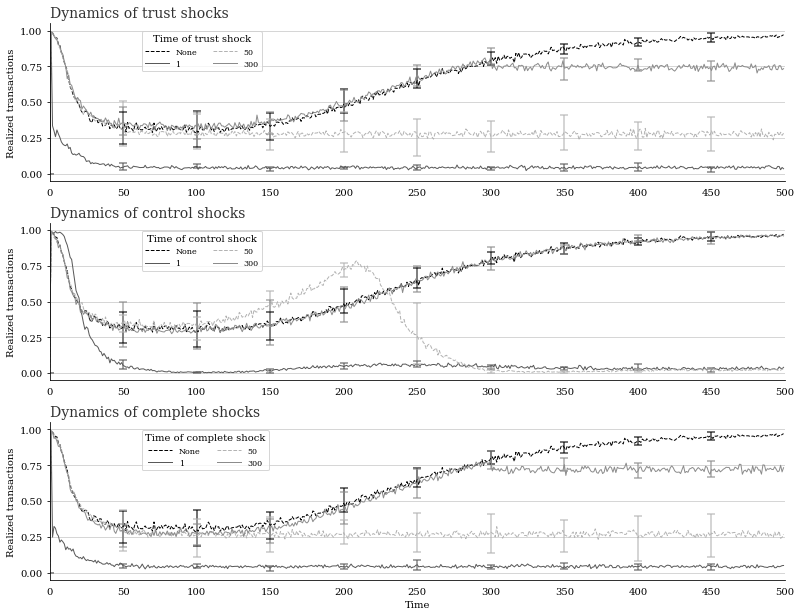

In [88]:
cases_t = ["no", "t1", "t50", "t300"]
cases_c = ["no", "c1", "c50", "c300"]
cases_ct = ["no", "ct1", "ct50", "ct300"]

fig_width = 6.688 * 1.68

fig_height = 9.0 

fig, axes = plt.subplots(3,1, figsize=(fig_width, fig_height))

axes[0].set_title('Dynamics of trust shocks', fontsize=14, alpha=0.8, ha='left', loc='left')
axes[1].set_title('Dynamics of control shocks', fontsize=14, alpha=0.8, ha='left', loc='left')
axes[2].set_title('Dynamics of complete shocks', fontsize=14, alpha=0.8, ha='left', loc='left')


for x in range(len(cases_t)):
    axes[0].errorbar(range(500)[::50], 
                     frames[cases_t[x]]["tr_rlzd_sh_mean"][:500][::50], 
                     yerr=[cases_lower_whiskers[cases_t[x]], cases_upper_whiskers[cases_t[x]]], 
                     color=cases_color[x], label=None, linestyle="None", marker="None", 
                     linewidth=2, alpha=0.55, capsize=4)
    axes[0].plot(range(500), 
                 frames[cases_t[x]]["tr_rlzd_sh_mean"][:500], 
                 label=cases_indices[x], linestyle=cases_type[x], color=cases_color[x], 
                 marker="None", linewidth=1, alpha=1.0)
    axes[1].errorbar(range(500)[::50], 
                     frames[cases_c[x]]["tr_rlzd_sh_mean"][:500][::50], 
                     yerr=[cases_lower_whiskers[cases_c[x]], cases_upper_whiskers[cases_c[x]]], 
                     color=cases_color[x], label=None, linestyle="None", marker="None", 
                     linewidth=2, alpha=0.55, capsize=4)
    axes[1].plot(range(500), 
                 frames[cases_c[x]]["tr_rlzd_sh_mean"][:500], 
                 label=cases_indices[x], linestyle=cases_type[x], color=cases_color[x], 
                 marker="None", markevery=50, linewidth=1, alpha=1.0)
    
    axes[2].errorbar(range(500)[::50], 
                     frames[cases_ct[x]]["tr_rlzd_sh_mean"][:500][::50], 
                     yerr=[cases_lower_whiskers[cases_ct[x]], cases_upper_whiskers[cases_ct[x]]], 
                     color=cases_color[x], label=None, linestyle="None", marker="None", 
                     linewidth=2, alpha=0.55, capsize=4)
    axes[2].plot(range(500), 
                 frames[cases_ct[x]]["tr_rlzd_sh_mean"][:500], 
                 label=cases_indices[x], linestyle=cases_type[x], color=cases_color[x], 
                 marker="None", markevery=50, linewidth=1, alpha=1.0)


legendtitles = ["Time of trust shock", "Time of control shock", "Time of complete shock"]

for x in range(3):
    axes[x].set_ylim(-0.05, 1.05)
    axes[x].set_yticks(np.arange(0, 1.1, 0.25))
    axes[x].set_ylabel('Realized transactions')
    
    axes[x].set_xlim(10, 500)
    axes[x].set_xticks(np.arange(0, 550, 50))
    

    axes[x].grid(False)
    axes[x].yaxis.grid(True, alpha=0.2)
    axes[x].legend(loc=2,  ncol=2, frameon=True, 
                   handlelength=3.0, handleheight=1.0, 
                   title=legendtitles[x], fontsize=8,
                   bbox_to_anchor=(0.12, 0.975))
    axes[x].get_legend().get_title().set_fontsize('10')    
    axes[x].get_yaxis().tick_left()   
    axes[x].xaxis.set_ticks_position('none') 
axes[2].set_xlabel('Time')
plt.tight_layout()
plt.subplots_adjust(top=0.92)


path = figure_directory + "fig_A3_shock-dynamics.pdf"
plt.savefig(path)
mpl.rcParams['lines.linewidth'] = 3
mpl.rcParams['lines.markeredgewidth'] = 2

### Color version

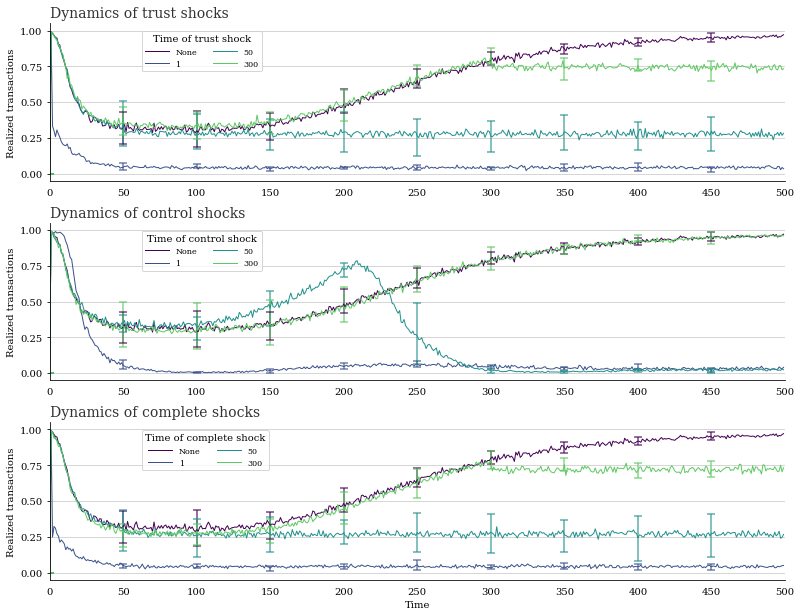

In [89]:
viridis = cm.get_cmap('viridis', 5)

cases_color = viridis.colors[0:4]
cases_type = ["-","-","-","-"]
cases_t = ["no", "t1", "t50", "t300"]
cases_c = ["no", "c1", "c50", "c300"]

cases_t = ["no", "t1", "t50", "t300"]
cases_c = ["no", "c1", "c50", "c300"]
cases_ct = ["no", "ct1", "ct50", "ct300"]

fig_width = 6.688 * 1.68

fig_height = 9.0 

fig, axes = plt.subplots(3,1, figsize=(fig_width, fig_height))

axes[0].set_title('Dynamics of trust shocks', fontsize=14, alpha=0.8, ha='left', loc='left')
axes[1].set_title('Dynamics of control shocks', fontsize=14, alpha=0.8, ha='left', loc='left')
axes[2].set_title('Dynamics of complete shocks', fontsize=14, alpha=0.8, ha='left', loc='left')


for x in range(len(cases_t)):
    axes[0].errorbar(range(500)[::50], 
                     frames[cases_t[x]]["tr_rlzd_sh_mean"][:500][::50], 
                     yerr=[cases_lower_whiskers[cases_t[x]], cases_upper_whiskers[cases_t[x]]], 
                     color=cases_color[x], label=None, linestyle="None", marker="None", 
                     linewidth=2, alpha=0.55, capsize=4)
    axes[0].plot(range(500), 
                 frames[cases_t[x]]["tr_rlzd_sh_mean"][:500], 
                 label=cases_indices[x], linestyle=cases_type[x], color=cases_color[x], 
                 marker="None", linewidth=1, alpha=1.0)
    axes[1].errorbar(range(500)[::50], 
                     frames[cases_c[x]]["tr_rlzd_sh_mean"][:500][::50], 
                     yerr=[cases_lower_whiskers[cases_c[x]], cases_upper_whiskers[cases_c[x]]], 
                     color=cases_color[x], label=None, linestyle="None", marker="None", 
                     linewidth=2, alpha=0.55, capsize=4)
    axes[1].plot(range(500), 
                 frames[cases_c[x]]["tr_rlzd_sh_mean"][:500], 
                 label=cases_indices[x], linestyle=cases_type[x], color=cases_color[x], 
                 marker="None", markevery=50, linewidth=1, alpha=1.0)
    
    axes[2].errorbar(range(500)[::50], 
                     frames[cases_ct[x]]["tr_rlzd_sh_mean"][:500][::50], 
                     yerr=[cases_lower_whiskers[cases_ct[x]], cases_upper_whiskers[cases_ct[x]]], 
                     color=cases_color[x], label=None, linestyle="None", marker="None", 
                     linewidth=2, alpha=0.55, capsize=4)
    axes[2].plot(range(500), 
                 frames[cases_ct[x]]["tr_rlzd_sh_mean"][:500], 
                 label=cases_indices[x], linestyle=cases_type[x], color=cases_color[x], 
                 marker="None", markevery=50, linewidth=1, alpha=1.0)


legendtitles = ["Time of trust shock", "Time of control shock", "Time of complete shock"]

for x in range(3):
    axes[x].set_ylim(-0.05, 1.05)
    axes[x].set_yticks(np.arange(0, 1.1, 0.25))
    axes[x].set_ylabel('Realized transactions')
    
    axes[x].set_xlim(10, 500)
    axes[x].set_xticks(np.arange(0, 550, 50))
    

    axes[x].grid(False)
    axes[x].yaxis.grid(True, alpha=0.2)
    axes[x].legend(loc=2,  ncol=2, frameon=True, 
                   handlelength=3.0, handleheight=1.0, 
                   title=legendtitles[x], fontsize=8,
                   bbox_to_anchor=(0.12, 0.975))
    axes[x].get_legend().get_title().set_fontsize('10')    
    axes[x].get_yaxis().tick_left()   
    axes[x].xaxis.set_ticks_position('none') 
axes[2].set_xlabel('Time')
plt.tight_layout()
plt.subplots_adjust(top=0.92)


path = figure_directory_color + "fig_A3_shock-dynamics.pdf"
plt.savefig(path)
mpl.rcParams['lines.linewidth'] = 3
mpl.rcParams['lines.markeredgewidth'] = 2

## Figure A4: Final results of shocks

### Prepare data

In [90]:
shock_no_realized_final_mean = [
    float(frames["no"][frames["no"]["t"]==500]["tr_rlzd_sh_mean"]),
    float(frames["no"][frames["no"]["t"]==500]["tr_rlzd_sh_mean"]),
    float(frames["no"][frames["no"]["t"]==500]["tr_rlzd_sh_mean"])
]

shock_1_realized_final_mean = [
    float(frames["c1"][frames["c1"]["t"]==500]["tr_rlzd_sh_mean"]),
    float(frames["t1"][frames["t1"]["t"]==500]["tr_rlzd_sh_mean"]),
    float(frames["ct1"][frames["ct1"]["t"]==500]["tr_rlzd_sh_mean"])
]

shock_50_realized_final_mean = [
    float(frames["c50"][frames["c50"]["t"]==500]["tr_rlzd_sh_mean"]),
    float(frames["t50"][frames["t50"]["t"]==500]["tr_rlzd_sh_mean"]),
    float(frames["ct50"][frames["ct50"]["t"]==500]["tr_rlzd_sh_mean"])
]

shock_300_realized_final_mean = [
    float(frames["c300"][frames["c300"]["t"]==500]["tr_rlzd_sh_mean"]),
    float(frames["t300"][frames["t300"]["t"]==500]["tr_rlzd_sh_mean"]),
    float(frames["ct300"][frames["ct300"]["t"]==500]["tr_rlzd_sh_mean"])
]
shock_no_realized_final_lower = [
    float(frames["no"][frames["no"]["t"]==500]["tr_rlzd_sh_mean"])-float(frames["no"][frames["no"]["t"]==500]["tr_rlzd_sh_low"]),
    float(frames["no"][frames["no"]["t"]==500]["tr_rlzd_sh_mean"])-float(frames["no"][frames["no"]["t"]==500]["tr_rlzd_sh_low"]),
    float(frames["no"][frames["no"]["t"]==500]["tr_rlzd_sh_mean"])-float(frames["no"][frames["no"]["t"]==500]["tr_rlzd_sh_low"])
]

shock_1_realized_final_lower = [
    float(frames["c1"][frames["c1"]["t"]==500]["tr_rlzd_sh_mean"])-float(frames["c1"][frames["c1"]["t"]==500]["tr_rlzd_sh_low"]),
    float(frames["t1"][frames["t1"]["t"]==500]["tr_rlzd_sh_mean"])-float(frames["t1"][frames["t1"]["t"]==500]["tr_rlzd_sh_low"]),
    float(frames["ct1"][frames["ct1"]["t"]==500]["tr_rlzd_sh_mean"])-float(frames["ct1"][frames["ct1"]["t"]==500]["tr_rlzd_sh_low"])
]

shock_50_realized_final_lower = [
    float(frames["c50"][frames["c50"]["t"]==500]["tr_rlzd_sh_mean"])-float(frames["c50"][frames["c50"]["t"]==500]["tr_rlzd_sh_low"]),
    float(frames["t50"][frames["t50"]["t"]==500]["tr_rlzd_sh_mean"])-float(frames["t50"][frames["t50"]["t"]==500]["tr_rlzd_sh_low"]),
    float(frames["ct50"][frames["ct50"]["t"]==500]["tr_rlzd_sh_mean"])-float(frames["ct50"][frames["ct50"]["t"]==500]["tr_rlzd_sh_low"])
]

shock_300_realized_final_lower = [
    float(frames["c300"][frames["c300"]["t"]==500]["tr_rlzd_sh_mean"])-float(frames["c300"][frames["c300"]["t"]==500]["tr_rlzd_sh_low"]),
    float(frames["t300"][frames["t300"]["t"]==500]["tr_rlzd_sh_mean"])-float(frames["t300"][frames["t300"]["t"]==500]["tr_rlzd_sh_low"]),
    float(frames["ct300"][frames["ct300"]["t"]==500]["tr_rlzd_sh_mean"])-float(frames["ct300"][frames["ct300"]["t"]==500]["tr_rlzd_sh_low"])
]
shock_no_realized_final_upper = [
    float(frames["no"][frames["no"]["t"]==500]["tr_rlzd_sh_high"])-float(frames["no"][frames["no"]["t"]==500]["tr_rlzd_sh_mean"]),
    float(frames["no"][frames["no"]["t"]==500]["tr_rlzd_sh_high"])-float(frames["no"][frames["no"]["t"]==500]["tr_rlzd_sh_mean"]),
    float(frames["no"][frames["no"]["t"]==500]["tr_rlzd_sh_high"])-float(frames["no"][frames["no"]["t"]==500]["tr_rlzd_sh_mean"])
]

shock_1_realized_final_upper = [
    float(frames["c1"][frames["c1"]["t"]==500]["tr_rlzd_sh_high"])-float(frames["c1"][frames["c1"]["t"]==500]["tr_rlzd_sh_mean"]),
    float(frames["t1"][frames["t1"]["t"]==500]["tr_rlzd_sh_high"])-float(frames["t1"][frames["t1"]["t"]==500]["tr_rlzd_sh_mean"]),
    float(frames["ct1"][frames["ct1"]["t"]==500]["tr_rlzd_sh_high"])-float(frames["ct1"][frames["ct1"]["t"]==500]["tr_rlzd_sh_mean"])
]

shock_50_realized_final_upper = [
    float(frames["c50"][frames["c50"]["t"]==500]["tr_rlzd_sh_high"])-float(frames["c50"][frames["c50"]["t"]==500]["tr_rlzd_sh_mean"]),
    float(frames["t50"][frames["t50"]["t"]==500]["tr_rlzd_sh_high"])-float(frames["t50"][frames["t50"]["t"]==500]["tr_rlzd_sh_mean"]),
    float(frames["ct50"][frames["ct50"]["t"]==500]["tr_rlzd_sh_high"])-float(frames["ct50"][frames["ct50"]["t"]==500]["tr_rlzd_sh_mean"])
]

shock_300_realized_final_upper = [
    float(frames["c300"][frames["c300"]["t"]==500]["tr_rlzd_sh_high"])-float(frames["c300"][frames["c300"]["t"]==500]["tr_rlzd_sh_mean"]),
    float(frames["t300"][frames["t300"]["t"]==500]["tr_rlzd_sh_high"])-float(frames["t300"][frames["t300"]["t"]==500]["tr_rlzd_sh_mean"]),
    float(frames["ct300"][frames["ct300"]["t"]==500]["tr_rlzd_sh_high"])-float(frames["ct300"][frames["ct300"]["t"]==500]["tr_rlzd_sh_mean"])
]

In [91]:
shock_no_efficiency_final_mean = [
    float(frames["no"][frames["no"]["t"]==500]["eff_ovrl_mean"]),
    float(frames["no"][frames["no"]["t"]==500]["eff_ovrl_mean"]),
    float(frames["no"][frames["no"]["t"]==500]["eff_ovrl_mean"])
]

shock_1_efficiency_final_mean = [
    float(frames["c1"][frames["c1"]["t"]==500]["eff_ovrl_mean"]),
    float(frames["t1"][frames["t1"]["t"]==500]["eff_ovrl_mean"]),
    float(frames["ct1"][frames["ct1"]["t"]==500]["eff_ovrl_mean"])
]

shock_50_efficiency_final_mean = [
    float(frames["c50"][frames["c50"]["t"]==500]["eff_ovrl_mean"]),
    float(frames["t50"][frames["t50"]["t"]==500]["eff_ovrl_mean"]),
    float(frames["ct50"][frames["ct50"]["t"]==500]["eff_ovrl_mean"])
]

shock_300_efficiency_final_mean = [
    float(frames["c300"][frames["c300"]["t"]==500]["eff_ovrl_mean"]),
    float(frames["t300"][frames["t300"]["t"]==500]["eff_ovrl_mean"]),
    float(frames["ct300"][frames["ct300"]["t"]==500]["eff_ovrl_mean"])
]
shock_no_efficiency_final_lower = [
    float(frames["no"][frames["no"]["t"]==500]["eff_ovrl_mean"])-float(frames["no"][frames["no"]["t"]==500]["eff_ovrl_low"]),
    float(frames["no"][frames["no"]["t"]==500]["eff_ovrl_mean"])-float(frames["no"][frames["no"]["t"]==500]["eff_ovrl_low"]),
    float(frames["no"][frames["no"]["t"]==500]["eff_ovrl_mean"])-float(frames["no"][frames["no"]["t"]==500]["eff_ovrl_low"])
]

shock_1_efficiency_final_lower = [
    float(frames["c1"][frames["c1"]["t"]==500]["eff_ovrl_mean"])-float(frames["c1"][frames["c1"]["t"]==500]["eff_ovrl_low"]),
    float(frames["t1"][frames["t1"]["t"]==500]["eff_ovrl_mean"])-float(frames["t1"][frames["t1"]["t"]==500]["eff_ovrl_low"]),
    float(frames["ct1"][frames["ct1"]["t"]==500]["eff_ovrl_mean"])-float(frames["ct1"][frames["ct1"]["t"]==500]["eff_ovrl_low"])
]

shock_50_efficiency_final_lower = [
    float(frames["c50"][frames["c50"]["t"]==500]["eff_ovrl_mean"])-float(frames["c50"][frames["c50"]["t"]==500]["eff_ovrl_low"]),
    float(frames["t50"][frames["t50"]["t"]==500]["eff_ovrl_mean"])-float(frames["t50"][frames["t50"]["t"]==500]["eff_ovrl_low"]),
    float(frames["ct50"][frames["ct50"]["t"]==500]["eff_ovrl_mean"])-float(frames["ct50"][frames["ct50"]["t"]==500]["eff_ovrl_low"])
]

shock_300_efficiency_final_lower = [
    float(frames["c300"][frames["c300"]["t"]==500]["eff_ovrl_mean"])-float(frames["c300"][frames["c300"]["t"]==500]["eff_ovrl_low"]),
    float(frames["t300"][frames["t300"]["t"]==500]["eff_ovrl_mean"])-float(frames["t300"][frames["t300"]["t"]==500]["eff_ovrl_low"]),
    float(frames["ct300"][frames["ct300"]["t"]==500]["eff_ovrl_mean"])-float(frames["ct300"][frames["ct300"]["t"]==500]["eff_ovrl_low"])
]
shock_no_efficiency_final_upper = [
    float(frames["no"][frames["no"]["t"]==500]["eff_ovrl_high"])-float(frames["no"][frames["no"]["t"]==500]["eff_ovrl_mean"]),
    float(frames["no"][frames["no"]["t"]==500]["eff_ovrl_high"])-float(frames["no"][frames["no"]["t"]==500]["eff_ovrl_mean"]),
    float(frames["no"][frames["no"]["t"]==500]["eff_ovrl_high"])-float(frames["no"][frames["no"]["t"]==500]["eff_ovrl_mean"])
]

shock_1_efficiency_final_upper = [
    float(frames["c1"][frames["c1"]["t"]==500]["eff_ovrl_high"])-float(frames["c1"][frames["c1"]["t"]==500]["eff_ovrl_mean"]),
    float(frames["t1"][frames["t1"]["t"]==500]["eff_ovrl_high"])-float(frames["t1"][frames["t1"]["t"]==500]["eff_ovrl_mean"]),
    float(frames["ct1"][frames["ct1"]["t"]==500]["eff_ovrl_high"])-float(frames["ct1"][frames["ct1"]["t"]==500]["eff_ovrl_mean"])
]

shock_50_efficiency_final_upper = [
    float(frames["c50"][frames["c50"]["t"]==500]["eff_ovrl_high"])-float(frames["c50"][frames["c50"]["t"]==500]["eff_ovrl_mean"]),
    float(frames["t50"][frames["t50"]["t"]==500]["eff_ovrl_high"])-float(frames["t50"][frames["t50"]["t"]==500]["eff_ovrl_mean"]),
    float(frames["ct50"][frames["ct50"]["t"]==500]["eff_ovrl_high"])-float(frames["ct50"][frames["ct50"]["t"]==500]["eff_ovrl_mean"])
]

shock_300_efficiency_final_upper = [
    float(frames["c300"][frames["c300"]["t"]==500]["eff_ovrl_high"])-float(frames["c300"][frames["c300"]["t"]==500]["eff_ovrl_mean"]),
    float(frames["t300"][frames["t300"]["t"]==500]["eff_ovrl_high"])-float(frames["t300"][frames["t300"]["t"]==500]["eff_ovrl_mean"]),
    float(frames["ct300"][frames["ct300"]["t"]==500]["eff_ovrl_high"])-float(frames["ct300"][frames["ct300"]["t"]==500]["eff_ovrl_mean"])
]

### Make the figure for realized transactions

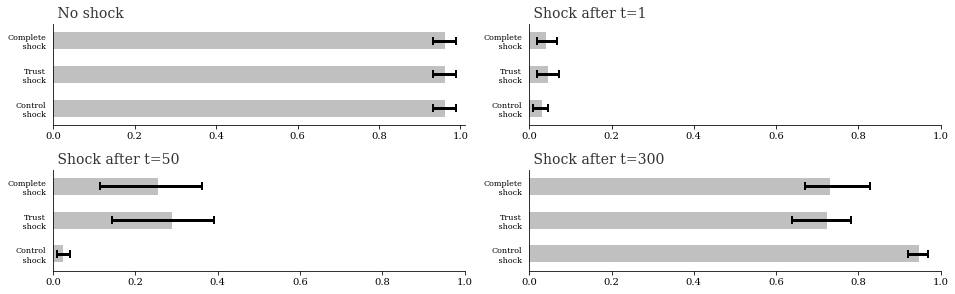

In [92]:
indices = ["Control\n shock", "Trust\n shock", "Complete\n shock"]
width = 0.05
index = np.arange(len(indices))
index = np.arange(0, 1.5, 0.5)
index = np.array([0.2, 0.3, 0.4])

fig_width = 2 * 6.688 
fig_height = fig_width / (1.618*2)
fig, axes = plt.subplots(2,2, figsize=(fig_width, fig_height))

axes[0, 0].set_title(' No shock', fontsize=14, alpha=0.8, ha='left', loc='left')
axes[0, 1].set_title(' Shock after t=1', fontsize=14, alpha=0.8, ha='left', loc='left')
axes[1, 0].set_title(' Shock after t=50', fontsize=14, alpha=0.8, ha='left', loc='left')
axes[1, 1].set_title(' Shock after t=300', fontsize=14, alpha=0.8, ha='left', loc='left')


axes[0, 0].barh(index-0.00*width, shock_no_realized_final_mean, width, 
       alpha=1.0, color="#C0C0C0",
       xerr=[shock_no_realized_final_lower, shock_no_realized_final_upper], capsize=4)

axes[0, 1].barh(index-0.00*width, shock_1_realized_final_mean, width, 
       alpha=1.0, color="#C0C0C0",
       xerr=[shock_1_realized_final_lower, shock_1_realized_final_upper], capsize=4)

axes[1, 0].barh(index-0.00*width, shock_50_realized_final_mean, width, 
       alpha=1.0, color="#C0C0C0",
       xerr=[shock_50_realized_final_lower, shock_50_realized_final_upper], capsize=4)

axes[1, 1].barh(index-0.00*width, shock_300_realized_final_mean, width, 
       alpha=1.0, color="#C0C0C0",
       xerr=[shock_300_realized_final_lower, shock_300_realized_final_upper], capsize=4)

for i in range(2):
    for j in range(2):
        axes[i, j].set_ylim(0.15, 0.45)
        axes[i, j].set_xlim(0.0, 1.0)
        axes[i, j].set_yticks(np.array([0.2, 0.3, 0.4]))
        axes[i, j].set_yticklabels(indices, fontsize=8)#, rotation=330)
        axes[i, j].yaxis.set_ticks_position('none') 

axes[0, 0].set_xlim(-0.00, 1.01)
axes[0, 0].get_xaxis().tick_bottom()  

plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.grid(False)

path = figure_directory + "fig_A4_shocks-final-realized.pdf"
plt.savefig(path)

### Color version

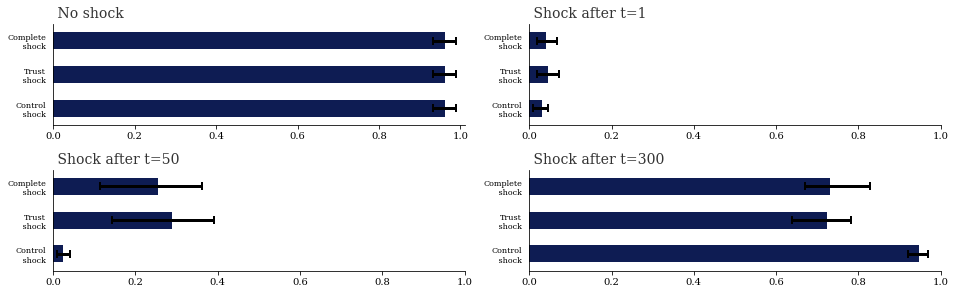

In [93]:
col_used = "#0e1c53"

indices = ["Control\n shock", "Trust\n shock", "Complete\n shock"]
width = 0.05
index = np.arange(len(indices))
index = np.arange(0, 1.5, 0.5)
index = np.array([0.2, 0.3, 0.4])

fig_width = 2 * 6.688 
fig_height = fig_width / (1.618*2)
fig, axes = plt.subplots(2,2, figsize=(fig_width, fig_height))

axes[0, 0].set_title(' No shock', fontsize=14, alpha=0.8, ha='left', loc='left')
axes[0, 1].set_title(' Shock after t=1', fontsize=14, alpha=0.8, ha='left', loc='left')
axes[1, 0].set_title(' Shock after t=50', fontsize=14, alpha=0.8, ha='left', loc='left')
axes[1, 1].set_title(' Shock after t=300', fontsize=14, alpha=0.8, ha='left', loc='left')


axes[0, 0].barh(index-0.00*width, shock_no_realized_final_mean, width, 
       alpha=1.0, color=col_used,
       xerr=[shock_no_realized_final_lower, shock_no_realized_final_upper], capsize=4)

axes[0, 1].barh(index-0.00*width, shock_1_realized_final_mean, width, 
       alpha=1.0, color=col_used,
       xerr=[shock_1_realized_final_lower, shock_1_realized_final_upper], capsize=4)

axes[1, 0].barh(index-0.00*width, shock_50_realized_final_mean, width, 
       alpha=1.0, color=col_used,
       xerr=[shock_50_realized_final_lower, shock_50_realized_final_upper], capsize=4)

axes[1, 1].barh(index-0.00*width, shock_300_realized_final_mean, width, 
       alpha=1.0, color=col_used,
       xerr=[shock_300_realized_final_lower, shock_300_realized_final_upper], capsize=4)

for i in range(2):
    for j in range(2):
        axes[i, j].set_ylim(0.15, 0.45)
        axes[i, j].set_xlim(0.0, 1.0)
        axes[i, j].set_yticks(np.array([0.2, 0.3, 0.4]))
        axes[i, j].set_yticklabels(indices, fontsize=8)#, rotation=330)
        axes[i, j].yaxis.set_ticks_position('none') 

axes[0, 0].set_xlim(-0.00, 1.01)
axes[0, 0].get_xaxis().tick_bottom()  

plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.grid(False)

path = figure_directory_color + "fig_A4_shocks-final-realized.pdf"
plt.savefig(path)

### Make the figure for efficiency

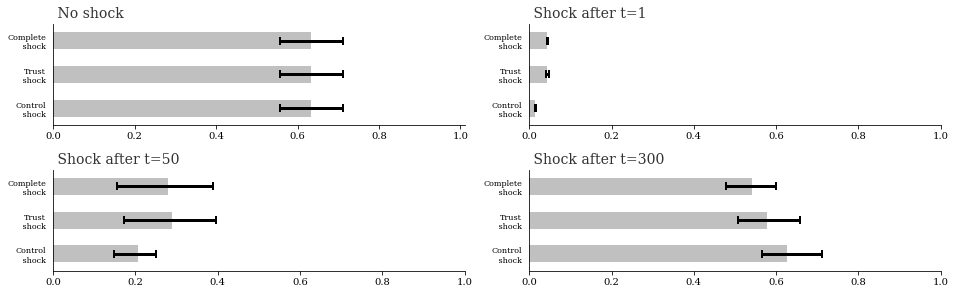

In [94]:
indices = ["Control\n shock", "Trust\n shock", "Complete\n shock"]
width = 0.05
index = np.arange(len(indices))
index = np.arange(0, 1.5, 0.5)
index = np.array([0.2, 0.3, 0.4])

fig_width = 2 * 6.688 
fig_height = fig_width / (1.618*2)
fig, axes = plt.subplots(2,2, figsize=(fig_width, fig_height))

axes[0, 0].set_title(' No shock', fontsize=14, alpha=0.8, ha='left', loc='left')
axes[0, 1].set_title(' Shock after t=1', fontsize=14, alpha=0.8, ha='left', loc='left')
axes[1, 0].set_title(' Shock after t=50', fontsize=14, alpha=0.8, ha='left', loc='left')
axes[1, 1].set_title(' Shock after t=300', fontsize=14, alpha=0.8, ha='left', loc='left')


axes[0, 0].barh(index-0.00*width, shock_no_efficiency_final_mean, width, 
       alpha=1.0, color="#C0C0C0",
       xerr=[shock_no_efficiency_final_lower, shock_no_efficiency_final_upper], capsize=4)

axes[0, 1].barh(index-0.00*width, shock_1_efficiency_final_mean, width, 
       alpha=1.0, color="#C0C0C0",
       xerr=[shock_1_efficiency_final_lower, shock_1_efficiency_final_upper], capsize=4)

axes[1, 0].barh(index-0.00*width, shock_50_efficiency_final_mean, width, 
       alpha=1.0, color="#C0C0C0",
       xerr=[shock_50_efficiency_final_lower, shock_50_efficiency_final_upper], capsize=4)

axes[1, 1].barh(index-0.00*width, shock_300_efficiency_final_mean, width, 
       alpha=1.0, color="#C0C0C0",
       xerr=[shock_300_efficiency_final_lower, shock_300_efficiency_final_upper], capsize=4)

for i in range(2):
    for j in range(2):
        axes[i, j].set_ylim(0.15, 0.45)
        axes[i, j].set_xlim(0.0, 1.0)
        axes[i, j].set_yticks(np.array([0.2, 0.3, 0.4]))
        axes[i, j].set_yticklabels(indices, fontsize=8)#, rotation=330)
        axes[i, j].yaxis.set_ticks_position('none') 

axes[0, 0].set_xlim(-0.00, 1.01)
axes[0, 0].get_xaxis().tick_bottom()  

plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.grid(False)

path = figure_directory + "fig_A5_shocks-final-efficiency.pdf"
plt.savefig(path)

### Color version

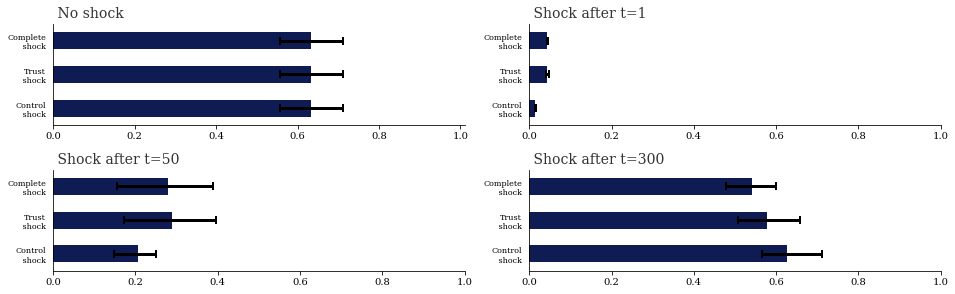

In [95]:
indices = ["Control\n shock", "Trust\n shock", "Complete\n shock"]
width = 0.05
index = np.arange(len(indices))
index = np.arange(0, 1.5, 0.5)
index = np.array([0.2, 0.3, 0.4])

fig_width = 2 * 6.688 
fig_height = fig_width / (1.618*2)
fig, axes = plt.subplots(2,2, figsize=(fig_width, fig_height))

axes[0, 0].set_title(' No shock', fontsize=14, alpha=0.8, ha='left', loc='left')
axes[0, 1].set_title(' Shock after t=1', fontsize=14, alpha=0.8, ha='left', loc='left')
axes[1, 0].set_title(' Shock after t=50', fontsize=14, alpha=0.8, ha='left', loc='left')
axes[1, 1].set_title(' Shock after t=300', fontsize=14, alpha=0.8, ha='left', loc='left')


axes[0, 0].barh(index-0.00*width, shock_no_efficiency_final_mean, width, 
       alpha=1.0, color=col_used,
       xerr=[shock_no_efficiency_final_lower, shock_no_efficiency_final_upper], capsize=4)

axes[0, 1].barh(index-0.00*width, shock_1_efficiency_final_mean, width, 
       alpha=1.0, color=col_used,
       xerr=[shock_1_efficiency_final_lower, shock_1_efficiency_final_upper], capsize=4)

axes[1, 0].barh(index-0.00*width, shock_50_efficiency_final_mean, width, 
       alpha=1.0, color=col_used,
       xerr=[shock_50_efficiency_final_lower, shock_50_efficiency_final_upper], capsize=4)

axes[1, 1].barh(index-0.00*width, shock_300_efficiency_final_mean, width, 
       alpha=1.0, color=col_used,
       xerr=[shock_300_efficiency_final_lower, shock_300_efficiency_final_upper], capsize=4)

for i in range(2):
    for j in range(2):
        axes[i, j].set_ylim(0.15, 0.45)
        axes[i, j].set_xlim(0.0, 1.0)
        axes[i, j].set_yticks(np.array([0.2, 0.3, 0.4]))
        axes[i, j].set_yticklabels(indices, fontsize=8)#, rotation=330)
        axes[i, j].yaxis.set_ticks_position('none') 

axes[0, 0].set_xlim(-0.00, 1.01)
axes[0, 0].get_xaxis().tick_bottom()  

plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.grid(False)

path = figure_directory_color + "fig_A5_shocks-final-efficiency.pdf"
plt.savefig(path)

## Figure A6: Initial conditions

### Prepare the data

In [96]:
inits_data = pd.read_feather("output/hawala_framework_initial_conditions/hawala_framework_initial_conditions_agg.feather")
max_t = max(inits_data["t"])
inits_data = inits_data[inits_data["t"]==max_t]
inits_data[inits_data["init_share_C"]==0.6]

,t,n_hawalas,n_places,int_pp,int_ph,p_gossip_rej,p_cheat_rej,lag_gossip,selec_perc,ranking_methods,init_share_C,selection_method,payoff_a,payoff_b,payoff_c,payoff_d,tshock,cshock,tshock_value,cshock_value,shock,trust_control,c_trust,d_trust,c_control_1,c_control_2,d_control_1,d_control_2,pop_growth,pop_growth_kind,pop_growth_type,mistake_prob,n_c_mean,n_c_sd,n_c_low,n_c_high,n_c_mid,n_d_mean,n_d_sd,n_d_low,n_d_high,n_d_mid,sh_d_mean,sh_d_sd,sh_d_low,sh_d_high,sh_d_mid,sh_c_mean,sh_c_sd,sh_c_low,sh_c_high,sh_c_mid,sh_c_top_mean,sh_c_top_sd,sh_c_top_low,sh_c_top_high,sh_c_top_mid,sh_c_low_mean,sh_c_low_sd,sh_c_low_low,sh_c_low_high,sh_c_low_mid,sh_d_top_mean,sh_d_top_sd,sh_d_top_low,sh_d_top_high,sh_d_top_mid,sh_d_low_mean,sh_d_low_sd,sh_d_low_low,sh_d_low_high,sh_d_low_mid,tr_fail_mean,tr_fail_sd,tr_fail_low,...,tr_fail_sh_mean,tr_fail_sh_sd,tr_fail_sh_low,tr_fail_sh_high,tr_fail_sh_mid,tr_rejct_mean,tr_rejct_sd,tr_rejct_low,tr_rejct_high,tr_rejct_mid,tr_rlzd_mean,tr_rlzd_sd,tr_rlzd_low,tr_rlzd_high,tr_rlzd_mid,tr_rlzd_sh_mean,tr_rlzd_sh_sd,tr_rlzd_sh_low,tr_rlzd_sh_high,tr_rlzd_sh_mid,tr_coops_mean,tr_coops_sd,tr_coops_low,tr_coops_high,tr_coops_mid,tr_explts_mean,tr_explts_sd,tr_explts_low,tr_explts_high,tr_explts_mid,tr_defcts_mean,tr_defcts_sd,tr_defcts_low,tr_defcts_high,tr_defcts_mid,int_strgr_mean,int_strgr_sd,int_strgr_low,int_strgr_high,int_strgr_mid,int_prtnr_mean,int_prtnr_sd,int_prtnr_low,int_prtnr_high,int_prtnr_mid,int_coprts_mean,int_coprts_sd,int_coprts_low,int_coprts_high,int_coprts_mid,int_dfctrs_mean,int_dfctrs_sd,int_dfctrs_low,int_dfctrs_high,int_dfctrs_mid,pp_int_c_mean,pp_int_c_sd,pp_int_c_low,pp_int_c_high,pp_int_c_mid,pp_int_d_mean,pp_int_d_sd,pp_int_d_low,pp_int_d_high,pp_int_d_mid,eff_temp_mean,eff_temp_sd,eff_temp_low,eff_temp_high,eff_temp_mid,eff_ovrl_mean,eff_ovrl_sd,eff_ovrl_low,eff_ovrl_high,eff_ovrl_mid
6007,750,100,25,100,10,1.0,1.0,-10,0.15,last_wealth_sum,0.6,replication_top_ten,4.0,8.0,0.0,-2.0,no,no,0.0,0.0,No shock,"Initial trust: 1.0, initial control: 1.0",1.0,1.0,1.0,1.0,1.0,1.0,0.0,NA,NA,0.0,90.0,31.622777,100.0,100.0,100.0,10.0,31.622777,0.0,0.0,0.0,0.1,0.316228,0.0,0.0,0.0,0.9,0.316228,1.0,1.0,1.0,0.9,0.316228,1.0,1.0,1.0,0.9,0.316228,1.0,1.0,1.0,0.1,0.316228,0.0,0.0,0.0,0.1,0.316228,0.0,0.0,0.0,14.8,29.854462,1.35,...,0.148,0.298545,0.0135,0.1125,0.07,58.7,122.975201,5.4,43.05,23.5,85.2,29.854462,88.75,98.65,93.0,0.852,0.298545,0.8875,0.9865,0.93,0.9,0.316228,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.1,0.316228,0.0,0.0,0.0,0.1,0.316228,0.0,0.0,0.0,0.9,0.316228,1.0,1.0,1.0,170.2,60.335727,177.5,197.3,186.0,0.2,0.632456,0.0,0.0,0.0,1.702,0.603357,1.775,1.973,1.86,0.002,0.006325,0.0,0.0,0.0,0.851,0.301679,0.8875,0.9865,0.93,0.563119,0.204333,0.544847,0.676773,0.61913


In [97]:
init_shares = np.asarray(inits_data["init_share_C"].unique())
init_shares.sort()
init_shares

array([0.25, 0.4 , 0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.85])

In [98]:
init_realized_means = [float(inits_data[inits_data["init_share_C"]==n]["tr_rlzd_sh_mid"]) for n in init_shares]
init_realized_low = [float(inits_data[inits_data["init_share_C"]==n]["tr_rlzd_sh_low"]) for n in init_shares]
init_realized_high = [float(inits_data[inits_data["init_share_C"]==n]["tr_rlzd_sh_high"]) for n in init_shares]
init_realized_lower = [init_realized_means[i]-init_realized_low[i] for i in range(len(init_realized_means))]
init_realized_upper = [init_realized_high[i]-init_realized_means[i] for i in range(len(init_realized_means))]


In [99]:
init_cooperators_means = [float(inits_data[inits_data["init_share_C"]==n]["sh_c_mid"]) for n in init_shares]
init_cooperators_low = [float(inits_data[inits_data["init_share_C"]==n]["sh_c_low"]) for n in init_shares]
init_cooperators_high = [float(inits_data[inits_data["init_share_C"]==n]["sh_c_high"]) for n in init_shares]
init_cooperators_lower = [init_cooperators_means[i]-init_cooperators_low[i] for i in range(len(init_cooperators_means))]
init_cooperators_upper = [init_cooperators_high[i]-init_cooperators_means[i] for i in range(len(init_cooperators_means))]


### Make the figure

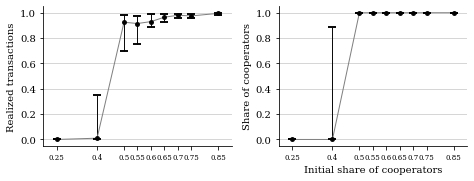

In [100]:
fig_width = 6.688 
fig_height = 2.5
fig, axes = plt.subplots(1,2, figsize=(fig_width, fig_height))

for i in range(2):
    axes[i].grid(True, alpha=0.25)
    axes[i].get_yaxis().tick_left() 
    axes[i].get_xaxis().tick_bottom() 
    axes[i].set_xlim(0.2, 0.9)
    axes[i].set_xticks(init_shares)
    axes[i].set_xticklabels(init_shares, fontsize=7, rotation=0)
    axes[i].xaxis.grid(False)
    axes[i].yaxis.grid(True, alpha=0.2)
    axes[1].set_xlabel('Initial share of cooperators', fontsize=10)

axes[0].set_ylabel("Realized transactions", fontsize=10)
axes[1].set_ylabel("Share of cooperators", fontsize=10)


axes[0].plot(init_shares, init_realized_means, color="grey", linewidth=1)

axes[0].errorbar(init_shares, init_realized_means,
            yerr=[init_realized_lower, init_realized_upper], 
            marker="o", color="black", alpha=0.95, markersize=3, 
            linewidth=1, linestyle="None", label="Efficiency", capsize=4)

axes[1].plot(init_shares, init_cooperators_means, color="grey", linewidth=1)

axes[1].errorbar(init_shares, init_cooperators_means,
            yerr=[init_cooperators_lower, init_cooperators_upper], 
            marker="o", color="black", alpha=0.95, markersize=3, 
            linewidth=1, linestyle="None", label="Efficiency", capsize=4)

plt.tight_layout()
plt.subplots_adjust(hspace = 0.0)
plt.subplots_adjust(top=0.99)
path = figure_directory + "fig_A6_initial-conditions.pdf"
plt.savefig(path)

### Color version

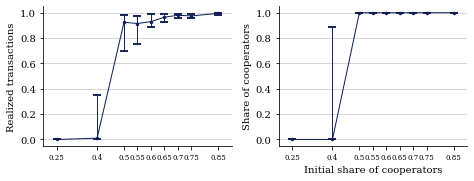

In [101]:
fig_width = 6.688 
fig_height = 2.5
fig, axes = plt.subplots(1,2, figsize=(fig_width, fig_height))

for i in range(2):
    axes[i].grid(True, alpha=0.25)
    axes[i].get_yaxis().tick_left() 
    axes[i].get_xaxis().tick_bottom() 
    axes[i].set_xlim(0.2, 0.9)
    axes[i].set_xticks(init_shares)
    axes[i].set_xticklabels(init_shares, fontsize=7, rotation=0)
    axes[i].xaxis.grid(False)
    axes[i].yaxis.grid(True, alpha=0.2)
    axes[1].set_xlabel('Initial share of cooperators', fontsize=10)

axes[0].set_ylabel("Realized transactions", fontsize=10)
axes[1].set_ylabel("Share of cooperators", fontsize=10)


axes[0].plot(init_shares, init_realized_means, color=col_used, linewidth=1)

axes[0].errorbar(init_shares, init_realized_means,
            yerr=[init_realized_lower, init_realized_upper], 
            marker=".", color=col_used, alpha=0.95, markersize=3, 
            linewidth=1, linestyle="None", label="Efficiency", capsize=4)

axes[1].plot(init_shares, init_cooperators_means, color=col_used, linewidth=1)

axes[1].errorbar(init_shares, init_cooperators_means,
            yerr=[init_cooperators_lower, init_cooperators_upper], 
            marker=".", color=col_used, alpha=0.95, markersize=3, 
            linewidth=1, linestyle="None", label="Efficiency", capsize=4)

plt.tight_layout()
plt.subplots_adjust(hspace = 0.0)
plt.subplots_adjust(top=0.99)
path = figure_directory_color + "fig_A6_initial-conditions.pdf"
plt.savefig(path)

## Figure A7: Fierceness of the dilemma

In [102]:
error_vals = [0.0, 0.01, 0.025, 0.05, 0.075, 0.10, 0.125, 0.15, 0.175, 0.20]
error_vals_ax = [str(x) for x in error_vals]
error_vals_ax = [x[1:] for x in error_vals_ax]

### Prepare the data

In [103]:
severity_data = pd.read_feather("output/hawala_framework_severity/hawala_framework_severity_agg.feather")
max_t = max(severity_data["t"])
severity_data = severity_data[severity_data["t"]==max_t]
severity_data.head()

,t,n_hawalas,n_places,int_pp,int_ph,p_gossip_rej,p_cheat_rej,lag_gossip,selec_perc,ranking_methods,init_share_C,selection_method,payoff_a,payoff_b,payoff_c,payoff_d,tshock,cshock,tshock_value,cshock_value,shock,trust_control,c_trust,d_trust,c_control_1,c_control_2,d_control_1,d_control_2,pop_growth,pop_growth_kind,pop_growth_type,mistake_prob,n_c_mean,n_c_sd,n_c_low,n_c_high,n_c_mid,n_d_mean,n_d_sd,n_d_low,n_d_high,n_d_mid,sh_d_mean,sh_d_sd,sh_d_low,sh_d_high,sh_d_mid,sh_c_mean,sh_c_sd,sh_c_low,sh_c_high,sh_c_mid,sh_c_top_mean,sh_c_top_sd,sh_c_top_low,sh_c_top_high,sh_c_top_mid,sh_c_low_mean,sh_c_low_sd,sh_c_low_low,sh_c_low_high,sh_c_low_mid,sh_d_top_mean,sh_d_top_sd,sh_d_top_low,sh_d_top_high,sh_d_top_mid,sh_d_low_mean,sh_d_low_sd,sh_d_low_low,sh_d_low_high,sh_d_low_mid,tr_fail_mean,tr_fail_sd,tr_fail_low,...,tr_fail_sh_mean,tr_fail_sh_sd,tr_fail_sh_low,tr_fail_sh_high,tr_fail_sh_mid,tr_rejct_mean,tr_rejct_sd,tr_rejct_low,tr_rejct_high,tr_rejct_mid,tr_rlzd_mean,tr_rlzd_sd,tr_rlzd_low,tr_rlzd_high,tr_rlzd_mid,tr_rlzd_sh_mean,tr_rlzd_sh_sd,tr_rlzd_sh_low,tr_rlzd_sh_high,tr_rlzd_sh_mid,tr_coops_mean,tr_coops_sd,tr_coops_low,tr_coops_high,tr_coops_mid,tr_explts_mean,tr_explts_sd,tr_explts_low,tr_explts_high,tr_explts_mid,tr_defcts_mean,tr_defcts_sd,tr_defcts_low,tr_defcts_high,tr_defcts_mid,int_strgr_mean,int_strgr_sd,int_strgr_low,int_strgr_high,int_strgr_mid,int_prtnr_mean,int_prtnr_sd,int_prtnr_low,int_prtnr_high,int_prtnr_mid,int_coprts_mean,int_coprts_sd,int_coprts_low,int_coprts_high,int_coprts_mid,int_dfctrs_mean,int_dfctrs_sd,int_dfctrs_low,int_dfctrs_high,int_dfctrs_mid,pp_int_c_mean,pp_int_c_sd,pp_int_c_low,pp_int_c_high,pp_int_c_mid,pp_int_d_mean,pp_int_d_sd,pp_int_d_low,pp_int_d_high,pp_int_d_mid,eff_temp_mean,eff_temp_sd,eff_temp_low,eff_temp_high,eff_temp_mid,eff_ovrl_mean,eff_ovrl_sd,eff_ovrl_low,eff_ovrl_high,eff_ovrl_mid
750,750,100,25,100,10,1.0,1.0,-10,0.15,last_wealth_sum,0.75,replication_top_ten,9.0,18.0,0.0,-2.0,no,no,0.0,0.0,No shock,"Initial trust: 1.0, initial control: 1.0",1.0,1.0,1.0,1.0,1.0,1.0,0.0,NA,NA,0.0,100.0,0.0,100.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9,0.316228,1.00,...,0.009,0.003162,0.0100,0.0100,0.01,2.7,1.702939,1.00,4.00,4.0,99.1,0.316228,99.00,99.00,99.0,0.991,0.003162,0.9900,0.9900,0.99,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,198.2,0.632456,198.0,198.0,198.0,0.0,0.000000,0.0,0.0,0.0,1.982,0.006325,1.980,1.980,1.98,0.000,0.000000,0.0,0.00,0.00,0.991,0.003162,0.9900,0.9900,0.99,0.810582,0.025302,0.781075,0.834896,0.815319
1501,750,100,25,100,10,1.0,1.0,-10,0.15,last_wealth_sum,0.75,replication_top_ten,1.0,2.0,0.0,-2.0,no,no,0.0,0.0,No shock,"Initial trust: 1.0, initial control: 1.0",1.0,1.0,1.0,1.0,1.0,1.0,0.0,NA,NA,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,100.0,100.0,100.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,98.8,1.032796,98.00,...,0.988,0.010328,0.9800,1.0000,0.99,403.9,5.152130,399.40,409.55,403.0,1.2,1.032796,0.00,2.00,1.0,0.012,0.010328,0.0000,0.0200,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7,0.483046,0.0,1.0,1.0,0.7,0.483046,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,2.4,2.065591,0.0,4.0,2.0,0.000,0.000000,0.000,0.000,0.00,0.024,0.020656,0.0,0.04,0.02,0.000,0.000000,0.0000,0.0000,0.00,0.002931,0.000389,0.002613,0.003240,0.002907
2252,750,100,25,100,10,1.0,1.0,-10,0.15,last_wealth_sum,0.75,replication_top_ten,8.0,16.0,0.0,-2.0,no,no,0.0,0.0,No shock,"Initial trust: 1.0, initial control: 1.0",1.0,1.0,1.0,1.0,1.0,1.0,0.0,NA,NA,0.0,100.0,0.0,100.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.3,1.159502,0.35,...,0.013,0.011595,0.0035,0.0200,0.01,4.5,5.622376,0.35,8.00,2.5,98.7,1.159502,98.00,99.65,99

In [104]:
severity_values = np.asarray(severity_data["payoff_a"].unique())
severity_values.sort()
severity_values

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [105]:
severity_efficiency_means = [float(severity_data[severity_data["payoff_a"]==n]["eff_ovrl_mean"]) for n in severity_values]
severity_efficiency_low = [float(severity_data[severity_data["payoff_a"]==n]["eff_ovrl_low"]) for n in severity_values]
severity_efficiency_high = [float(severity_data[severity_data["payoff_a"]==n]["eff_ovrl_high"]) for n in severity_values]
severity_efficiency_lower = [severity_efficiency_means[i]-severity_efficiency_low[i] for i in range(len(severity_efficiency_means))]
severity_efficiency_upper = [severity_efficiency_high[i]-severity_efficiency_means[i] for i in range(len(severity_efficiency_means))]


### Make the figure

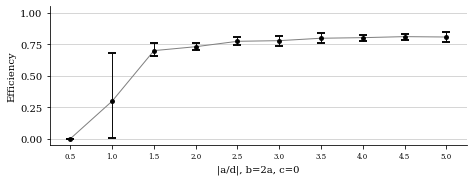

In [106]:
fig_width = 6.688 
fig_height = 2.5
fig, ax = plt.subplots(figsize=(fig_width, fig_height))

ax.grid(True, alpha=0.25)
ax.set_yticks(np.arange(0, 1.1, 0.25))
ax.set_ylim(-0.05, 1.05)
ax.get_yaxis().tick_left() 
ax.get_xaxis().tick_bottom() 
ax.set_xlim(0.5, 10.5)
ax.set_xticks(severity_values)
ax.set_xticklabels([v/2 for v in severity_values], fontsize=7, rotation=0)

ax.set_ylabel("Efficiency", fontsize=10)
ax.set_xlabel('|a/d|, b=2a, c=0', fontsize=10)

ax.plot(severity_values, severity_efficiency_means, color="grey", linewidth=1)

ax.errorbar(severity_values, severity_efficiency_means,
            yerr=[severity_efficiency_lower, severity_efficiency_upper], 
            marker="o", color="black", alpha=0.95, markersize=3, 
            linewidth=1, linestyle="None", label="Efficiency", capsize=4)

ax.xaxis.grid(False)
ax.yaxis.grid(True, alpha=0.2)

plt.tight_layout()
plt.subplots_adjust(hspace = 0.0)
plt.subplots_adjust(top=0.99)
path = figure_directory + "fig_A7_fierceness.pdf"
plt.savefig(path)

### Color version

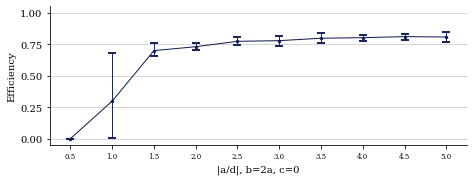

In [107]:
fig_width = 6.688 
fig_height = 2.5
fig, ax = plt.subplots(figsize=(fig_width, fig_height))

ax.grid(True, alpha=0.25)
ax.set_yticks(np.arange(0, 1.1, 0.25))
ax.set_ylim(-0.05, 1.05)
ax.get_yaxis().tick_left() 
ax.get_xaxis().tick_bottom() 
ax.set_xlim(0.5, 10.5)
ax.set_xticks(severity_values)
ax.set_xticklabels([v/2 for v in severity_values], fontsize=7, rotation=0)

ax.set_ylabel("Efficiency", fontsize=10)
ax.set_xlabel('|a/d|, b=2a, c=0', fontsize=10)

ax.plot(severity_values, severity_efficiency_means, color=col_used, linewidth=1)

ax.errorbar(severity_values, severity_efficiency_means,
            yerr=[severity_efficiency_lower, severity_efficiency_upper], 
            marker=".", color=col_used, alpha=0.95, markersize=3, 
            linewidth=1, linestyle="None", label="Efficiency", capsize=4)

ax.xaxis.grid(False)
ax.yaxis.grid(True, alpha=0.2)

plt.tight_layout()
plt.subplots_adjust(hspace = 0.0)
plt.subplots_adjust(top=0.99)
path = figure_directory_color + "fig_A7_fierceness.pdf"
plt.savefig(path)